In [24]:
import os
import pandas as pd

# Load the CSV containing info with labels
info_with_labels = pd.read_csv('info_with_labels.csv')

# Define the root folder where the dataset is stored
dataset_root = 'Dataset'
# List to store data from all activities
all_data = []

# Iterate over each row in the info_with_labels file
for index, row in info_with_labels.iterrows():
    person = row['Person']
    activity = row['Activity']
    imu_side = row['IMU_Side']
    start_time = row['Start_Time']
    end_time = row['End_Time']
    label = row['Activity_Label']
    
    # Construct the path to the IMU file for the corresponding person, activity, and side
    imu_folder = os.path.join(dataset_root, person, 'EARBUDS')
    imu_filename = f"{person[1:]}-{activity}-imu-{imu_side}.csv"
    imu_file_path = os.path.join(imu_folder, imu_filename)
    
    # Check if the IMU file exists
    if os.path.exists(imu_file_path):
        # Load the IMU data for the current person/activity/side
        imu_data = pd.read_csv(imu_file_path)

        # Filter the IMU data to keep only the acceleration data within the given start and end time
        imu_data_filtered = imu_data[(imu_data['timestamp'] >= start_time) & (imu_data['timestamp'] <= end_time)]
        
        # Add columns for Person, Activity, IMU Side, and Activity Label to the filtered data
        imu_data_filtered['Person'] = person
        imu_data_filtered['Activity'] = activity
        imu_data_filtered['IMU_Side'] = imu_side
        imu_data_filtered['Start_Time'] = start_time
        imu_data_filtered['End_Time'] = end_time
        imu_data_filtered['Activity_Label'] = label

        # Append the filtered data to the list
        all_data.append(imu_data_filtered)
        
        print(f"Processed: {person} - {activity} ({imu_side})")
    else:
        print(f"IMU file not found: {imu_file_path}")

# Combine all the data into a single DataFrame
final_data = pd.concat(all_data, ignore_index=True)

# Save the final DataFrame to a CSV file
output_filepath = 'infowithlabels_with_acc.csv'
final_data.to_csv(output_filepath, index=False)

print(f"All data saved to: {output_filepath}")


Processed: P0 - brow-lowerer (left)
Processed: P0 - brow-lowerer (right)
Processed: P0 - brow-raiser (left)
Processed: P0 - brow-raiser (right)
Processed: P0 - chewing (left)
Processed: P0 - chewing (right)
Processed: P0 - chin-raiser (left)
Processed: P0 - chin-raiser (right)
Processed: P0 - eyes-lr (left)
Processed: P0 - eyes-lr (right)
Processed: P0 - eyes-ud (left)
Processed: P0 - eyes-ud (right)
Processed: P0 - lip-puller (left)
Processed: P0 - lip-puller (right)
Processed: P0 - mouth-stretch (left)
Processed: P0 - mouth-stretch (right)
Processed: P0 - nod (left)
Processed: P0 - nod (right)
Processed: P0 - running (left)
Processed: P0 - running (right)
Processed: P0 - shake (left)
Processed: P0 - shake (right)
Processed: P0 - speaking (left)
Processed: P0 - speaking (right)
Processed: P0 - still (left)
Processed: P0 - still (right)
Processed: P0 - swallowing (left)
Processed: P0 - swallowing (right)
Processed: P0 - tilt (left)
Processed: P0 - tilt (right)
Processed: P0 - walking (

KeyboardInterrupt: 

In [33]:
import pandas as pd

# Define the file path for the existing CSV file
output_filepath = r'C:\Users\Shruti\Desktop\complex_Activity_dc\infowithlabels_with_acc.csv'  # Adjust this path

# Load the existing CSV file into a DataFrame
final_data = pd.read_csv(output_filepath)

# Display the head of the DataFrame
print(final_data.head())



       timestamp    ax     ay    az   gx   gy  gz Person      Activity  \
0  1621356793162 -1412 -15888  2180  160  111 -31     P0  brow-lowerer   
1  1621356793171 -1398 -15886  2221  140   91 -12     P0  brow-lowerer   
2  1621356793181 -1399 -15934  2275  137   82  13     P0  brow-lowerer   
3  1621356793191 -1398 -15977  2310  144   66  36     P0  brow-lowerer   
4  1621356793200 -1382 -16008  2347  159   49  47     P0  brow-lowerer   

  IMU_Side     Start_Time       End_Time  Activity_Label  
0     left  1621356572218  1621356793459               1  
1     left  1621356572218  1621356793459               1  
2     left  1621356572218  1621356793459               1  
3     left  1621356572218  1621356793459               1  
4     left  1621356572218  1621356793459               1  


In [ ]:
print(final_data.tail())

              timestamp    ax     ay     az  gx   gy   gz Person Activity  \
13615272  1621453647684 -5186  10893 -11074 -70   54  -23     P9   wink-r   
13615273  1621453647694 -5189  10881 -11059 -47   73  -89     P9   wink-r   
13615274  1621453647703 -5222  10868 -11063 -45   95 -118     P9   wink-r   
13615275  1621453647713 -5228  10825 -11070 -58  123 -138     P9   wink-r   
13615276  1621453647722 -5239  10760 -11057 -65  139 -148     P9   wink-r   

         IMU_Side     Start_Time       End_Time  Activity_Label  
13615272    right  1621453527271  1621453705844              18  
13615273    right  1621453527271  1621453705844              18  
13615274    right  1621453527271  1621453705844              18  
13615275    right  1621453527271  1621453705844              18  
13615276    right  1621453527271  1621453705844              18  


In [34]:
print(final_data.shape)

(13615277, 13)


In [35]:
unique_persons = final_data['Person'].unique()
print("Unique Persons in the DataFrame:", unique_persons)

Unique Persons in the DataFrame: ['P0' 'P1' 'P10' 'P11' 'P12' 'P13' 'P14' 'P15' 'P16' 'P17' 'P18' 'P19'
 'P2' 'P20' 'P21' 'P22' 'P23' 'P24' 'P25' 'P26' 'P27' 'P28' 'P29' 'P3'
 'P4' 'P5' 'P6' 'P7' 'P8' 'P9']


In [37]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13615277 entries, 0 to 13615276
Data columns (total 13 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   timestamp       int64 
 1   ax              int64 
 2   ay              int64 
 3   az              int64 
 4   gx              int64 
 5   gy              int64 
 6   gz              int64 
 7   Person          object
 8   Activity        object
 9   IMU_Side        object
 10  Start_Time      int64 
 11  End_Time        int64 
 12  Activity_Label  int64 
dtypes: int64(10), object(3)
memory usage: 1.3+ GB


In [36]:
final_data.describe()

timestamp            ax            ay            az            gx  \
count  1.361528e+07  1.361528e+07  1.361528e+07  1.361528e+07  1.361528e+07   
mean   1.627782e+12 -3.988662e+03 -5.765332e+02 -5.623289e+02 -3.456954e+00   
std    7.122321e+09  4.058535e+03  1.248785e+04  9.384900e+03  7.815790e+02   
min    1.621355e+12 -3.273400e+04 -3.276400e+04 -3.276400e+04 -3.276200e+04   
25%    1.621445e+12 -6.555000e+03 -1.344900e+04 -8.381000e+03 -7.500000e+01   
50%    1.622620e+12 -4.536000e+03 -1.128000e+03 -1.505000e+03  4.000000e+00   
75%    1.635784e+12 -1.858000e+03  1.245700e+04  7.712000e+03  6.400000e+01   
max    1.637344e+12  3.276400e+04  3.276400e+04  3.276400e+04  3.276400e+04   

                 gy            gz    Start_Time      End_Time  Activity_Label  
count  1.361528e+07  1.361528e+07  1.361528e+07  1.361528e+07    1.361528e+07  
mean   2.478883e+01  1.519933e+01  1.627782e+12  1.627782e+12    9.533244e+00  
std    1.104521e+03  1.011221e+03  7.122321e+09  7.122319e+09    5.189808e+00  
min   -3.001000e+04 -3.099500e+04  1.621355e+12  1.621356e+12    1.000000e+00  
25%   -4.000000e+01 -2.900000e+01  1.621445e+12  1.621445e+12    5.000000e+00  
50%    2.200000e+01  1.600000e+01  1.622620e+12  1.622620e+12    1.000000e+01  
75%    9.700000e+01  6.100000e+01  1.635784e+12  1.635784e+12    1.400000e+01  
max    3.276400e+04  3.276400e+04  1.637344e+12  1.637344e+12    1.800000e+01

In [39]:
# Check for null values in the entire dataset
null_rows = final_data[final_data.isnull().any(axis=1)]

# Display null rows
print(f"Number of rows with null values: {len(null_rows)}")
print(null_rows)


Number of rows with null values: 0
Empty DataFrame
Columns: [timestamp, ax, ay, az, gx, gy, gz, Person, Activity, IMU_Side, Start_Time, End_Time, Activity_Label]
Index: []


In [ ]:
# final_data = final_data[final_data['Person'].isin(['P0', 'P1','P2','P3','P4','P5','P6','P7','P8','P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19','P20','P21','P22'])]
# print(final_data.shape)
# final_data = final_data[final_data['Person'].isin(['P0', 'P1', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19'])]
# print(final_data.shape)

(10024218, 13)


In [38]:
# Check the unique persons in the DataFrame
unique_persons = final_data['Person'].unique()
print("Unique Persons in the DataFrame:", unique_persons)

Unique Persons in the DataFrame: ['P0' 'P1' 'P10' 'P11' 'P12' 'P13' 'P14' 'P15' 'P16' 'P17' 'P18' 'P19'
 'P2' 'P20' 'P21' 'P22' 'P23' 'P24' 'P25' 'P26' 'P27' 'P28' 'P29' 'P3'
 'P4' 'P5' 'P6' 'P7' 'P8' 'P9']


In [40]:
final_data.dropna(inplace=True)

# Change the datatype of the 'z-axis' column to float
final_data['ax'] = final_data['ax'].astype(float)
final_data['ay'] = final_data['ay'].astype(float)
final_data['az'] = final_data['az'].astype(float)
final_data['gx'] = final_data['gx'].astype(float)
final_data['gy'] = final_data['gy'].astype(float)
final_data['gz'] = final_data['gz'].astype(float)

# Drop rows where the timestamp is 0
final_data = final_data[final_data['timestamp'] != 0]

In [41]:

final_data['Person_Num'] = final_data['Person'].str.extract('(\d+)').astype(int)
# Sort data in ascending order of the user and timestamp
final_data=final_data.sort_values(by=['Person_Num','timestamp'], ignore_index=True)



# Display the head of the modified DataFrame
print(final_data.head())

       timestamp    ax       ay      az     gx    gy   gz Person Activity  \
0  1621355241901  50.0 -15918.0  3820.0  100.0  23.0 -3.0     P0    still   
1  1621355241911  47.0 -15934.0  3835.0  106.0  10.0 -4.0     P0    still   
2  1621355241920  55.0 -15944.0  3843.0  110.0   0.0 -7.0     P0    still   
3  1621355241930  47.0 -15947.0  3840.0  113.0 -19.0 -8.0     P0    still   
4  1621355241940  43.0 -15943.0  3847.0  119.0 -42.0 -8.0     P0    still   

  IMU_Side     Start_Time       End_Time  Activity_Label  Person_Num  
0     left  1621355241901  1621356390062              13           0  
1     left  1621355241901  1621356390062              13           0  
2     left  1621355241901  1621356390062              13           0  
3     left  1621355241901  1621356390062              13           0  
4     left  1621355241901  1621356390062              13           0  


In [ ]:
print(final_data.tail())

              timestamp     ax       ay       az     gx      gy      gz  \
13615272  1637343926368 -820.0  16697.0 -12120.0 -828.0   201.0  1372.0   
13615273  1637343926378 -839.0  16035.0 -10958.0 -355.0   932.0  1081.0   
13615274  1637343926388 -833.0  15951.0 -10608.0  -83.0  1013.0   655.0   
13615275  1637343926397 -597.0  16189.0 -10796.0   -1.0   888.0   317.0   
13615276  1637343926407 -225.0  16391.0 -10993.0   35.0   939.0   120.0   

         Person Activity IMU_Side     Start_Time       End_Time  \
13615272    P29  running    right  1637343750567  1637343926407   
13615273    P29  running    right  1637343750567  1637343926407   
13615274    P29  running    right  1637343750567  1637343926407   
13615275    P29  running    right  1637343750567  1637343926407   
13615276    P29  running    right  1637343750567  1637343926407   

          Activity_Label  Person_Num  
13615272              10          29  
13615273              10          29  
13615274              10     

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

# Define window size and overlap
window_size = 32  # Increased window size
step_size = window_size // 4  # Reduced step size for more overlapping windows

def extract_features(window_data):
    """Extract additional statistical features from the window"""
    features = []
    for column in window_data:
        features.extend([
            np.mean(column),
            np.std(column),
            np.max(column),
            np.min(column),
            np.median(column),
            np.percentile(column, 25),
            np.percentile(column, 75)
        ])
    return np.array(features)

def window_and_extract_sequences(data, window_size, step_size):
    sequences = []
    features = []
    labels = []
    
    for person in data['Person_Num'].unique():
        person_data = data[data['Person_Num'] == person]
        
        for i in range(0, len(person_data) - window_size, step_size):
            window = person_data.iloc[i:i + window_size]
            
            # Only create window if it contains data from the same activity
            if len(window['Activity_Label'].unique()) == 1:
                sequence = window[['ax', 'ay', 'az', 'gx', 'gy', 'gz']].values
                
                # Extract additional features
                window_features = extract_features(sequence.T)
                
                sequences.append(sequence)
                features.append(window_features)
                labels.append(window['Activity_Label'].iloc[0])
    
    return np.array(sequences), np.array(features), np.array(labels)

# Split data ensuring each person's data is proportionally represented
train_persons = []
test_persons = []
for person in final_data['Person_Num'].unique():
    if np.random.random() < 0.8:  # 80% chance of being in training set
        train_persons.append(person)
    else:
        test_persons.append(person)

# Ensure at least one person in test set
if len(test_persons) == 0:
    test_persons.append(train_persons.pop())

df_train = final_data[final_data['Person_Num'].isin(train_persons)]
df_test = final_data[final_data['Person_Num'].isin(test_persons)]

# Apply windowing and feature extraction
X_train, X_train_features, y_train = window_and_extract_sequences(df_train, window_size, step_size)
X_test, X_test_features, y_test = window_and_extract_sequences(df_test, window_size, step_size)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Normalize sequence data
scaler_seq = StandardScaler()
num_features = X_train.shape[2]
X_train_reshaped = X_train.reshape(-1, num_features)
X_test_reshaped = X_test.reshape(-1, num_features)
X_train_scaled = scaler_seq.fit_transform(X_train_reshaped)
X_test_scaled = scaler_seq.transform(X_test_reshaped)
X_train_scaled = X_train_scaled.reshape(-1, window_size, num_features)
X_test_scaled = X_test_scaled.reshape(-1, window_size, num_features)

# Normalize statistical features
scaler_features = StandardScaler()
X_train_features_scaled = scaler_features.fit_transform(X_train_features)
X_test_features_scaled = scaler_features.transform(X_test_features)

# Build improved LSTM model
model = Sequential([
    # First Bidirectional LSTM layer
    Bidirectional(LSTM(128, return_sequences=True, activation='relu'), 
                 input_shape=(window_size, num_features)),
    BatchNormalization(),
    Dropout(0.3),
    
    # Second Bidirectional LSTM layer
    Bidirectional(LSTM(64, return_sequences=False, activation='relu')),
    BatchNormalization(),
    Dropout(0.3),
    
    # Dense layers for sequence features
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    # Layer for combining with statistical features
    Dense(64, activation='relu'),
    
    # Output layer
    Dense(y_train_onehot.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.0001
)

# Train model
history = model.fit(
    X_train_scaled, 
    y_train_onehot,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate model
y_pred_onehot = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_onehot, axis=1)

# Decode predicted and true labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test_onehot, axis=1))

# Print results
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels)}")
print("\n-----Classification Report-----")
print(classification_report(y_test_labels, y_pred_labels))

# Plot confusion matrix
plt.figure(figsize=(12, 8))
labels = label_encoder.classes_
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", 
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Shruti\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 302s 46ms/step - accuracy: 0.2191 - loss: 2.3650 - val_accuracy: 0.1070 - val_loss: 4.6328 - learning_rate: 0.0010
Epoch 2/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 356s 55ms/step - accuracy: 0.1935 - loss: 2.4277 - val_accuracy: 0.0720 - val_loss: 3.8745 - learning_rate: 0.0010
Epoch 3/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 506s 79ms/step - accuracy: 0.2901 - loss: 2.0513 - val_accuracy: 0.1055 - val_loss: 6.1247 - learning_rate: 0.0010
Epoch 4/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 6946s 1s/step - accuracy: 0.5165 - loss: 1.3614 - val_accuracy: 0.1394 - val_loss: 8.3242 - learning_rate: 0.0010
Epoch 5/50
6442/6442 ━━━━━━━━━━━━━━━━━━━━ 303s 47ms/step - accuracy: 0.5065 - loss: 1.4303 - val_accuracy: 0.0789 - val_loss: 6.0755 - learning_rate: 0.0010
Epoch 6/50
4896/6442 ━━━━━━━━━━━━━━━━━━━━ 1:14 48ms/step - accuracy: 0.5715 - loss: 1.2054

KeyboardInterrupt: 

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

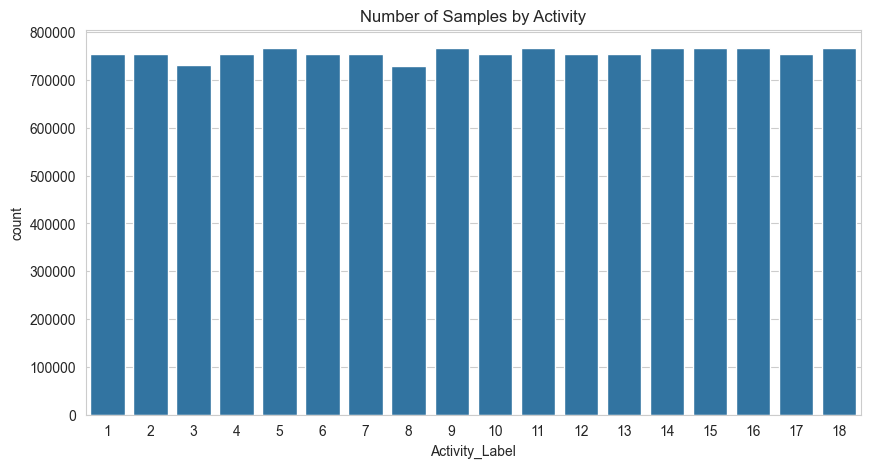

In [43]:
activity_column = 'Activity_Label'  # Change if your activity column is named differently

# Set the style for seaborn
sns.set_style("whitegrid")

# Create a figure for the countplot
plt.figure(figsize=(10, 5))

# Create the count plot
sns.countplot(x=activity_column, data=final_data)

# Set the title
plt.title('Number of Samples by Activity')

# Show the plot
plt.show()

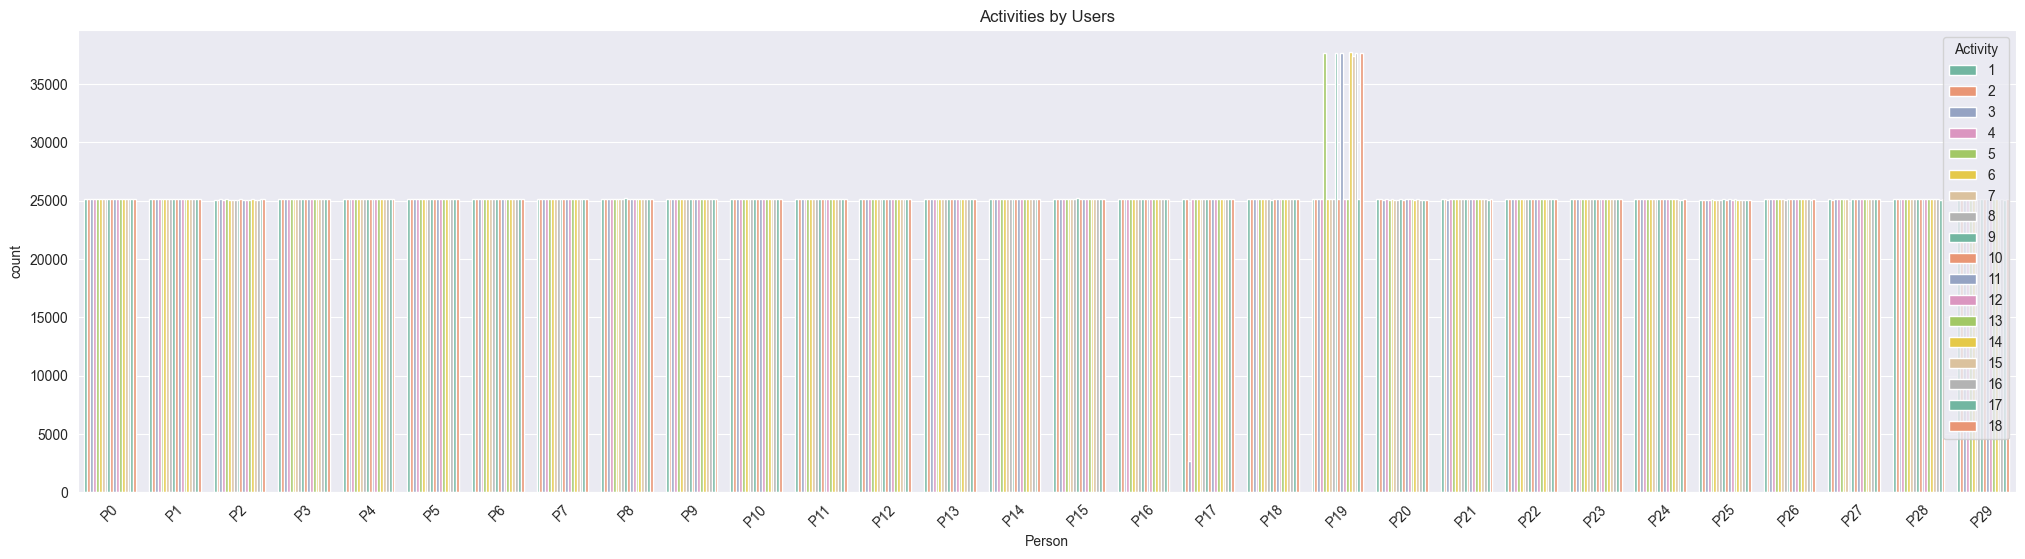

In [44]:
user_column = 'Person'  # Change if your user column is named differently
activity_column = 'Activity_Label'  # Change if your activity column is named differently

# Set the style for seaborn
sns.set_style("darkgrid")

# Create a figure for the countplot
plt.figure(figsize=(25, 6))

# Create the count plot
sns.countplot(x=user_column, hue=activity_column, data=final_data, palette='Set2')

# Set the title
plt.title('Activities by Users')

# Show the plot
plt.legend(title='Activity')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

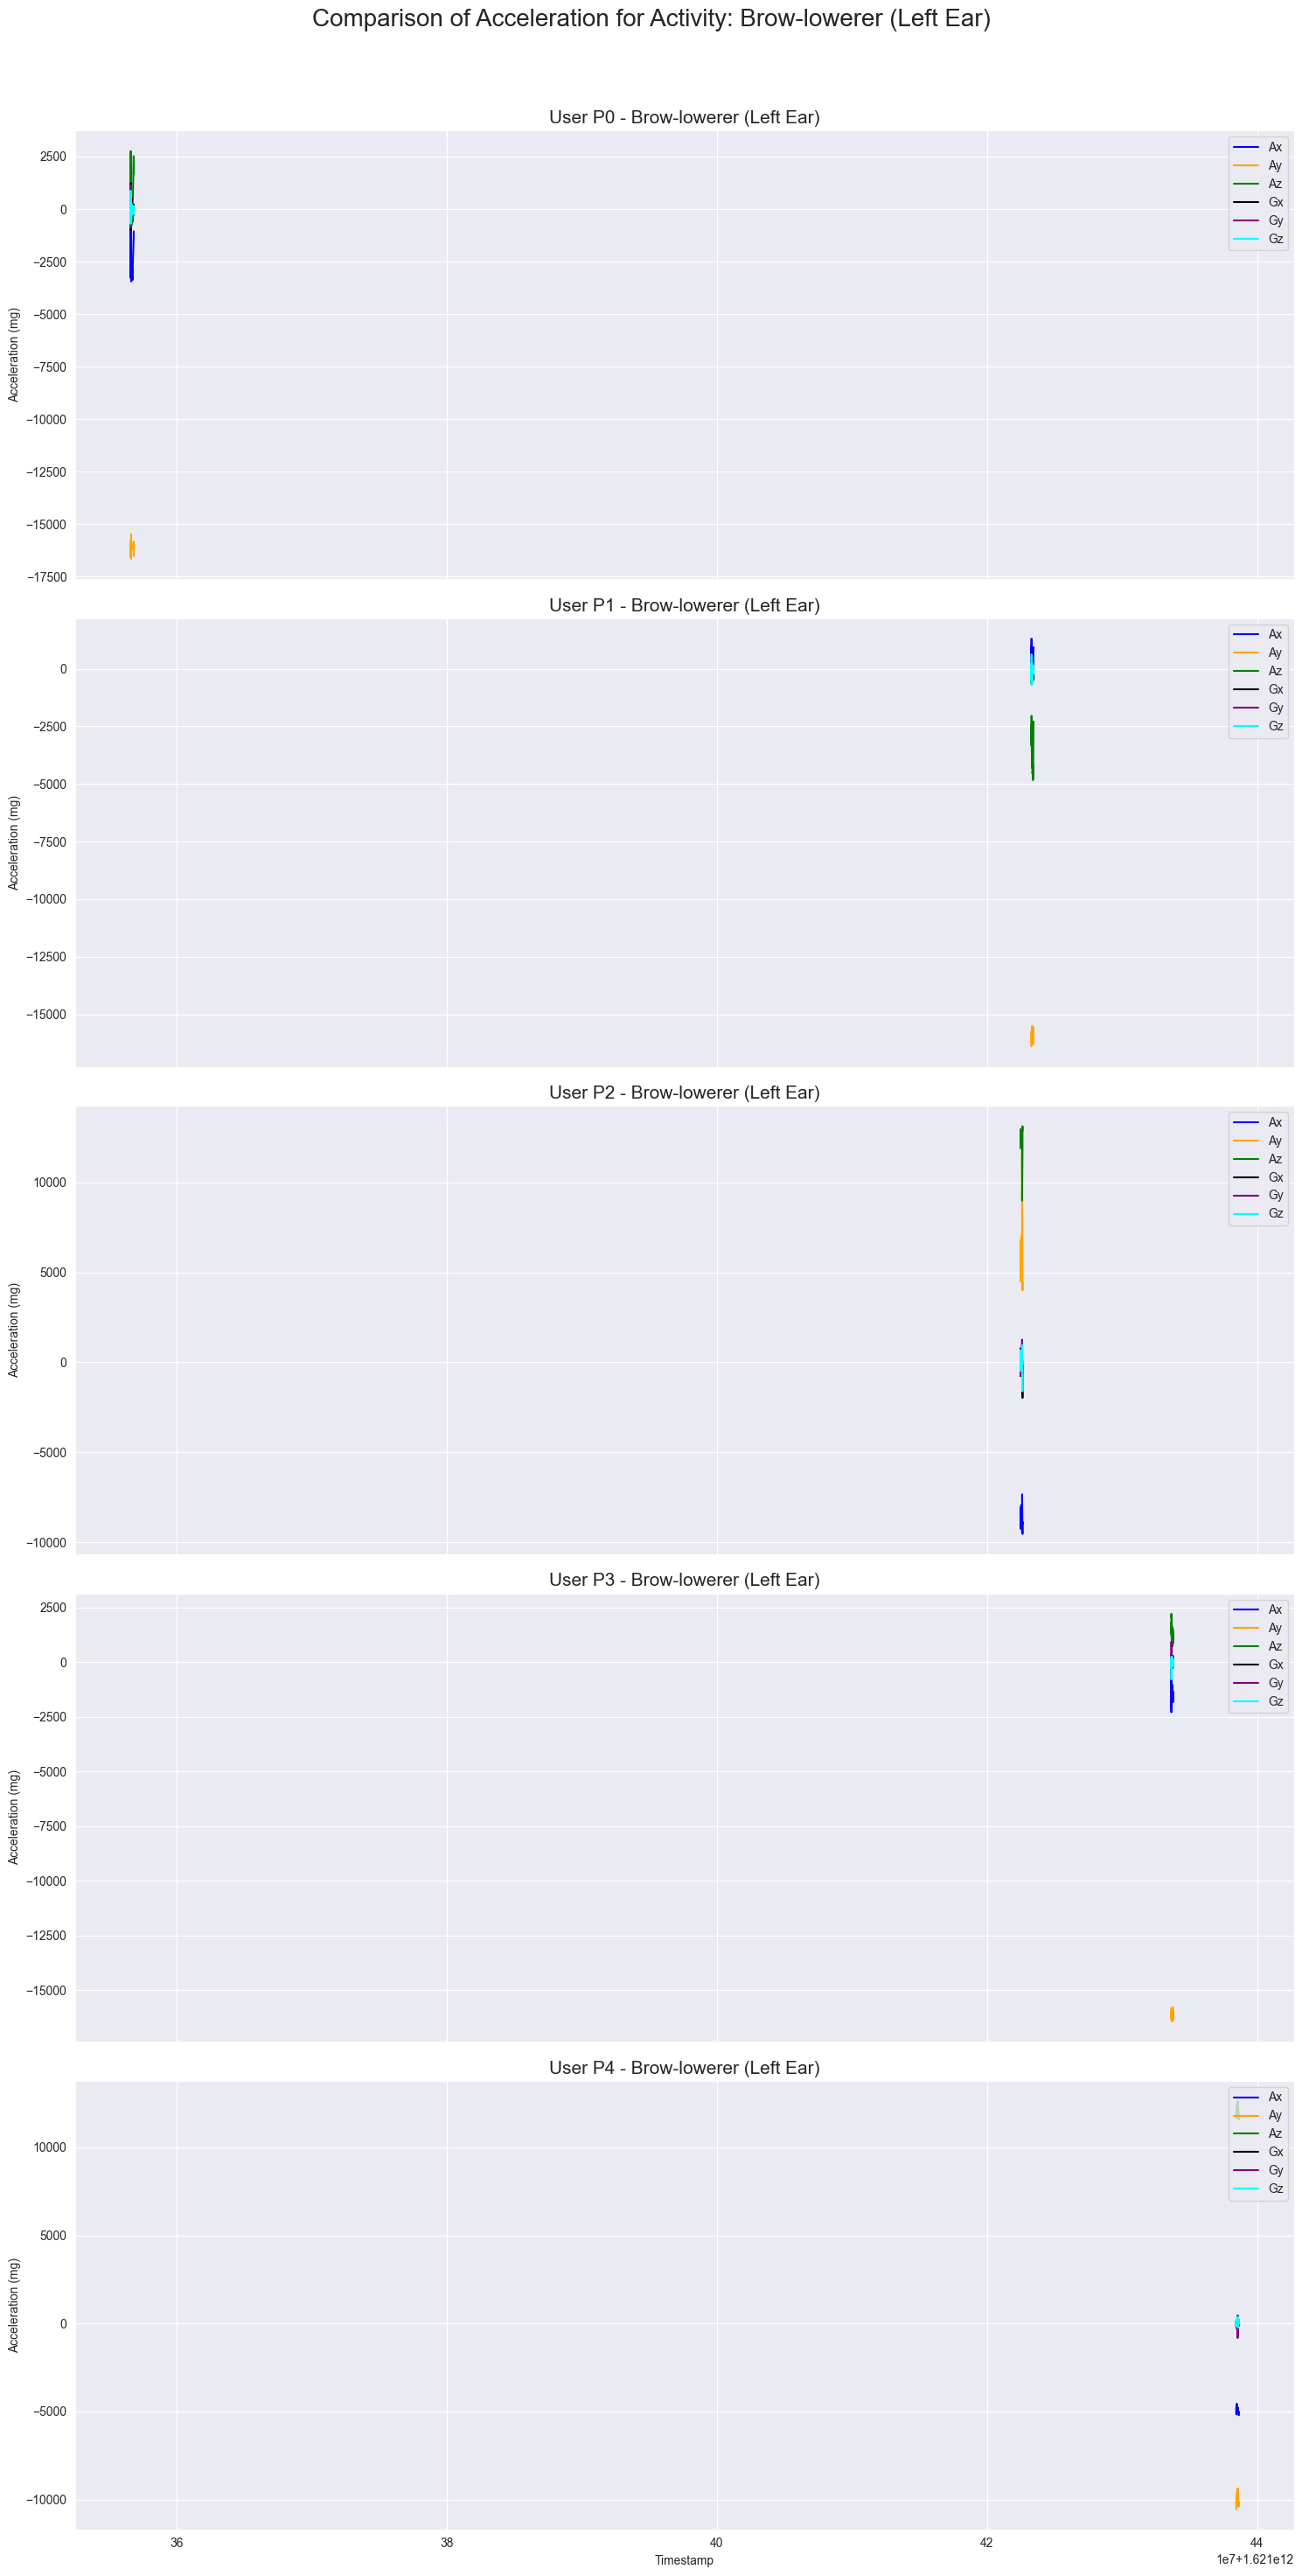

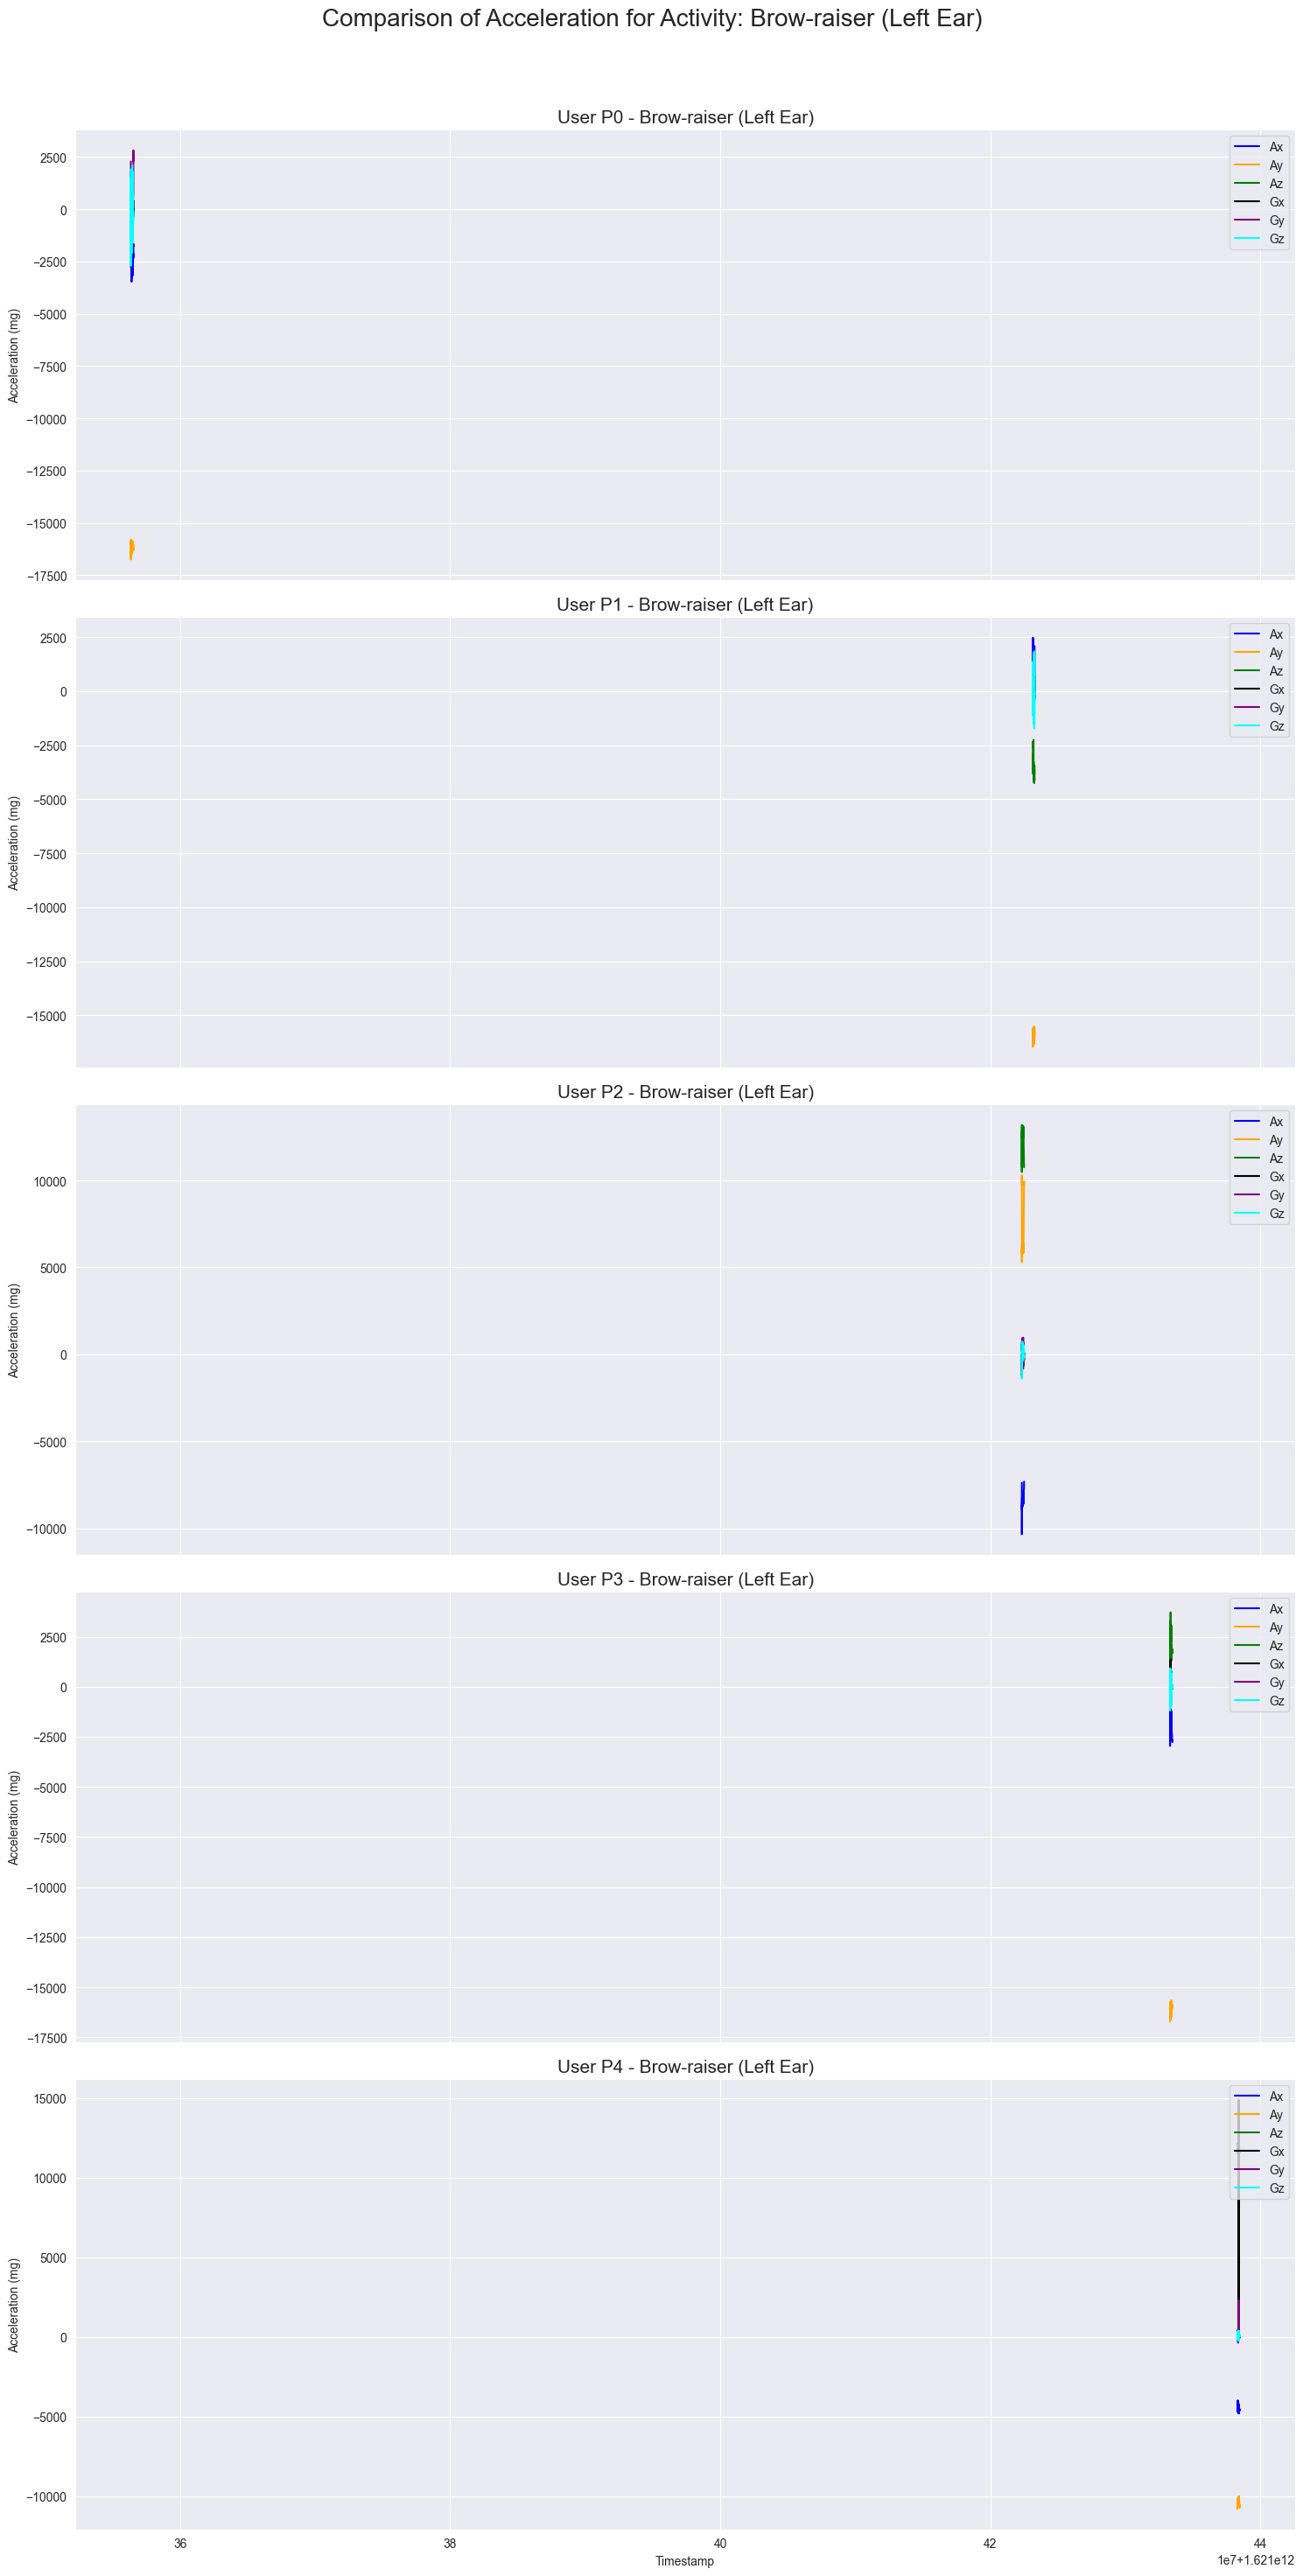

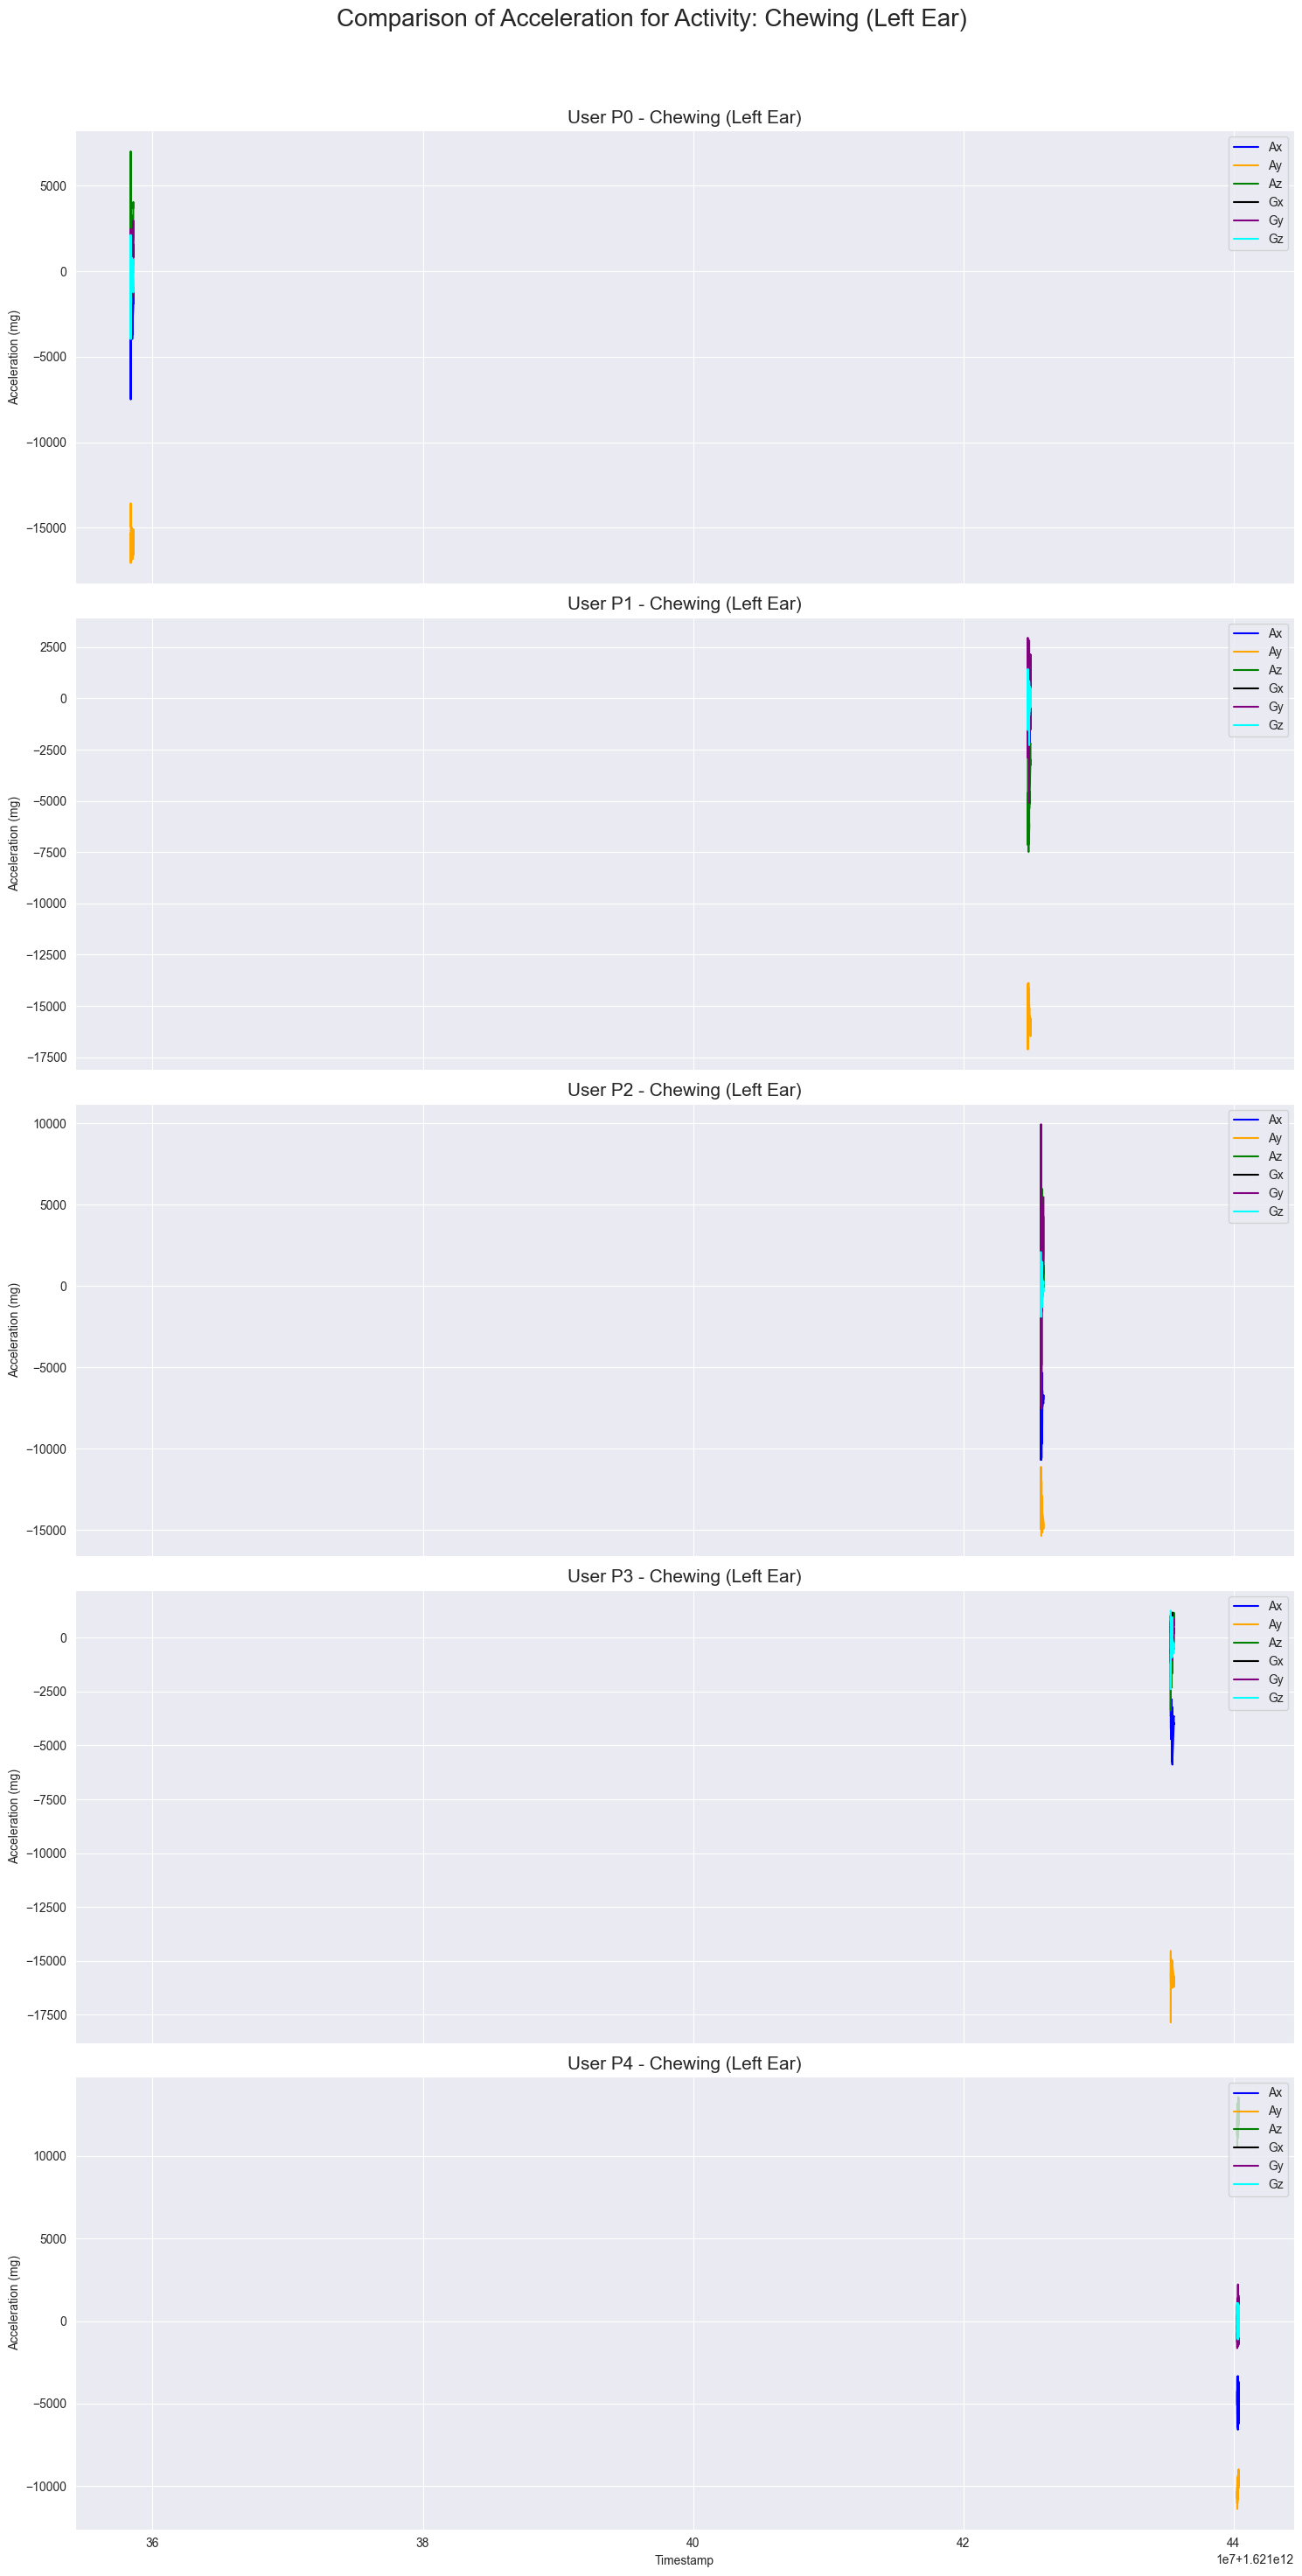

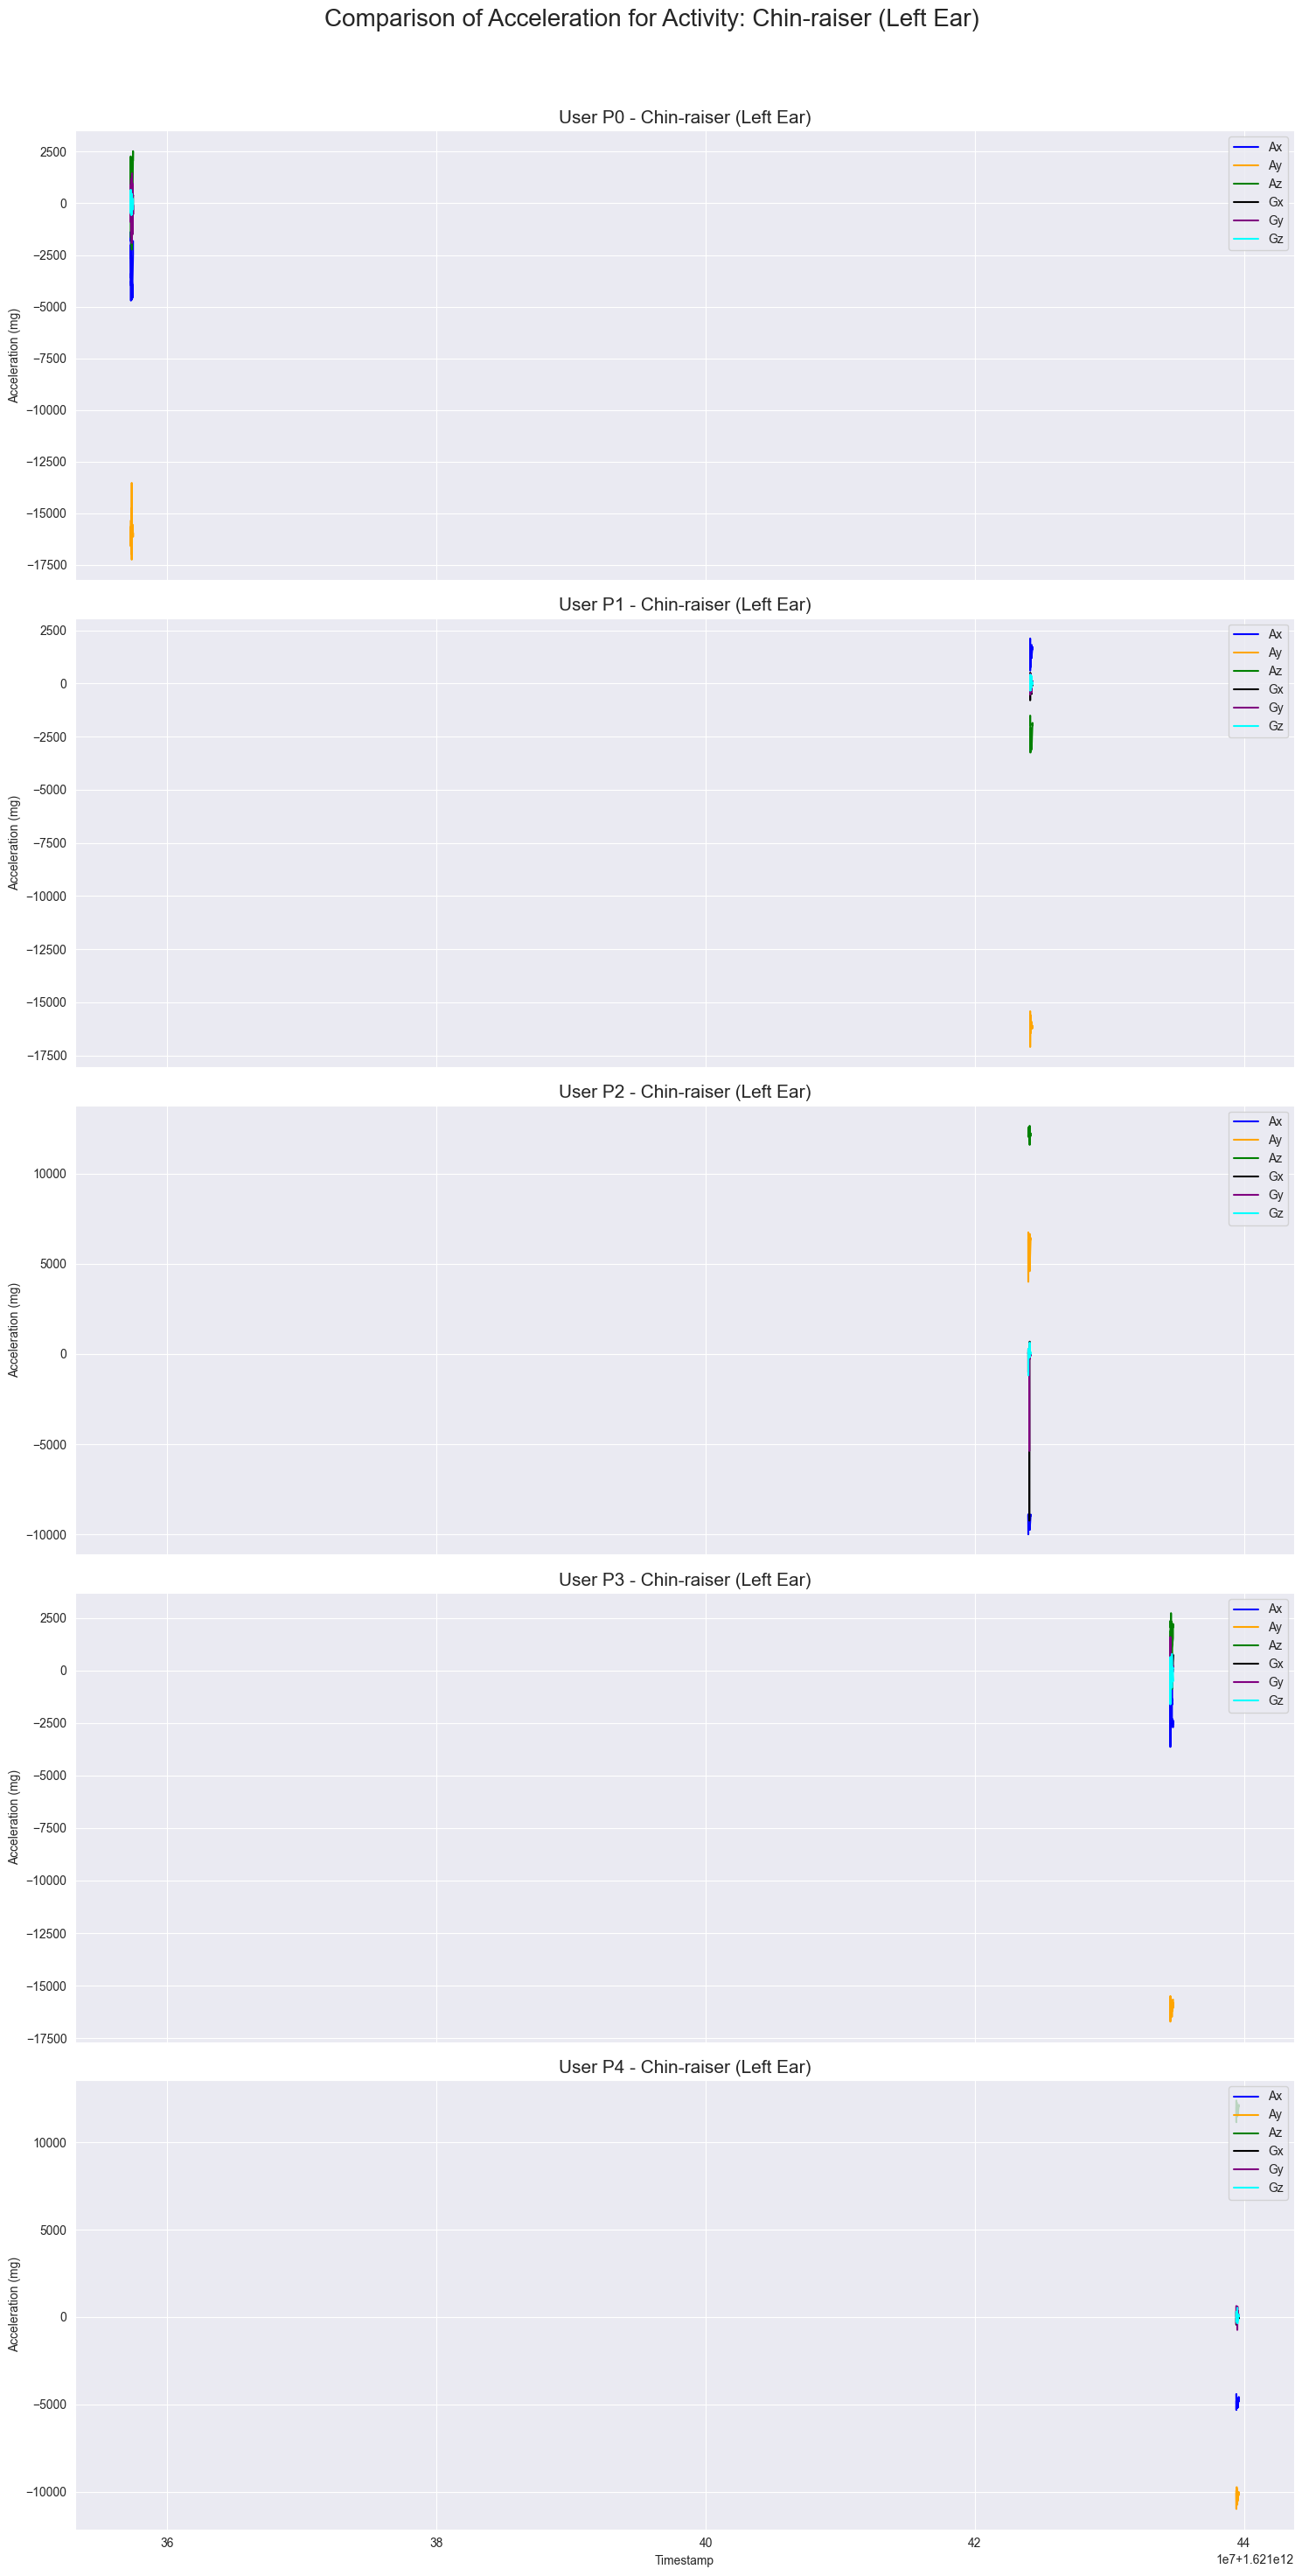

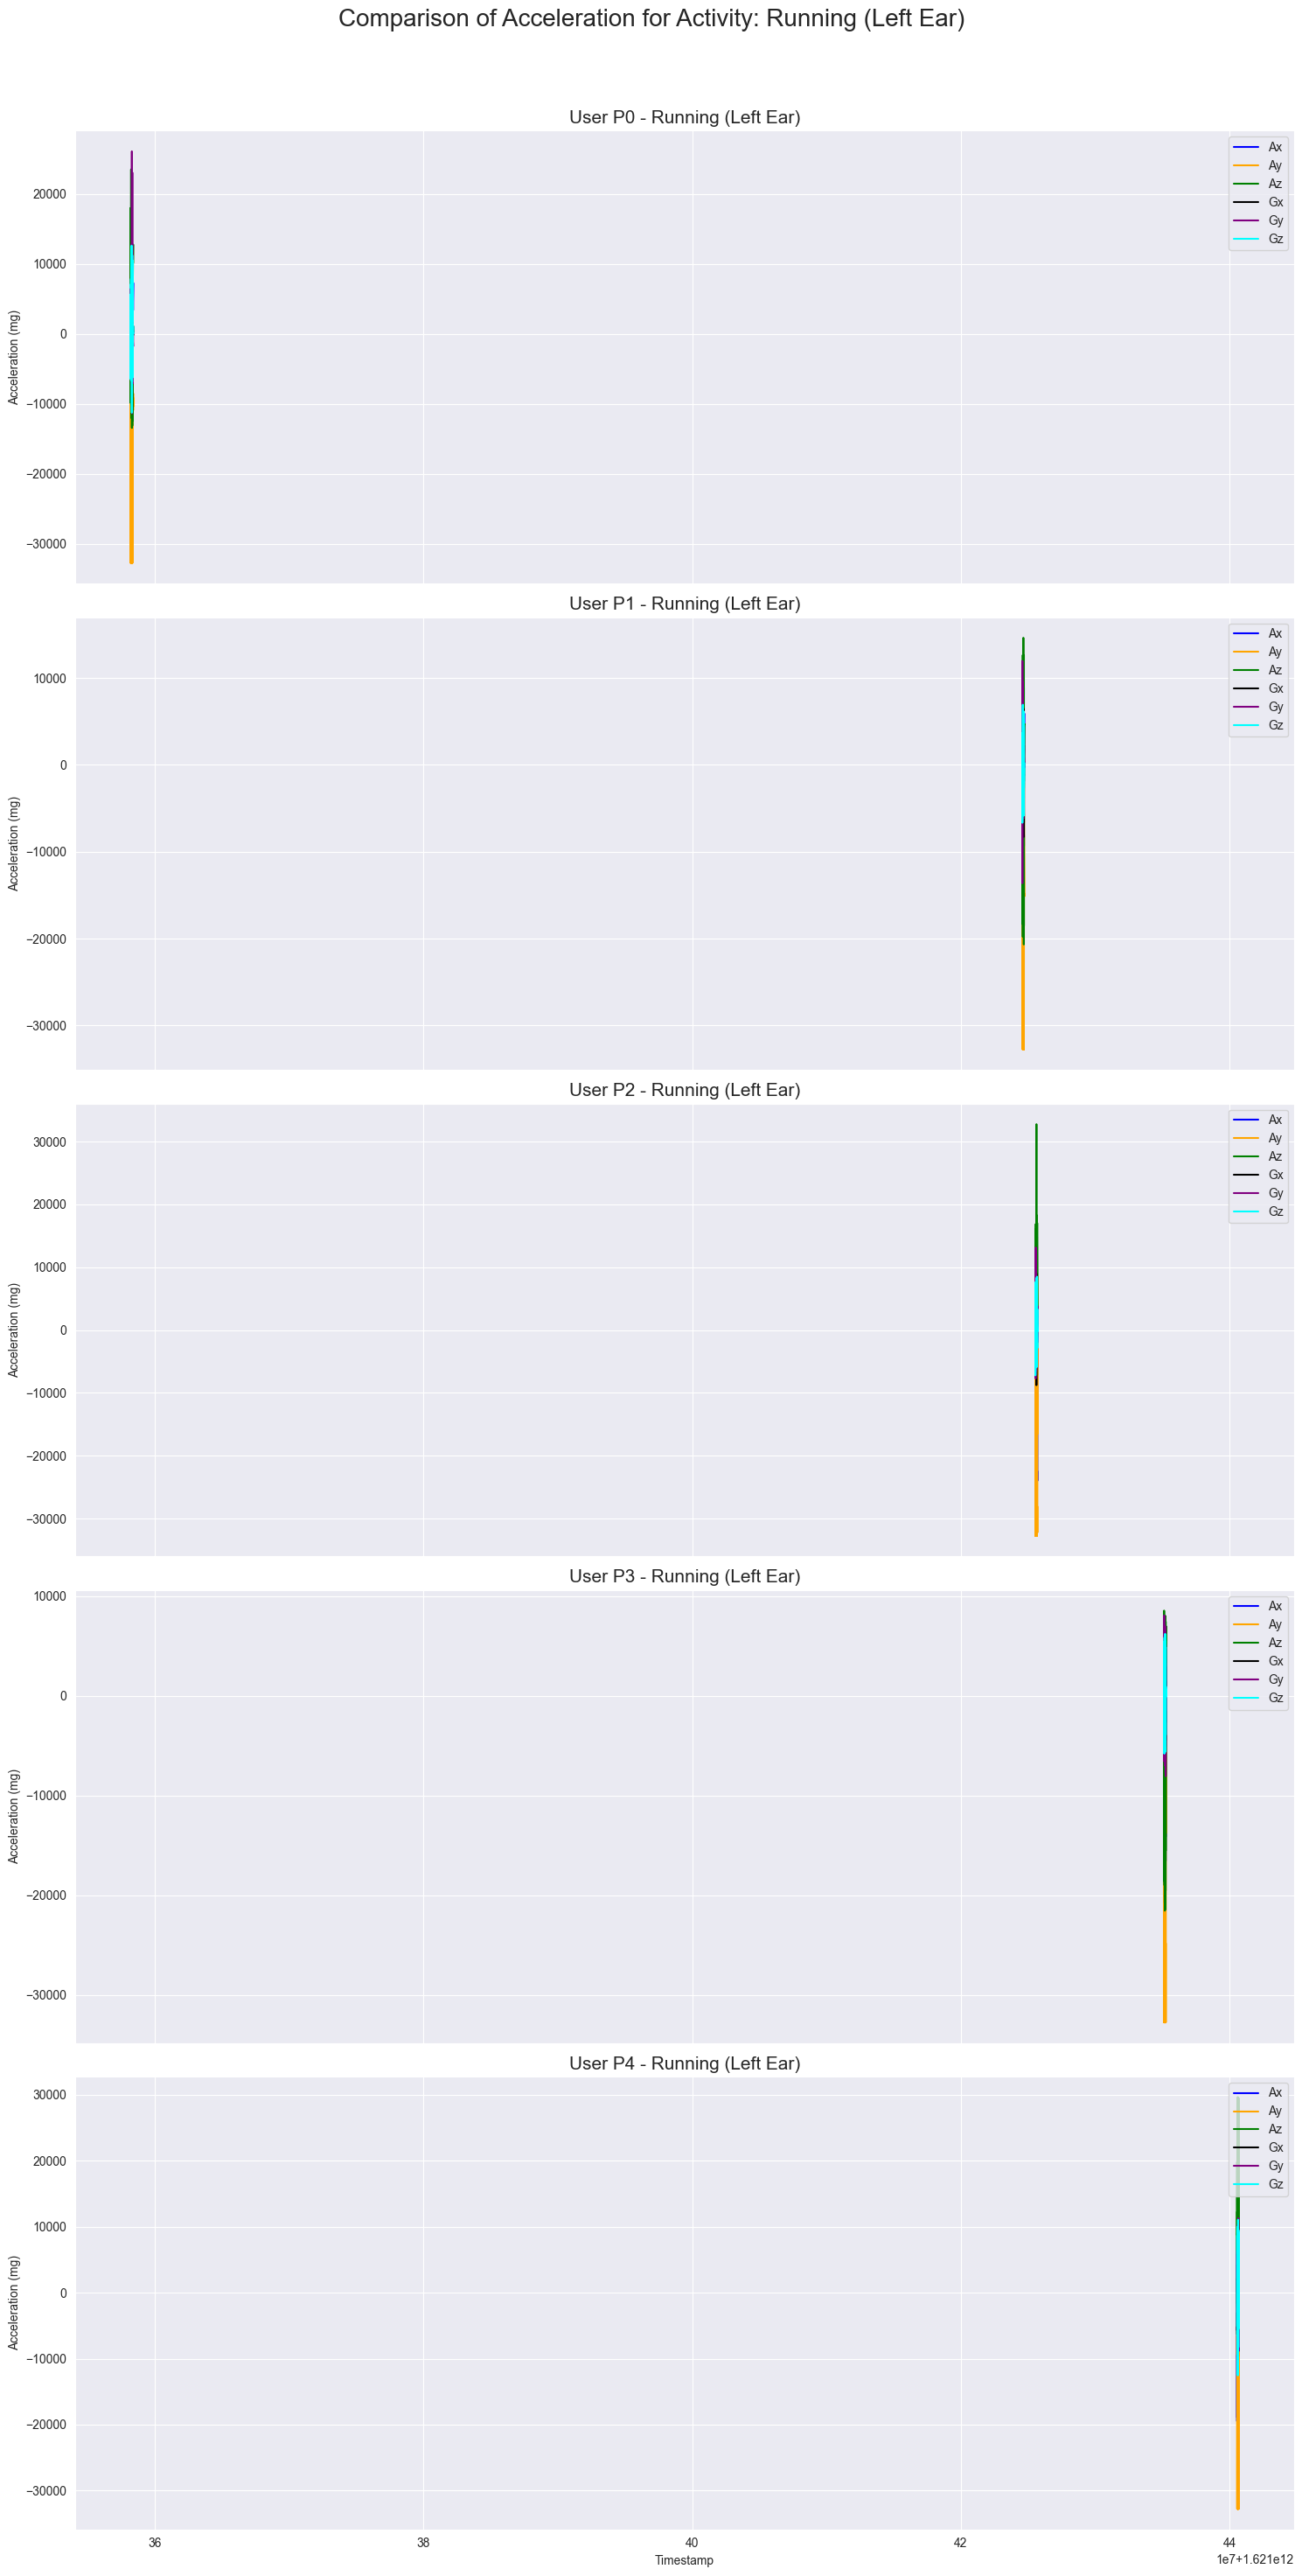

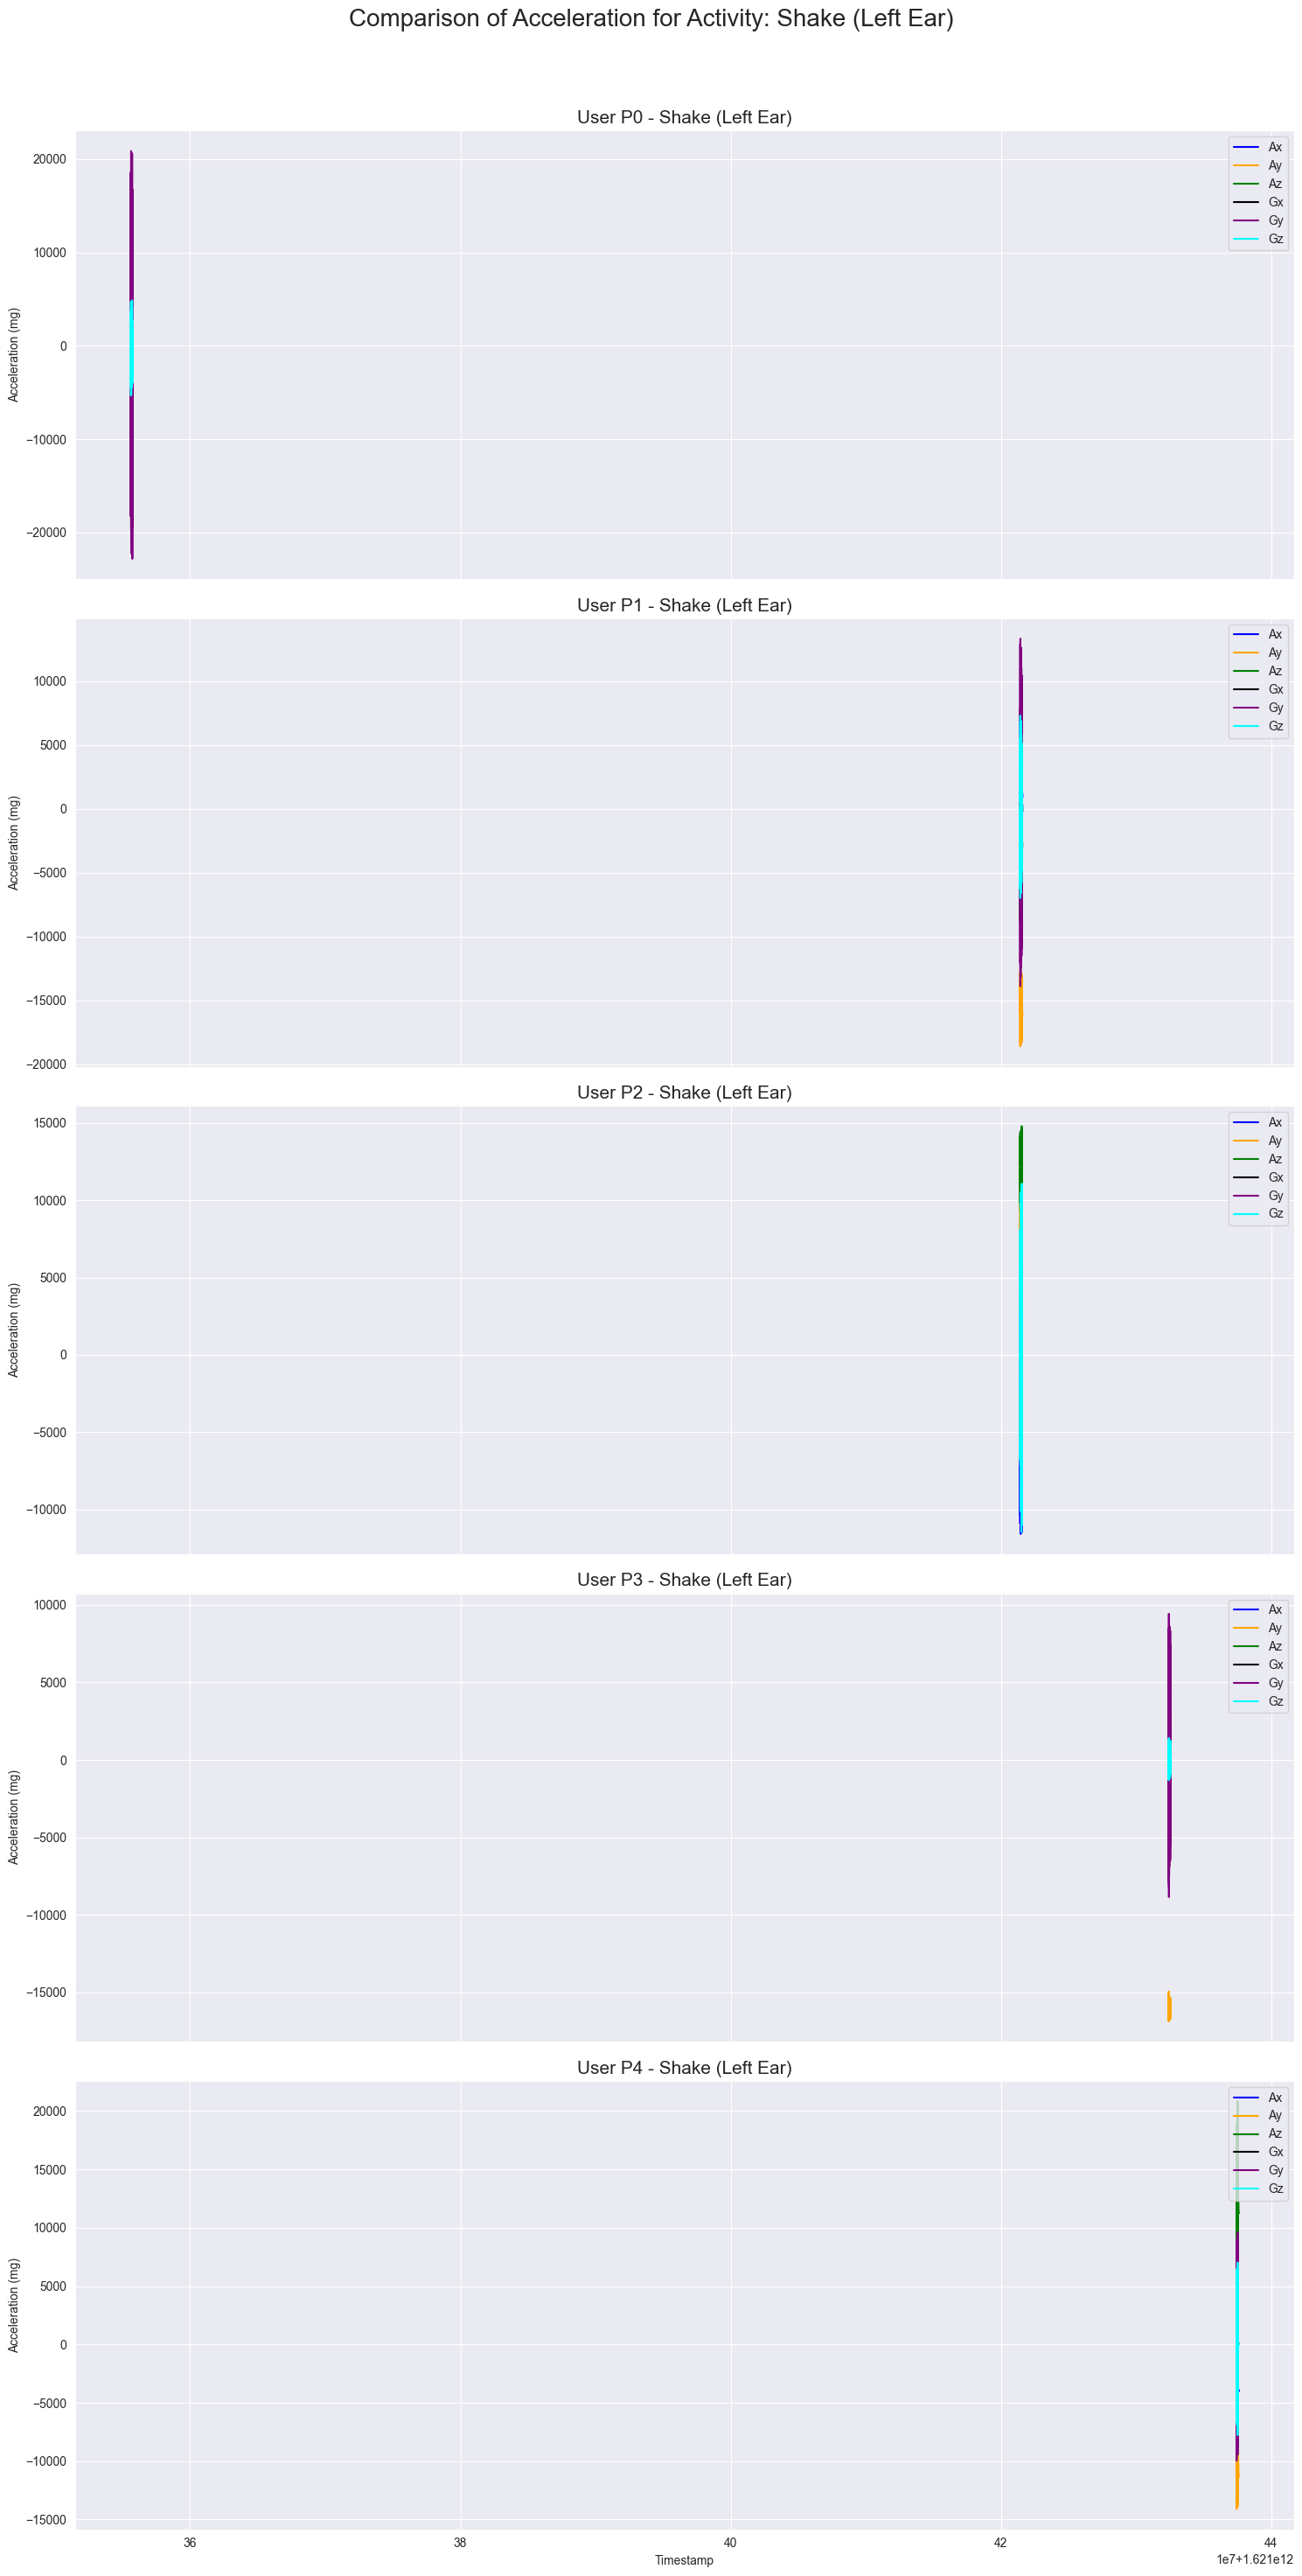

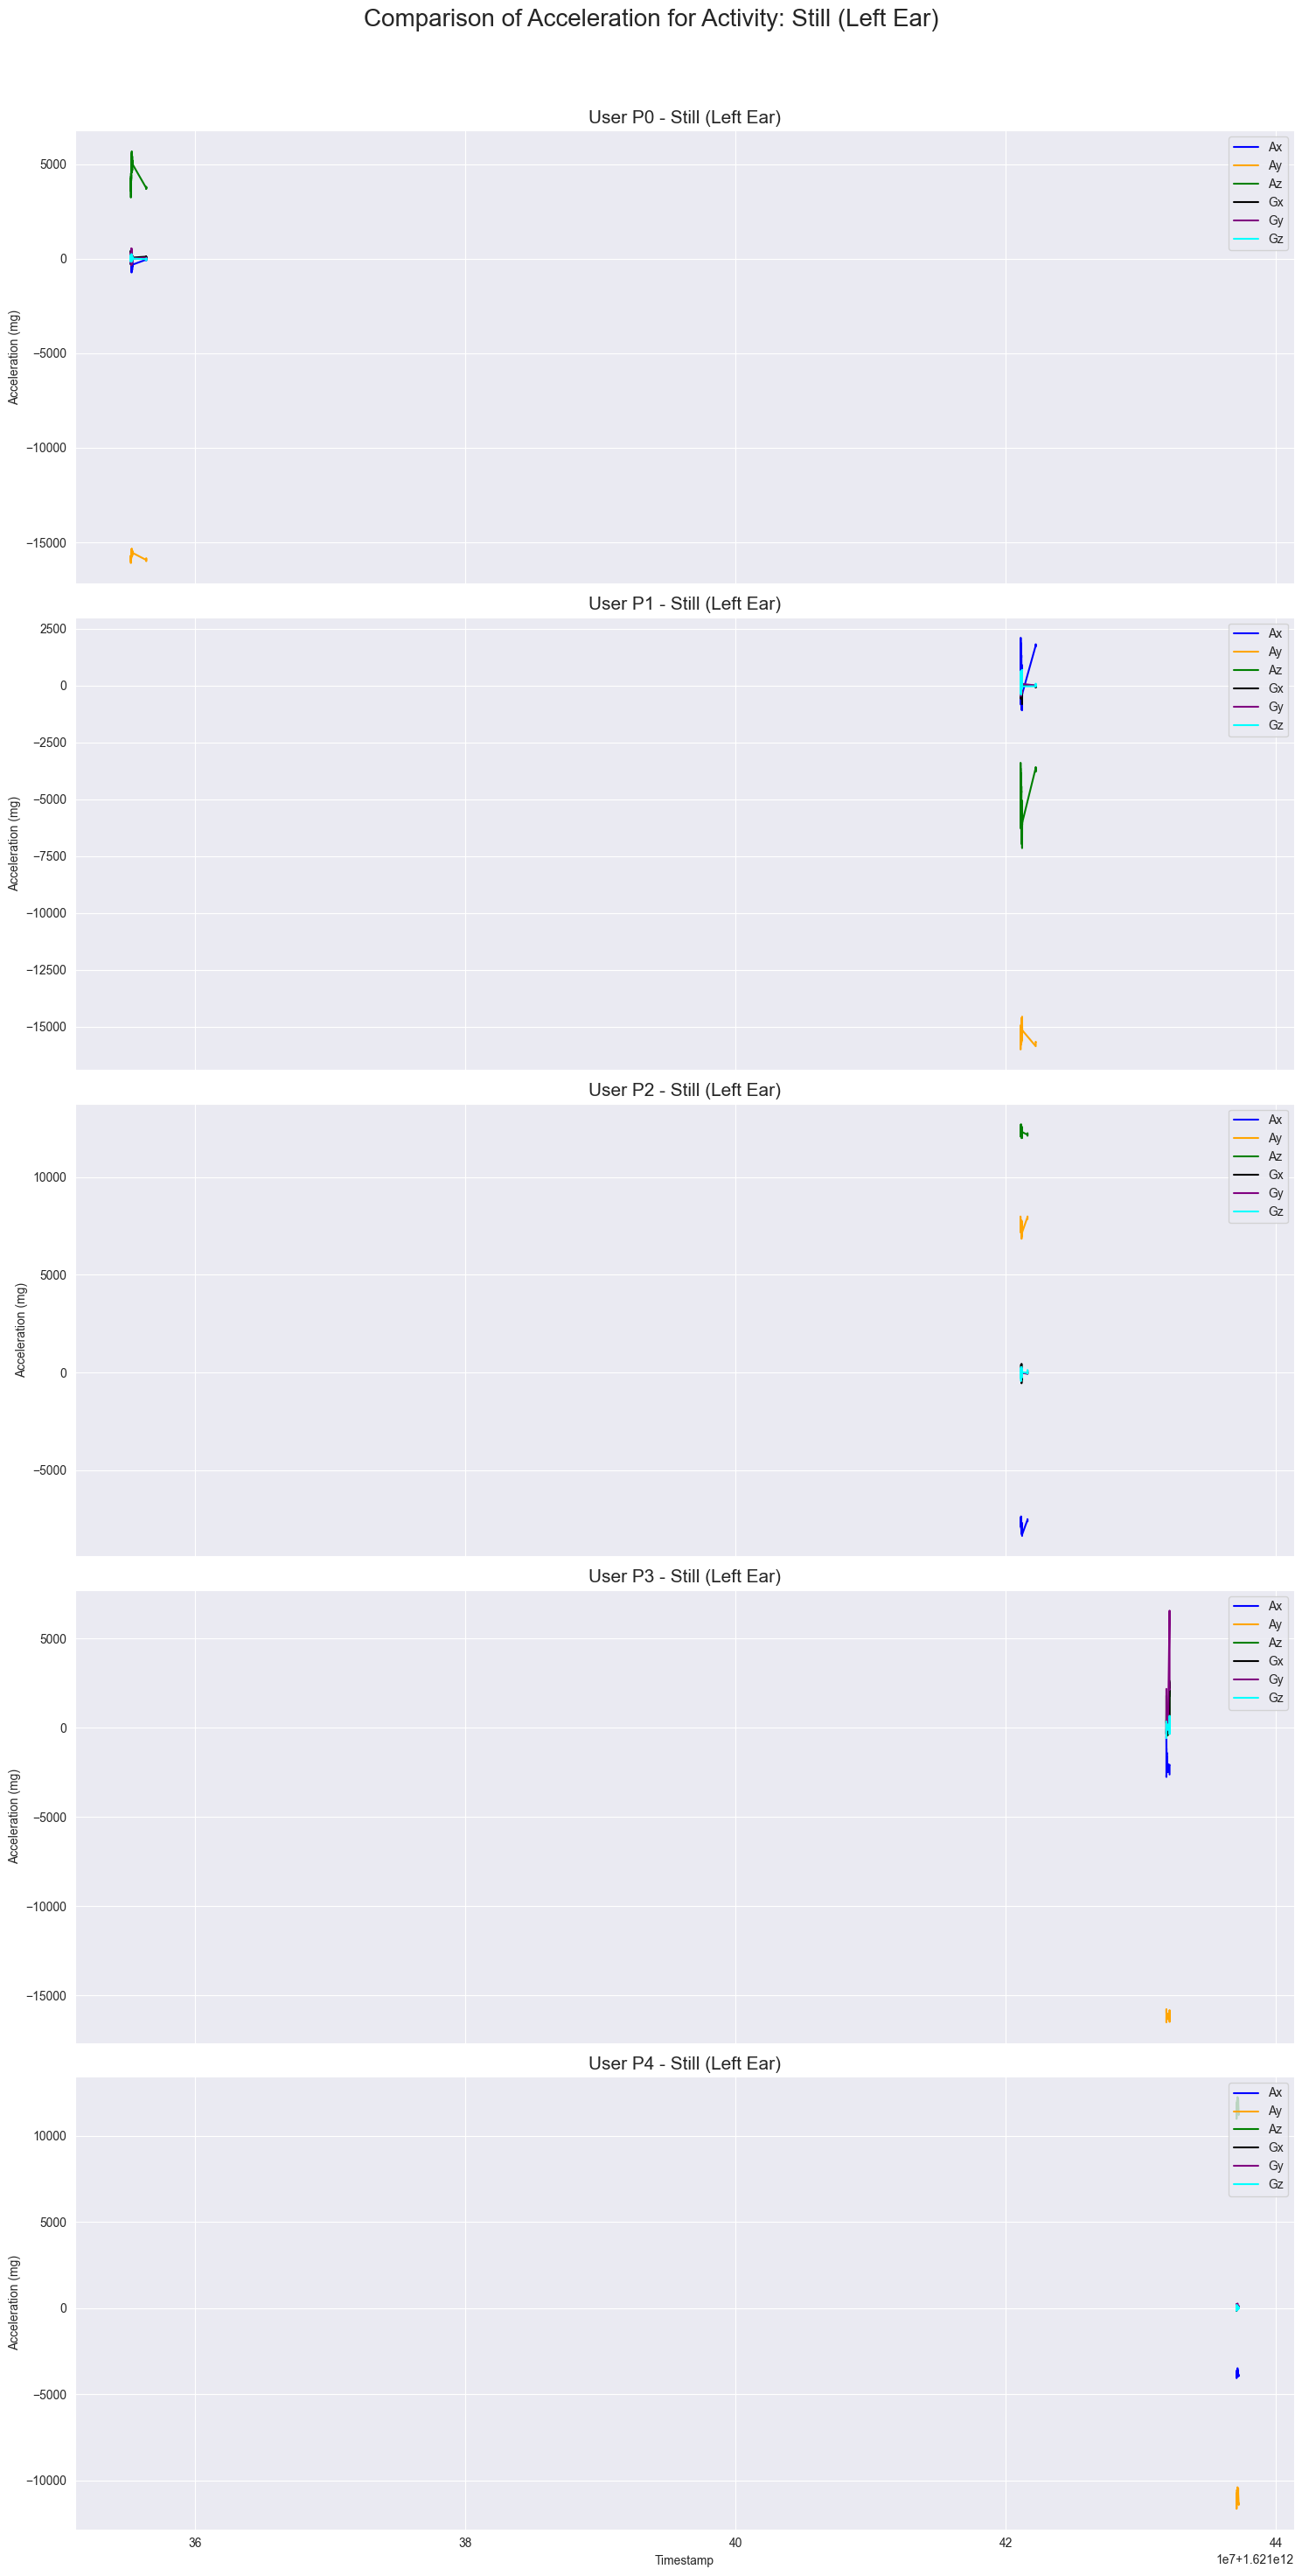

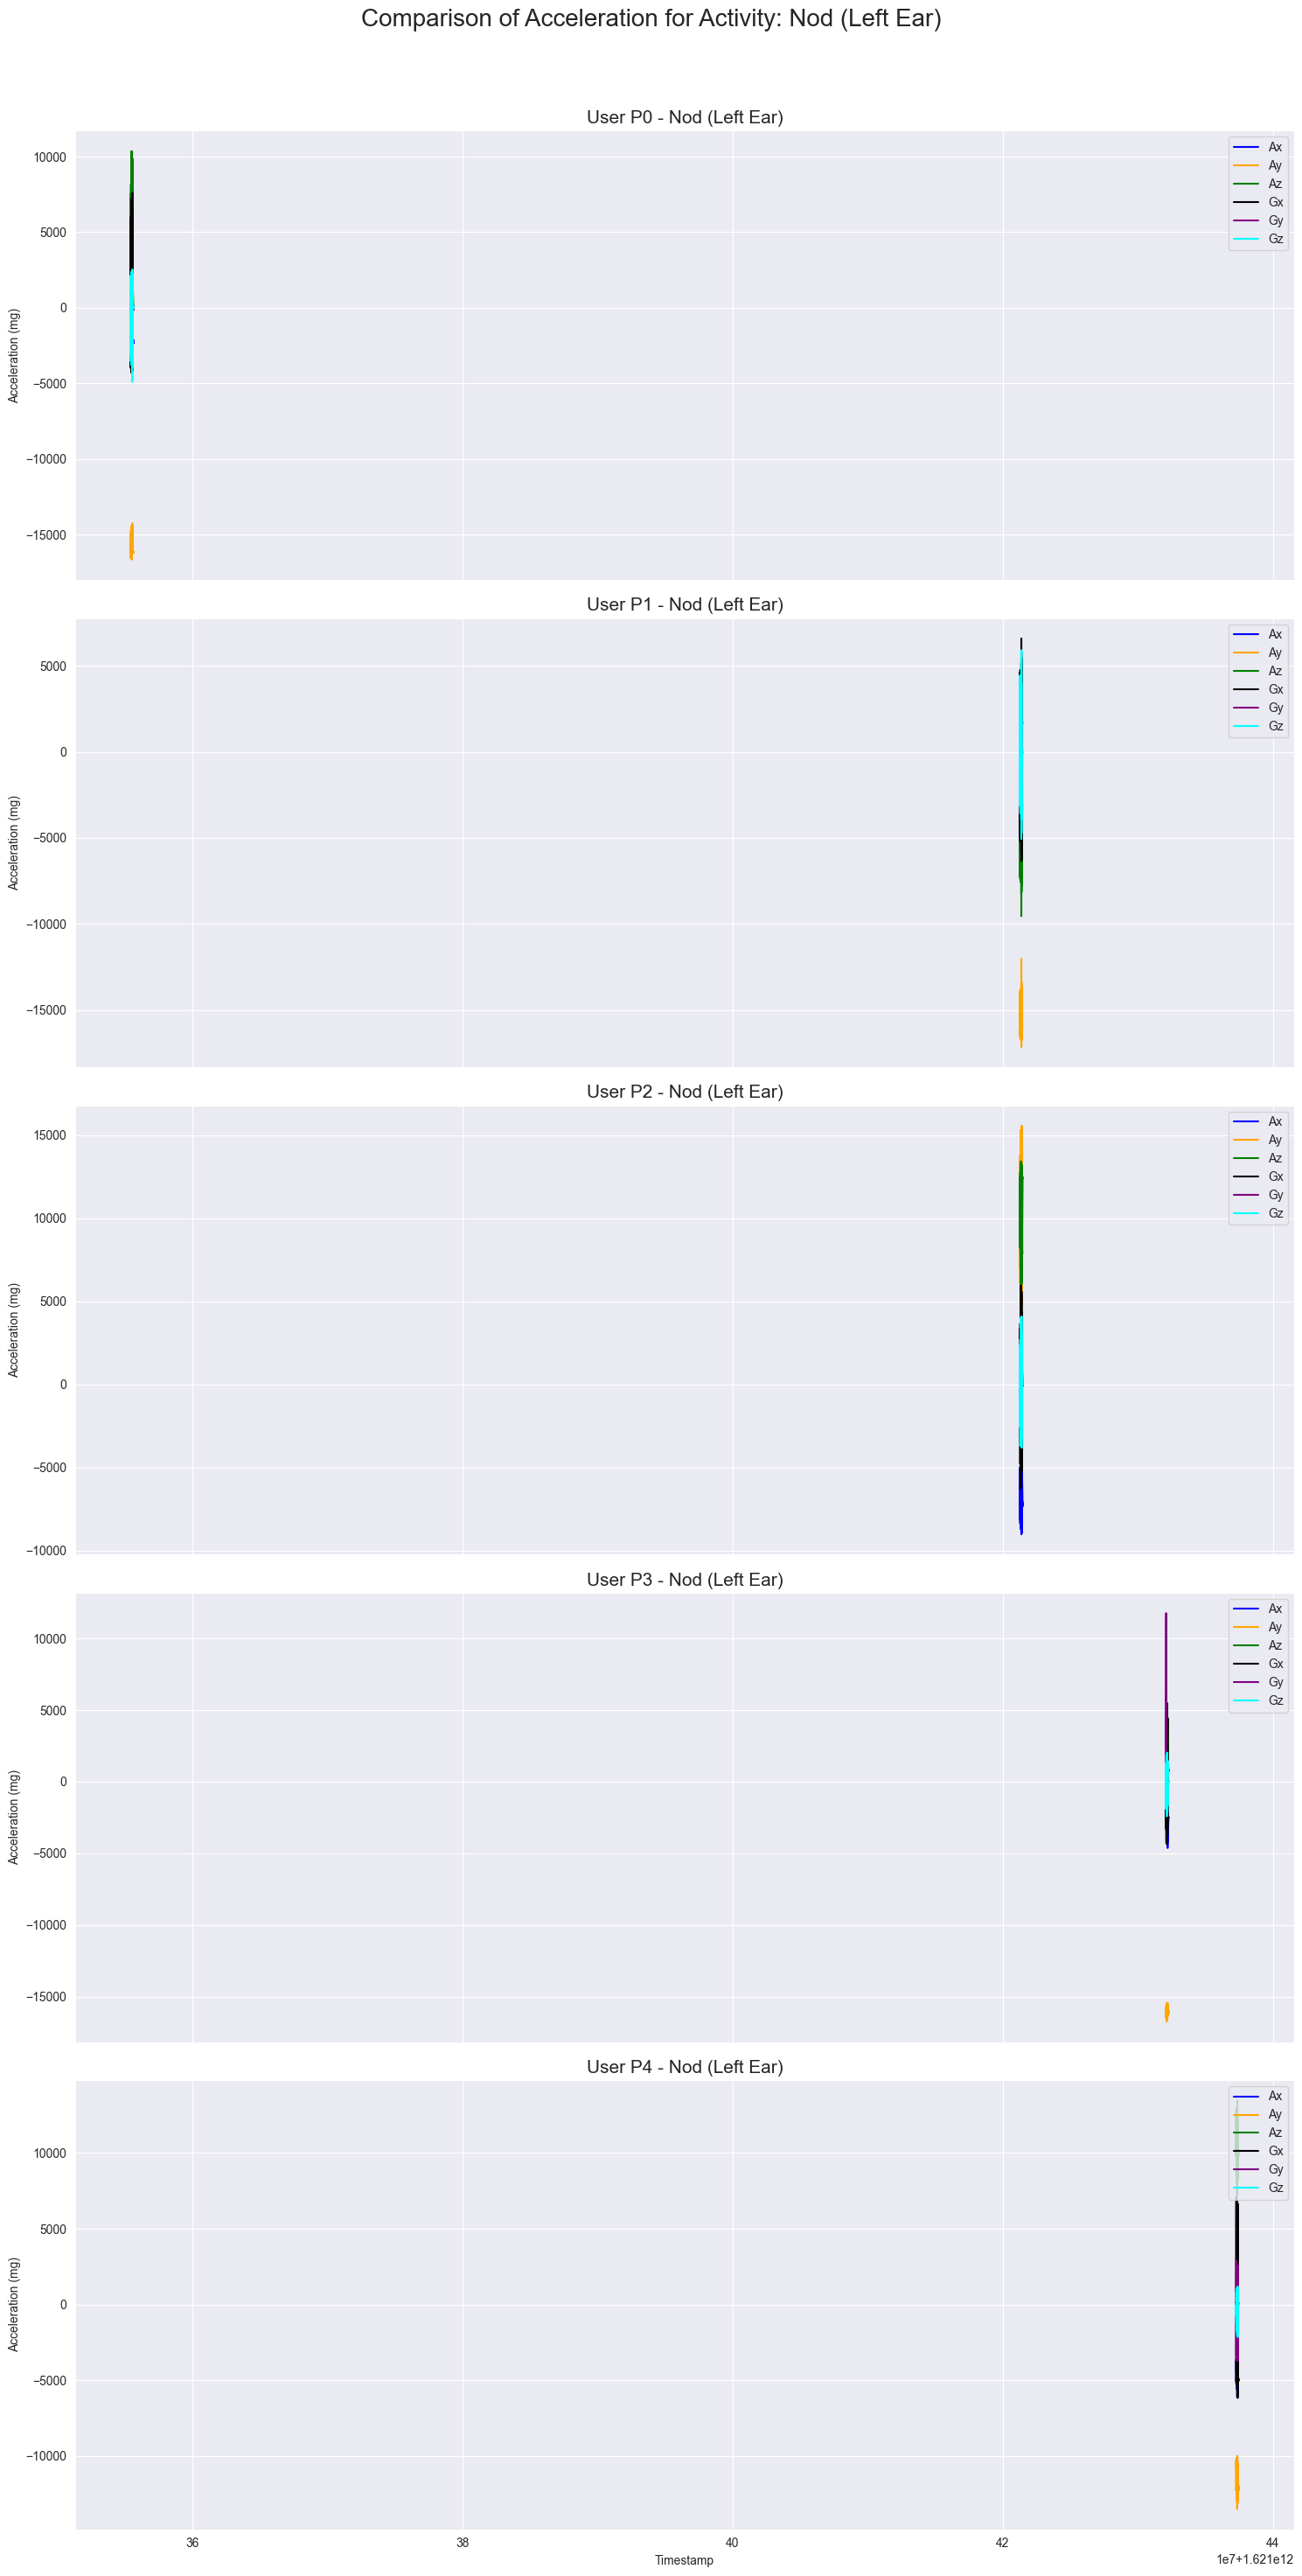

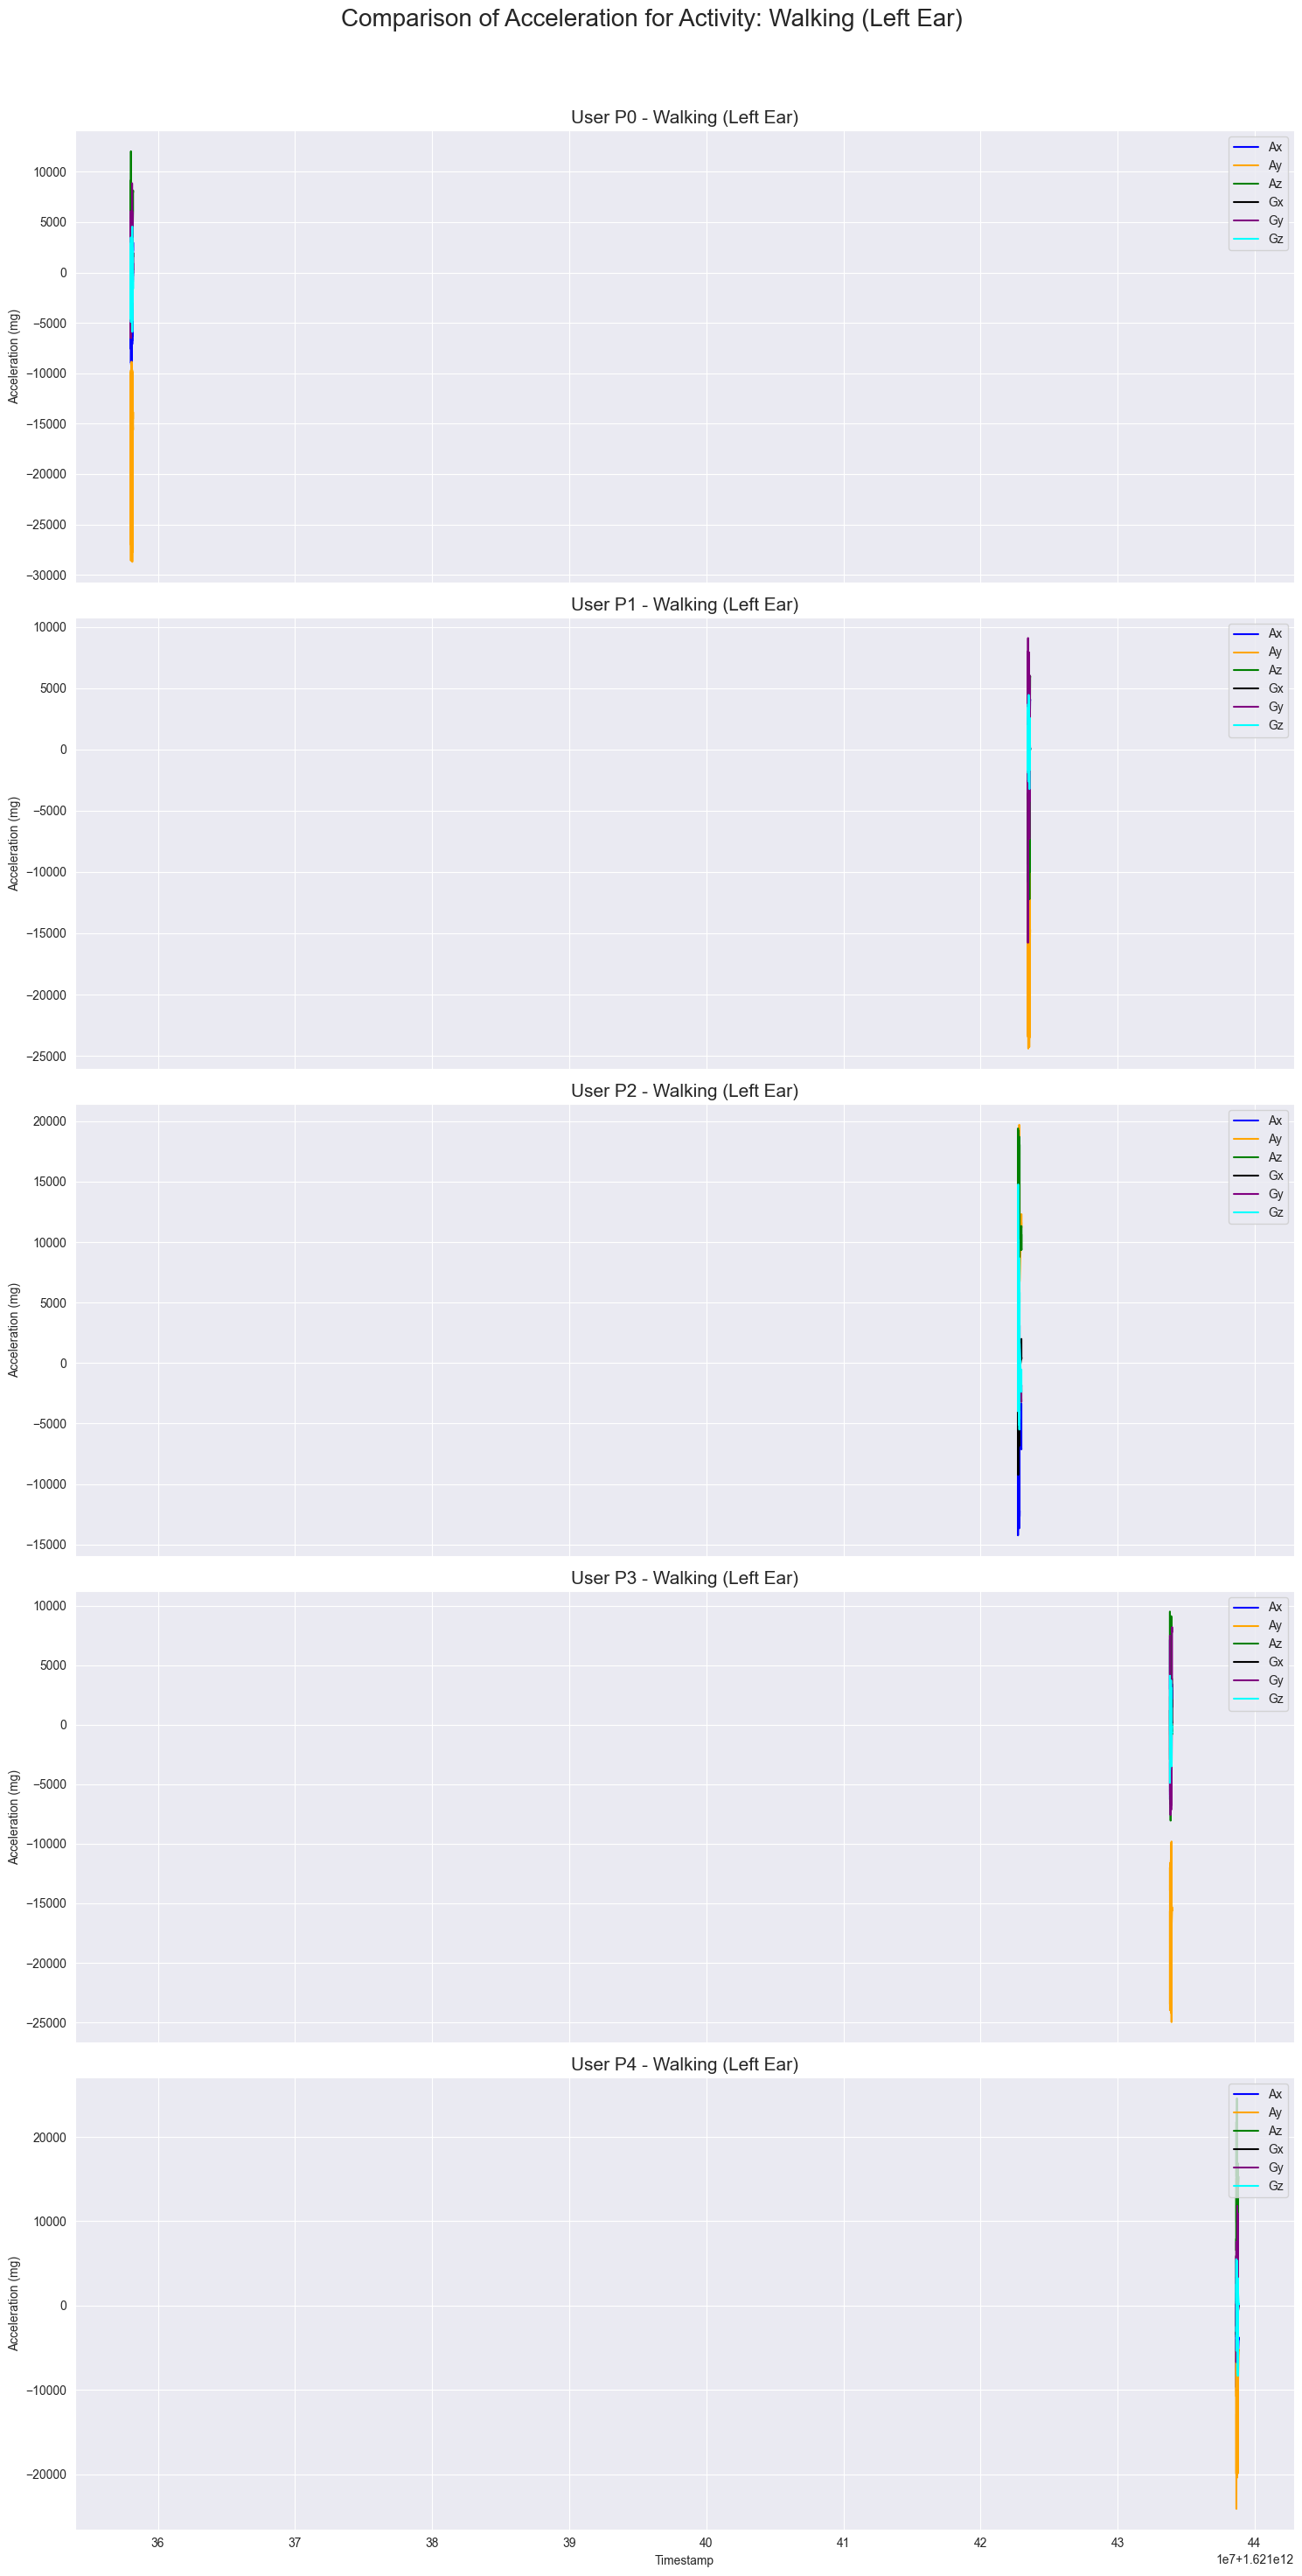

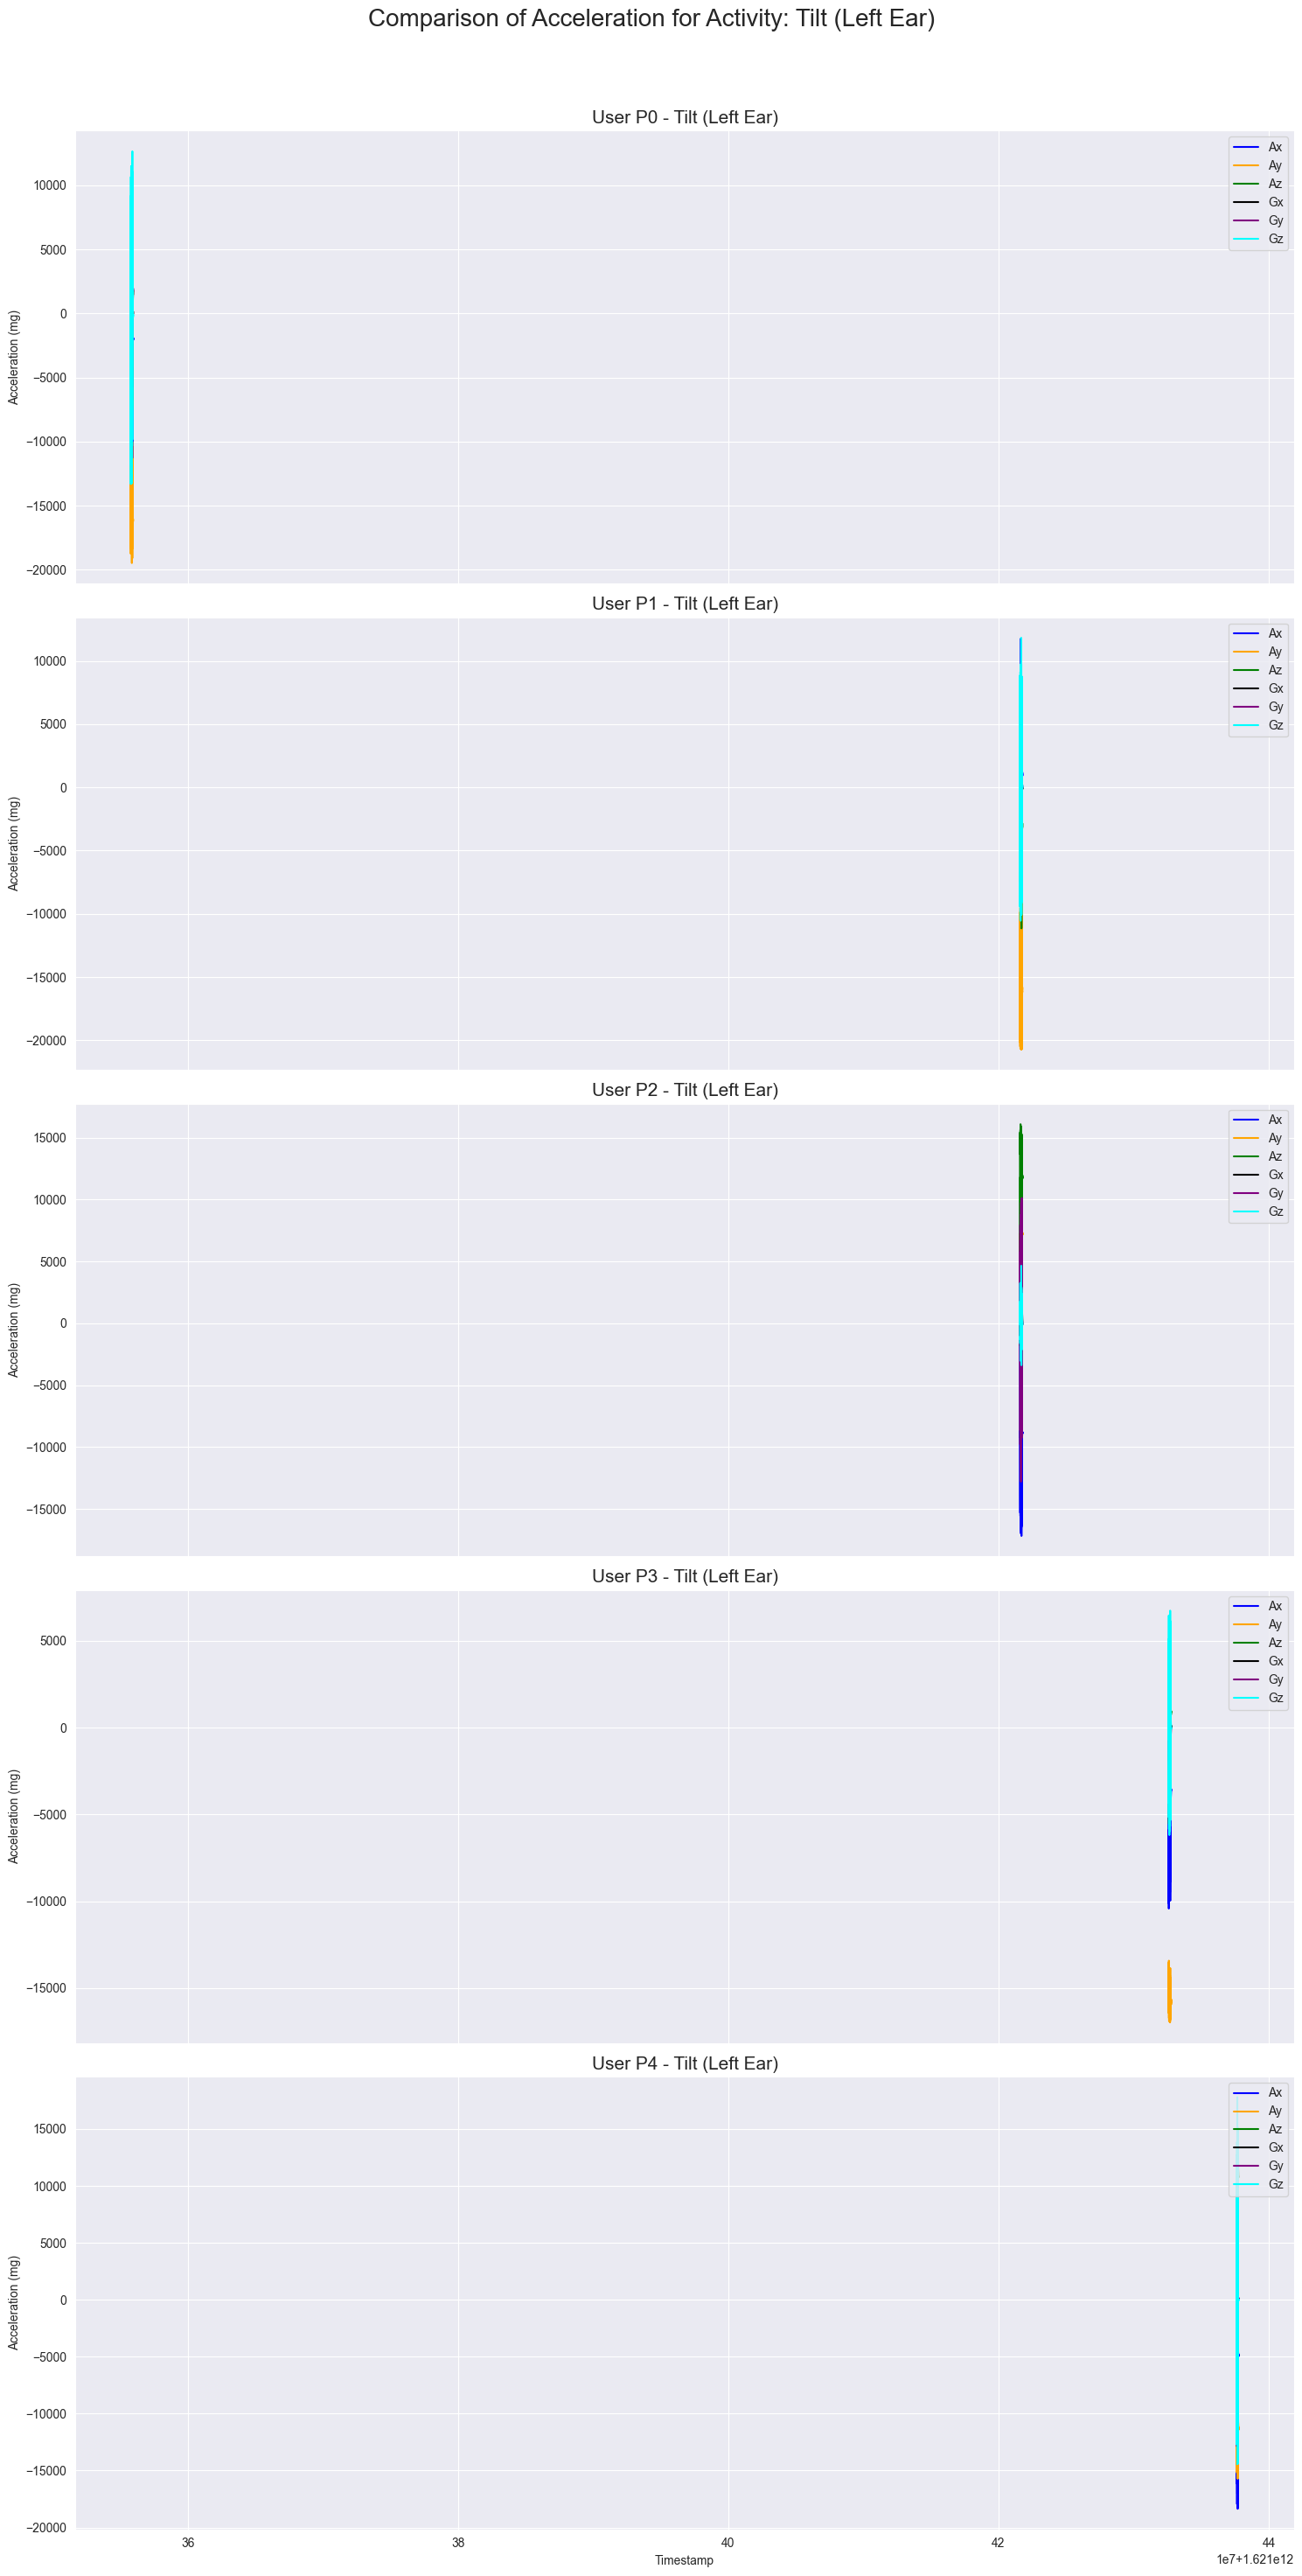

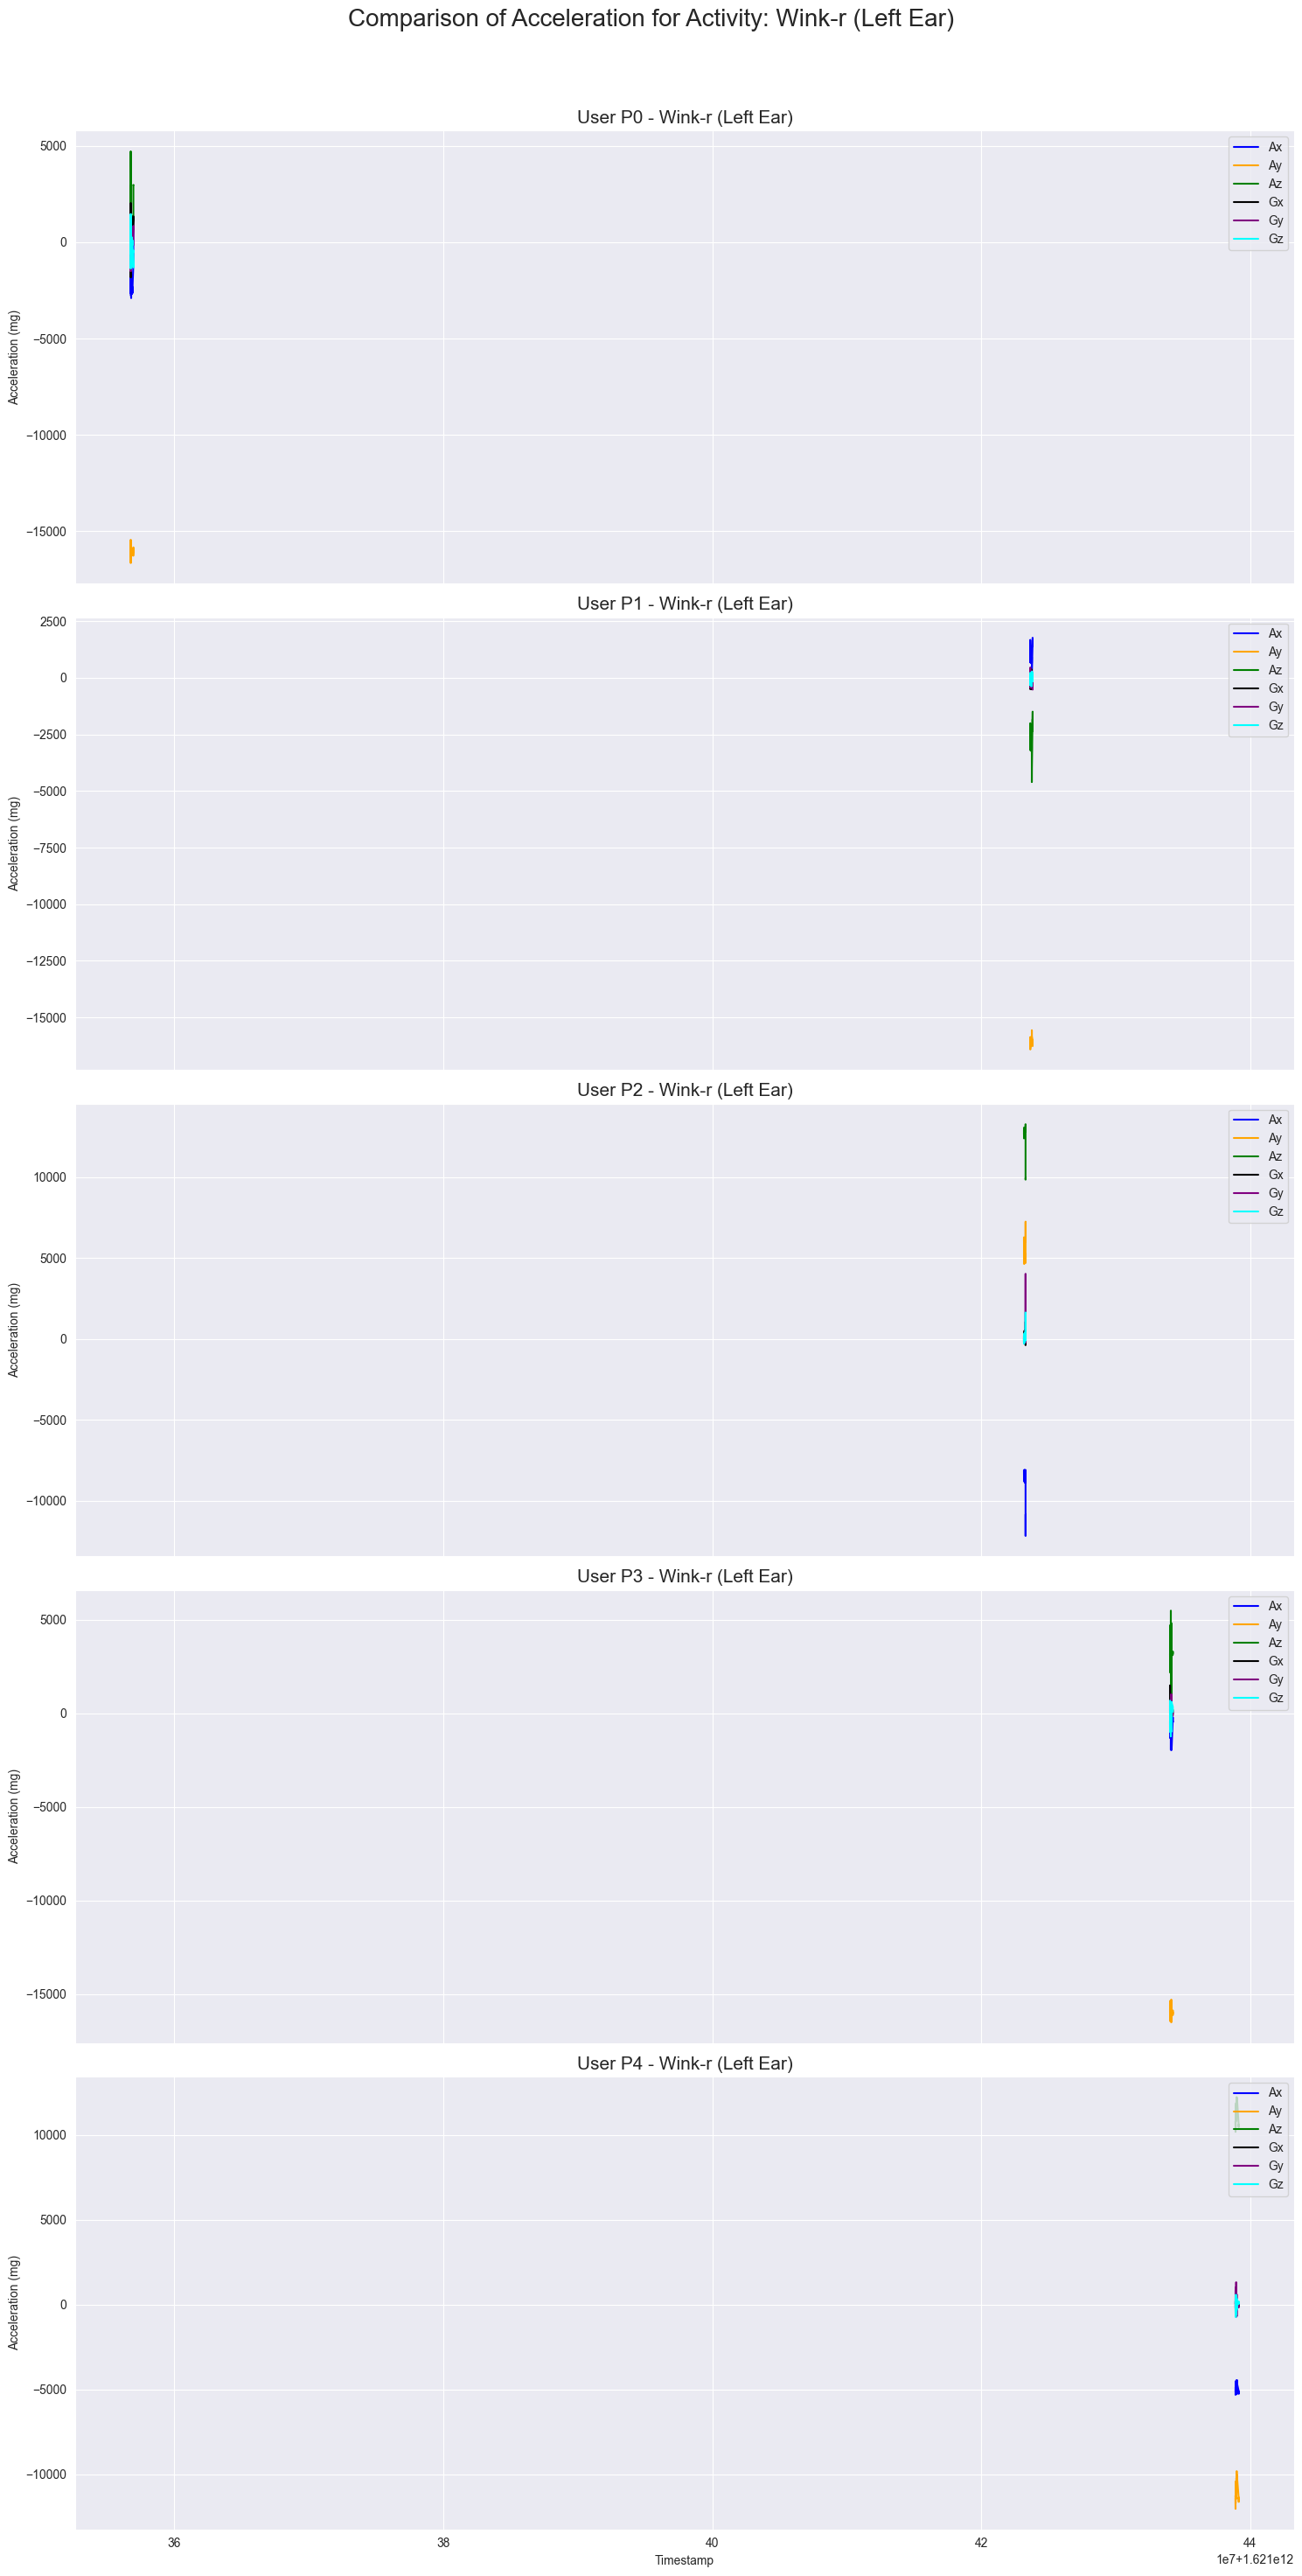

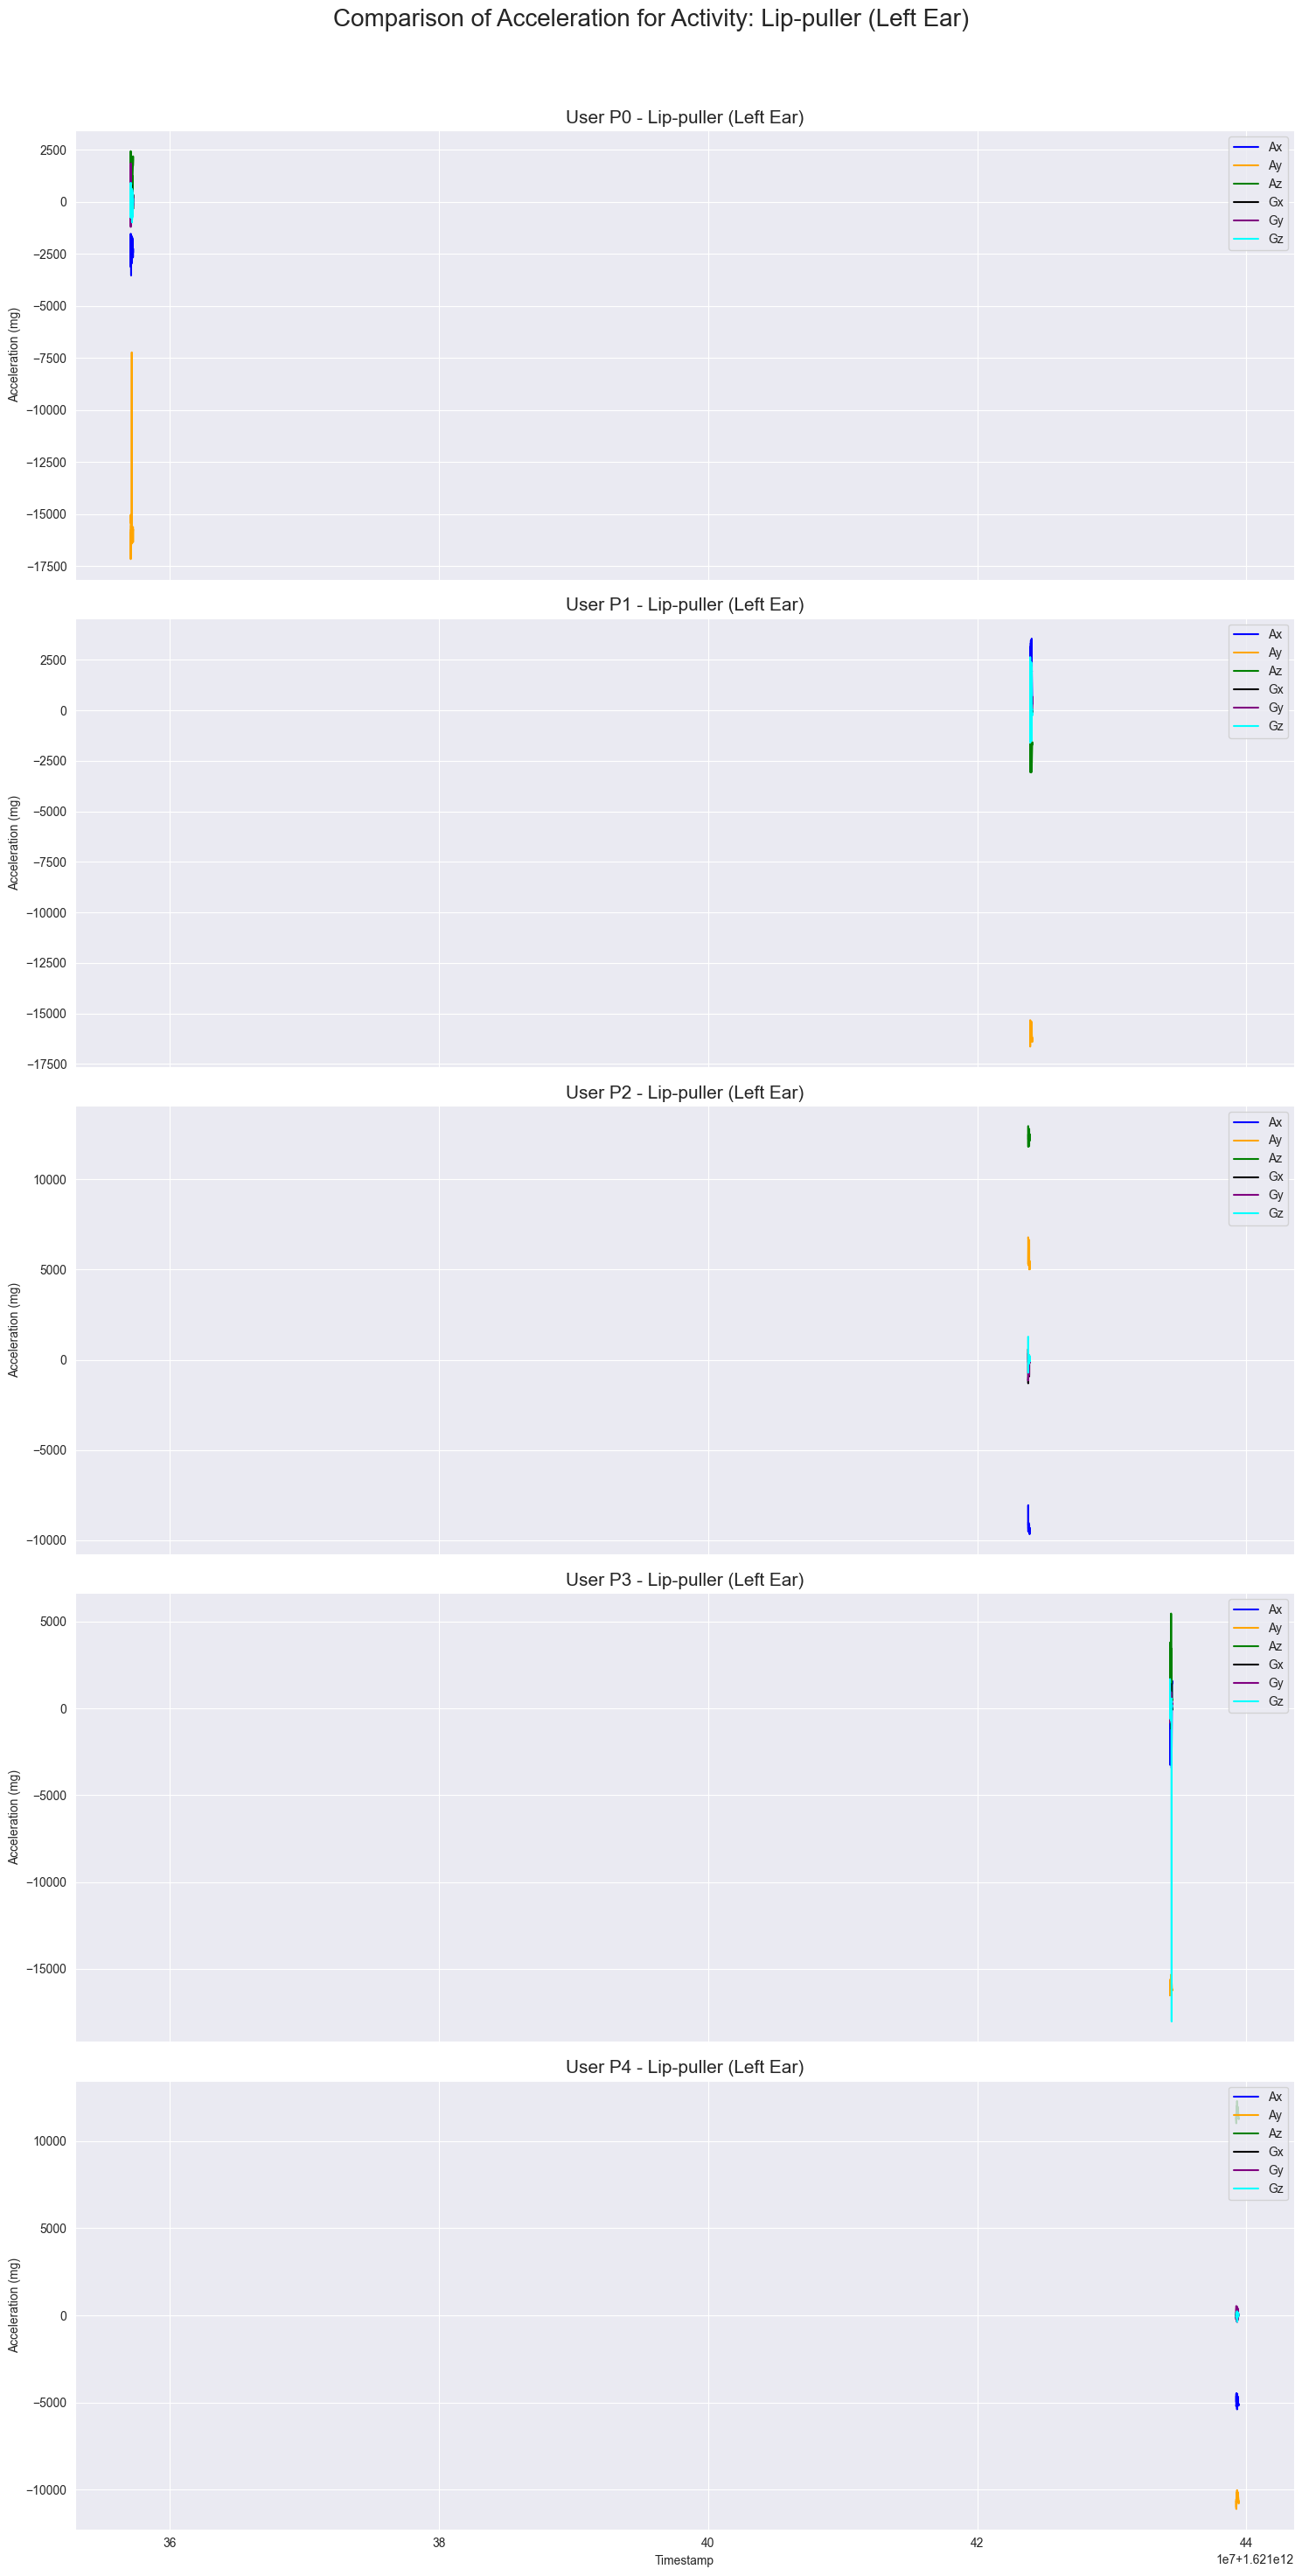

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of activities to analyze
activities = ['brow-lowerer', 'brow-raiser', 'chewing', 'chin-raiser', 'running', 'shake', 'still', 'nod', 'walking', 'tilt', 'wink-r', 'lip-puller']

# List of persons to compare
persons = ['P0', 'P1', 'P2', 'P3', 'P4']

# Define the IMU side for analysis
imu_side = 'left'  # Choose either 'left' or 'right'

# Loop through activities
for activity in activities:
    # Create subplots for visual comparison
    fig, axes = plt.subplots(len(persons), 1, figsize=(15, 6 * len(persons)), sharex=True)
    fig.suptitle(f'Comparison of Acceleration for Activity: {activity.capitalize()} ({imu_side.capitalize()} Ear)', fontsize=20)
    
    for idx, person in enumerate(persons):
        # Filter data for the current person, activity, and IMU side
        data_filtered = final_data[
            (final_data['Person'] == person) & 
            (final_data['Activity'] == activity) & 
            (final_data['IMU_Side'] == imu_side)
        ]
        
        # Plot data for ax, ay, az, gx, gy, gz
        sns.lineplot(y='ax', x='timestamp', data=data_filtered, label='Ax', color='blue', ax=axes[idx])
        sns.lineplot(y='ay', x='timestamp', data=data_filtered, label='Ay', color='orange', ax=axes[idx])
        sns.lineplot(y='az', x='timestamp', data=data_filtered, label='Az', color='green', ax=axes[idx])
        sns.lineplot(y='gx', x='timestamp', data=data_filtered, label='Gx', color='black', ax=axes[idx])
        sns.lineplot(y='gy', x='timestamp', data=data_filtered, label='Gy', color='purple', ax=axes[idx])
        sns.lineplot(y='gz', x='timestamp', data=data_filtered, label='Gz', color='cyan', ax=axes[idx])
        
        # Set title for the subplot
        axes[idx].set_title(f'User {person} - {activity.capitalize()} ({imu_side.capitalize()} Ear)', fontsize=15)
        axes[idx].set_ylabel('Acceleration (mg)')
        axes[idx].legend(loc='upper right')
    
    # Set common x-axis label
    plt.xlabel('Timestamp')
    
    # Show the plot
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the main title
    plt.show()


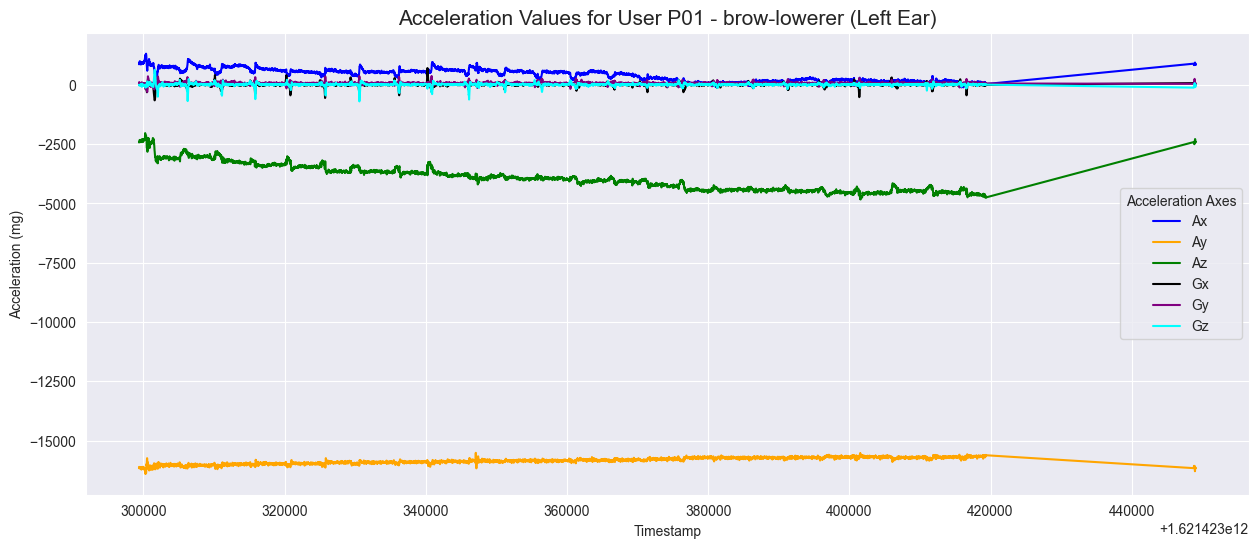

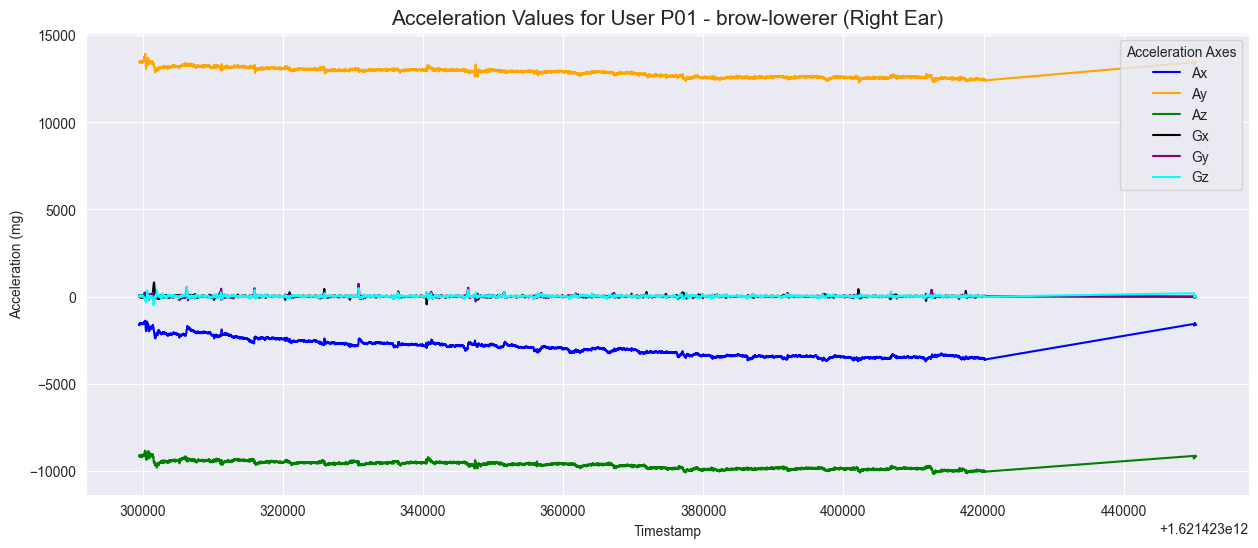

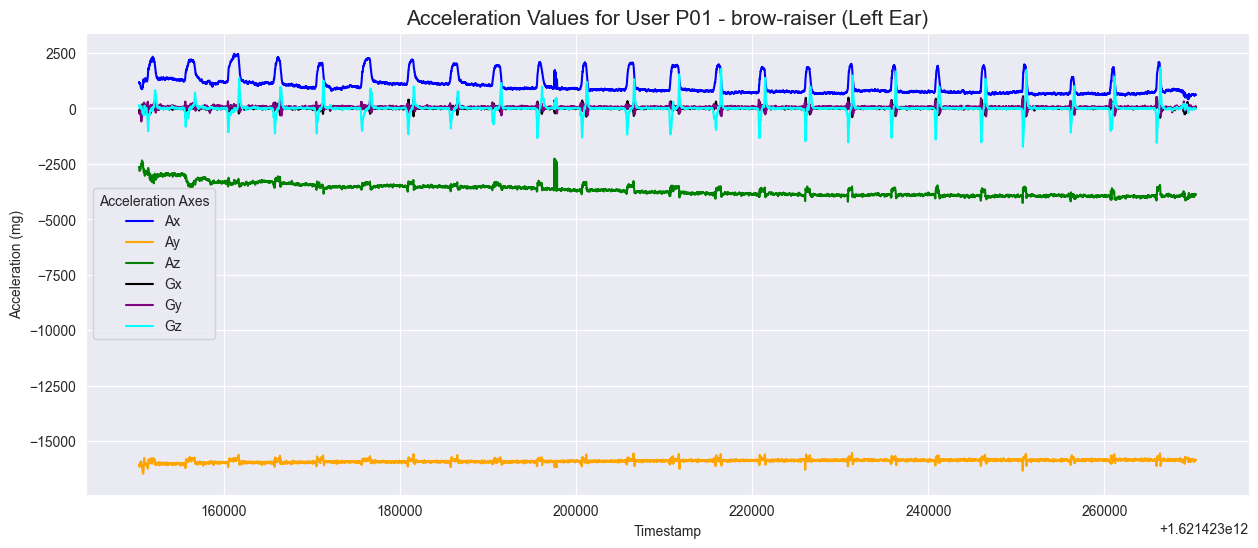

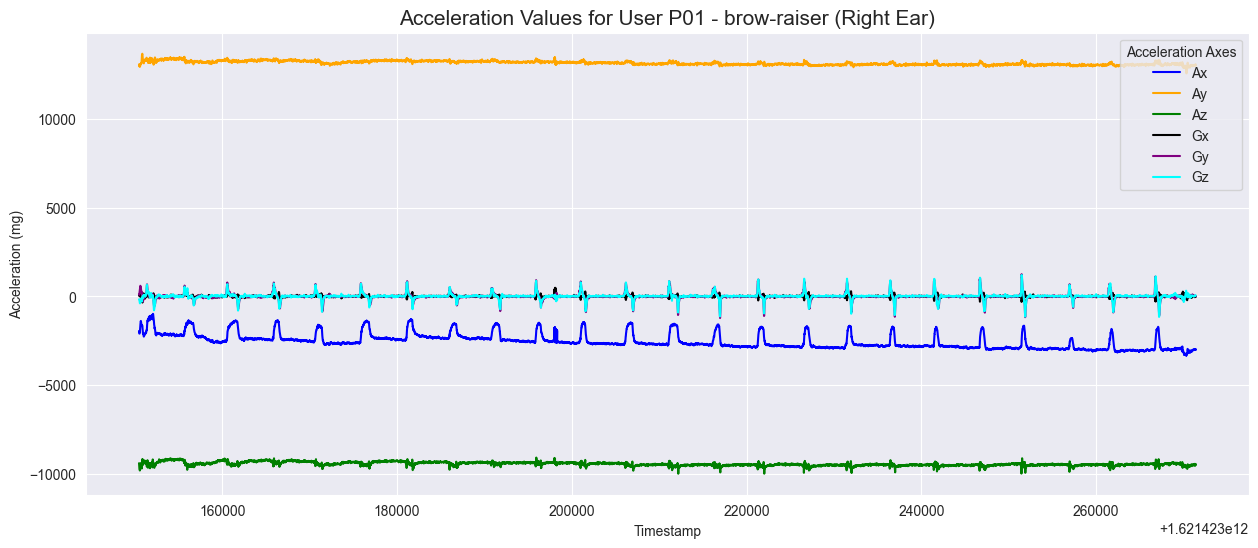

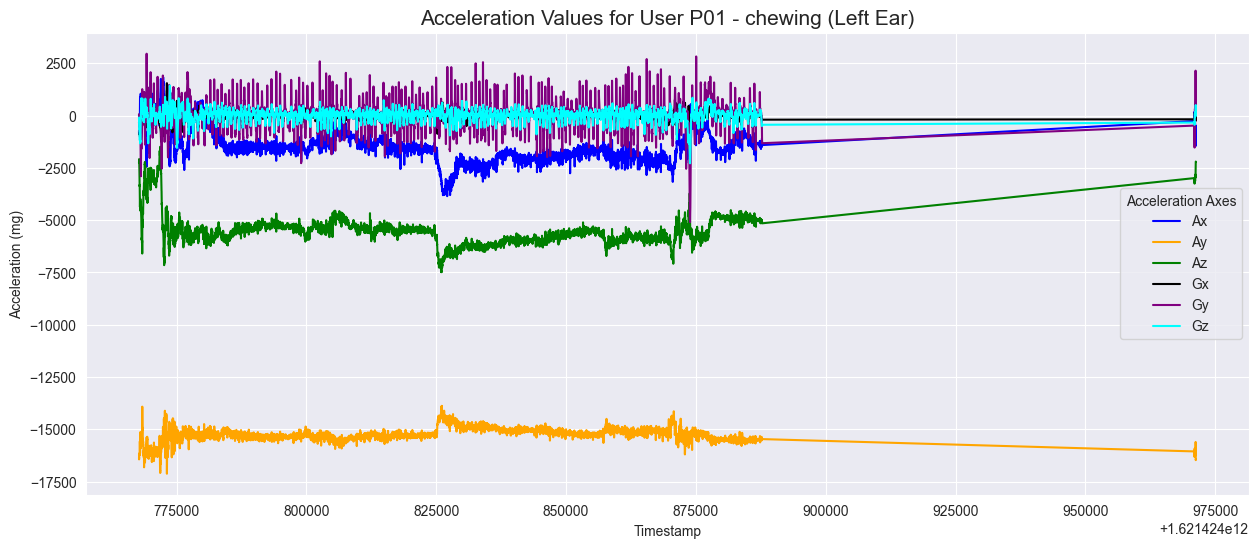

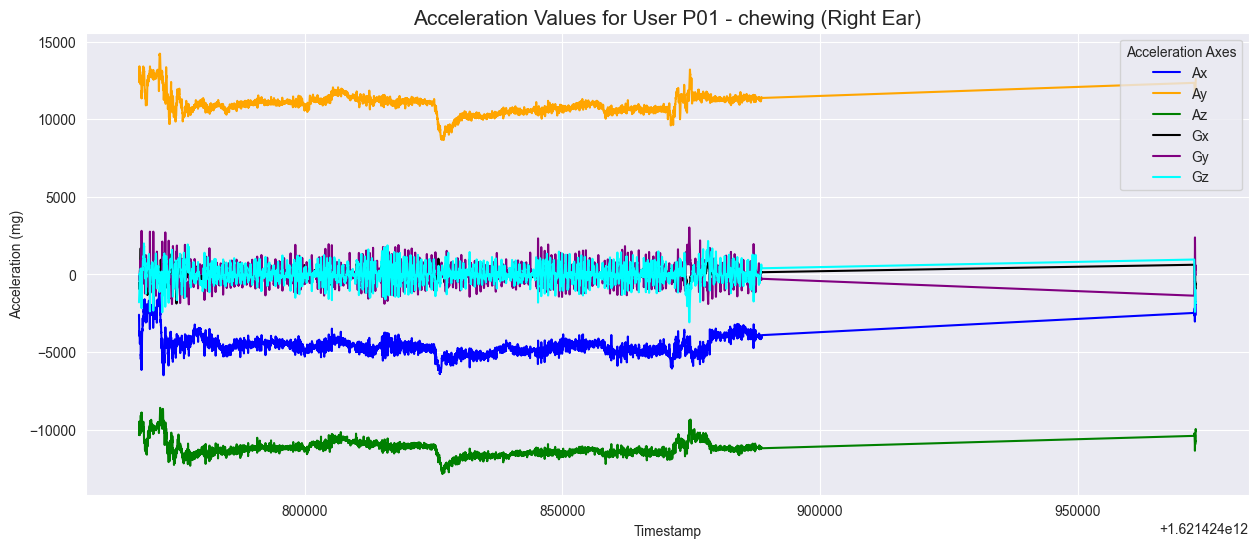

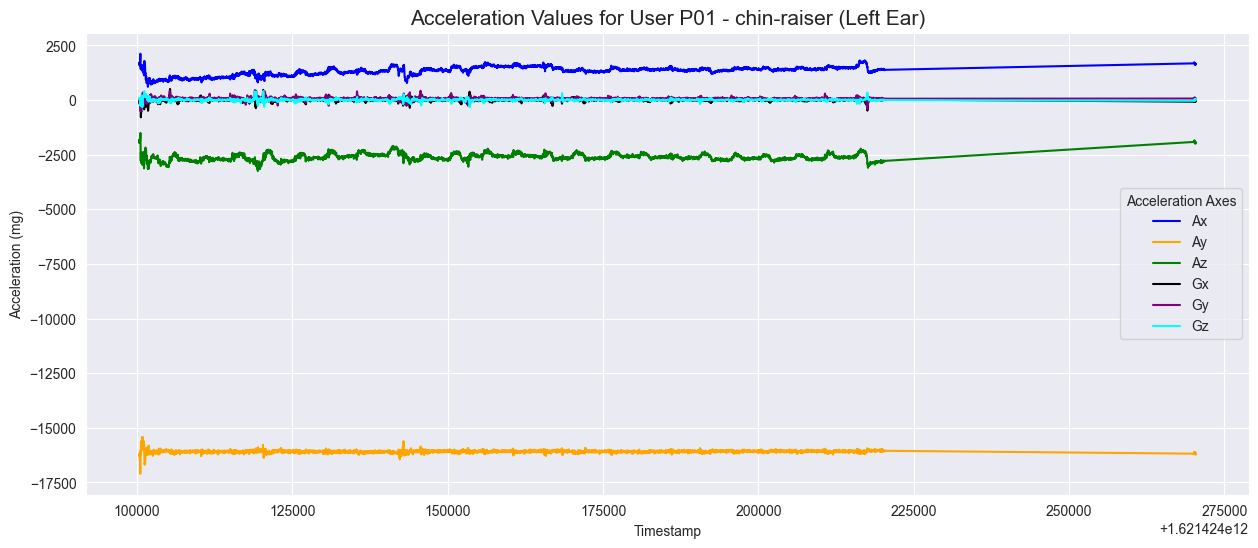

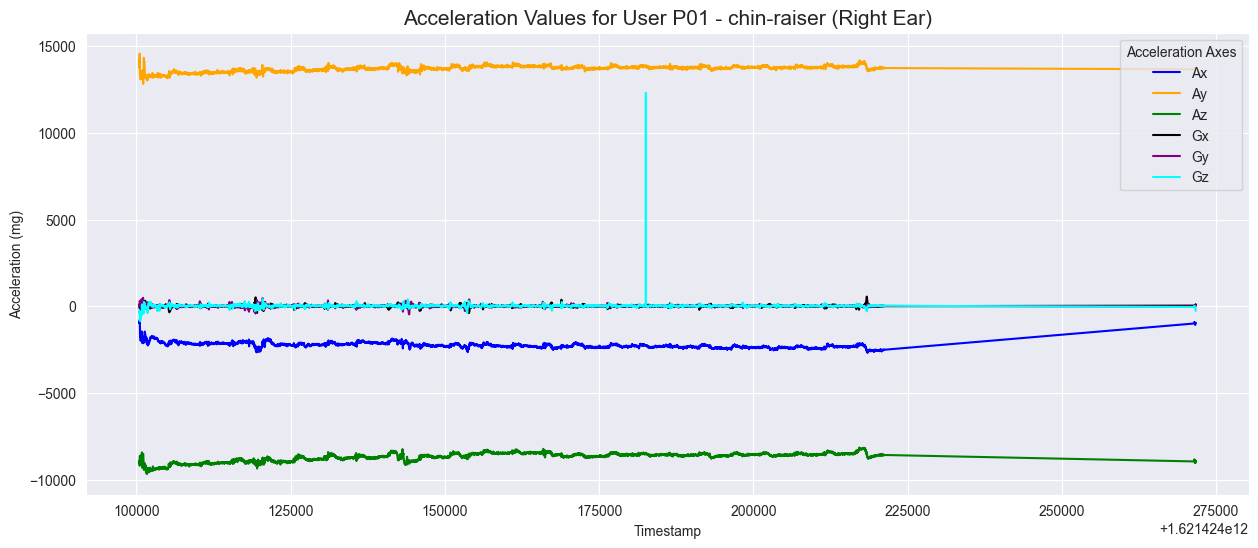

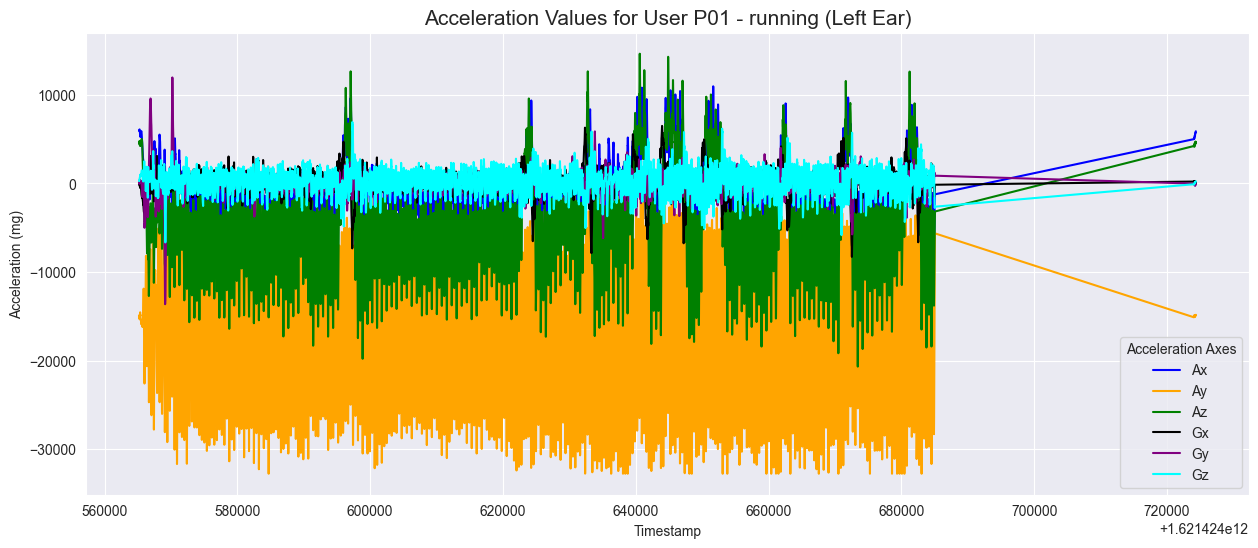

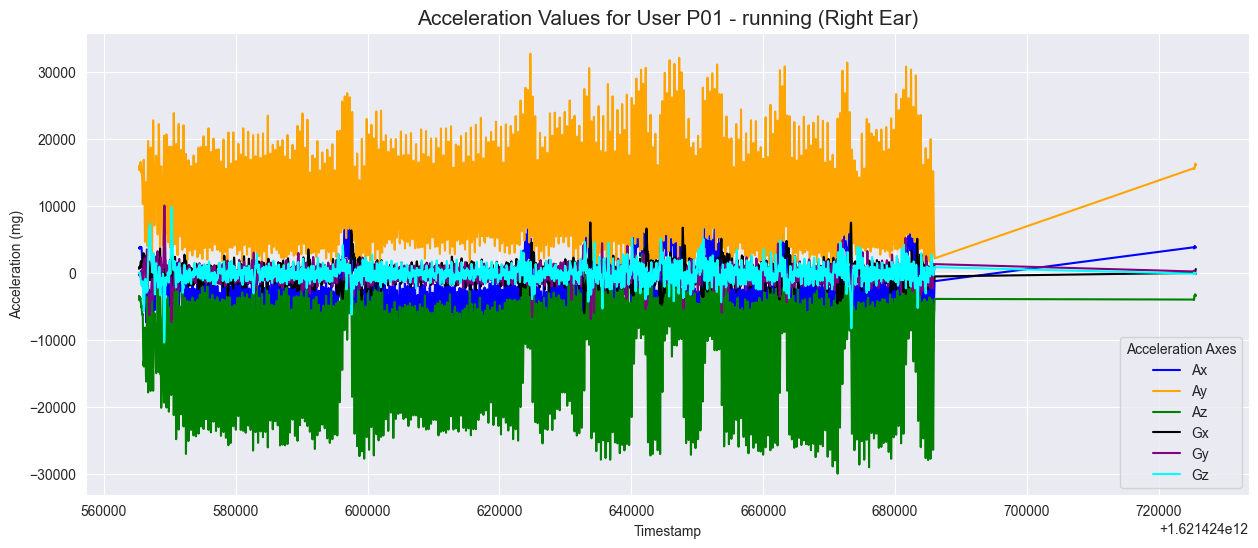

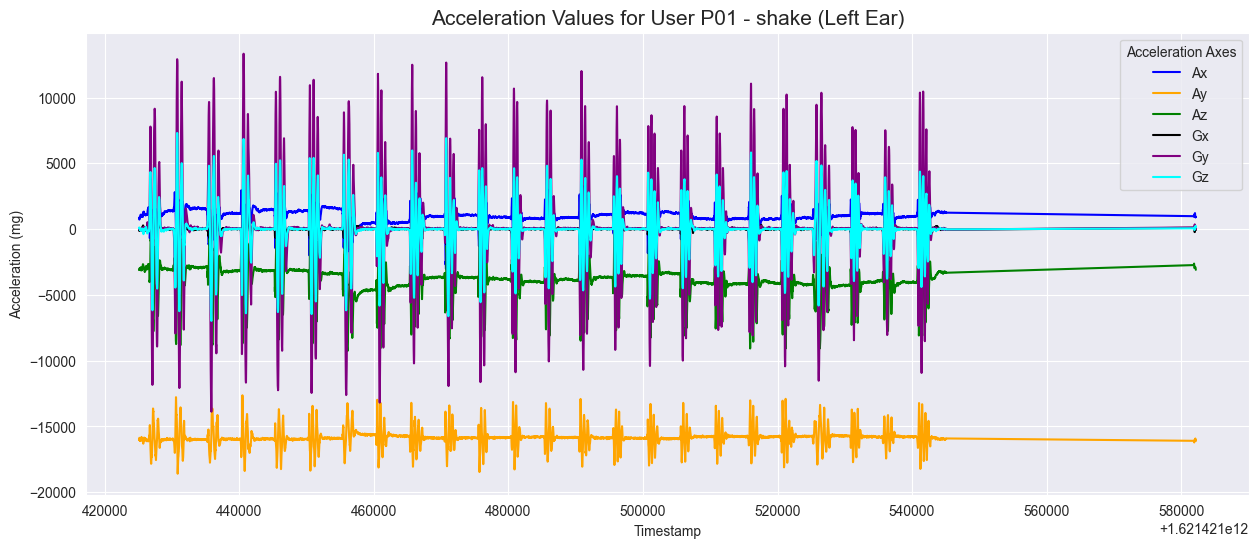

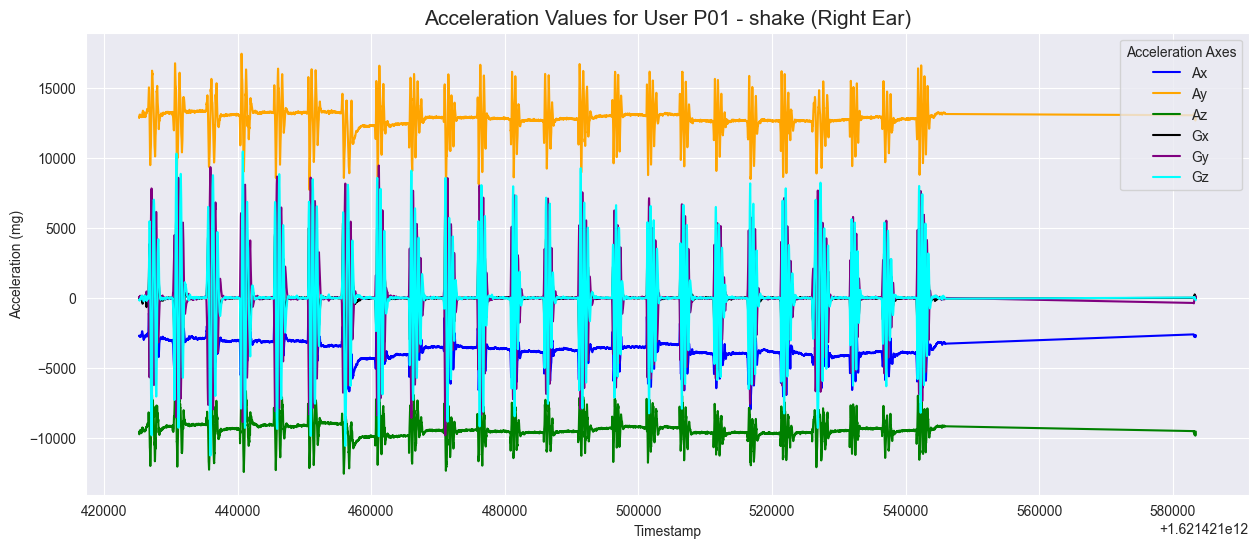

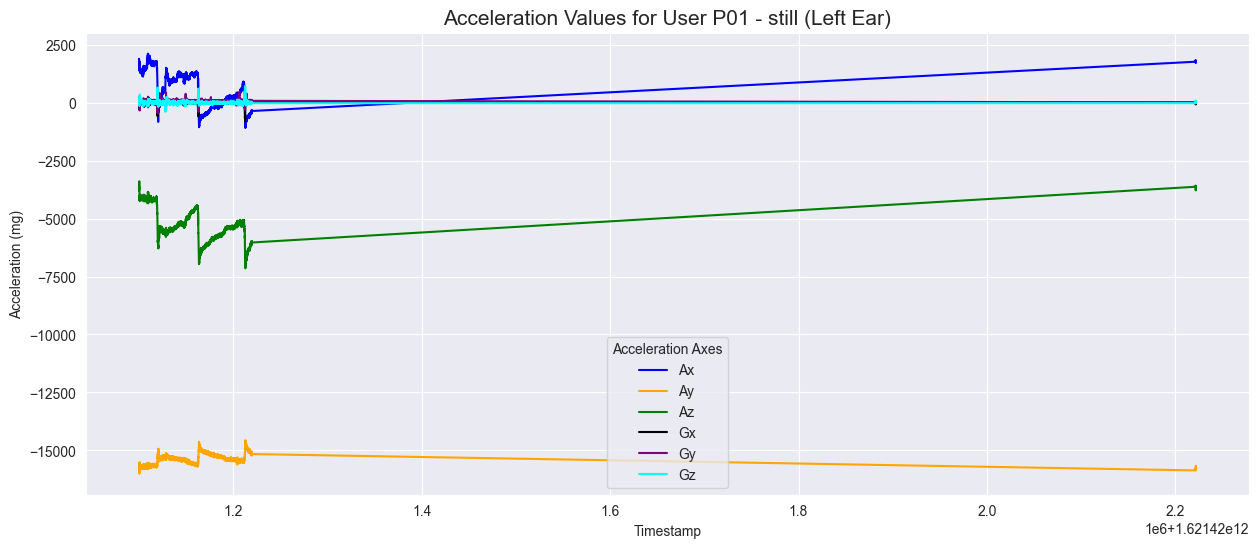

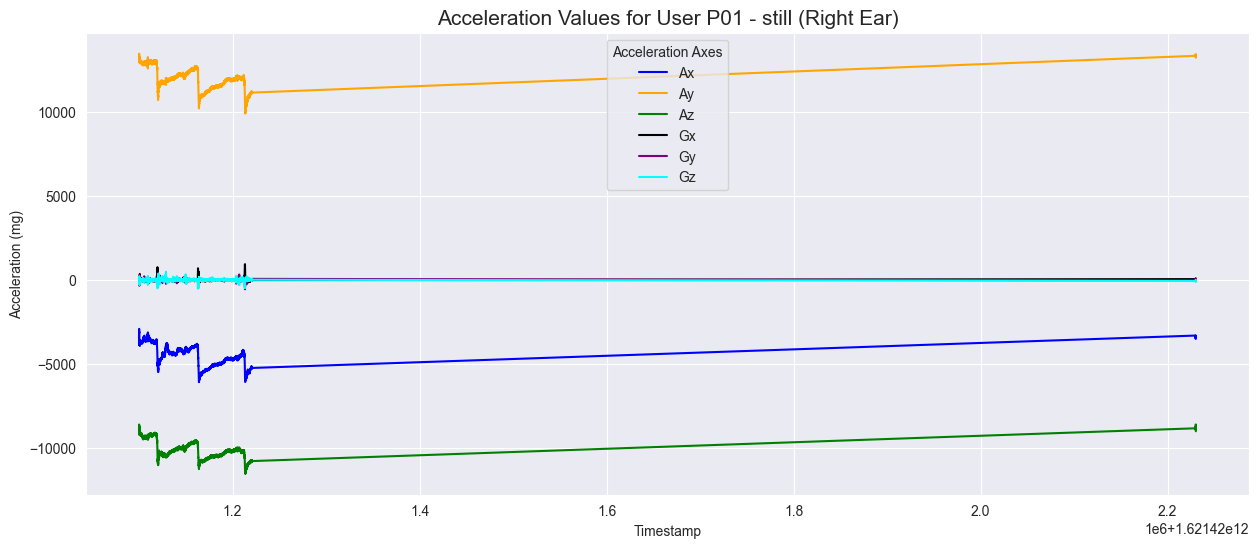

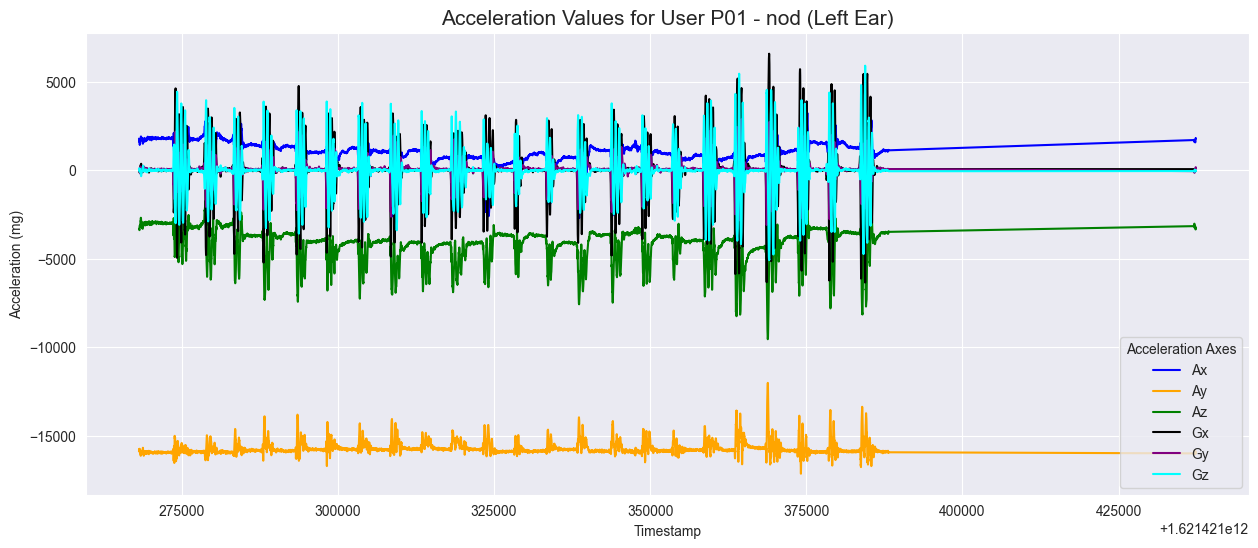

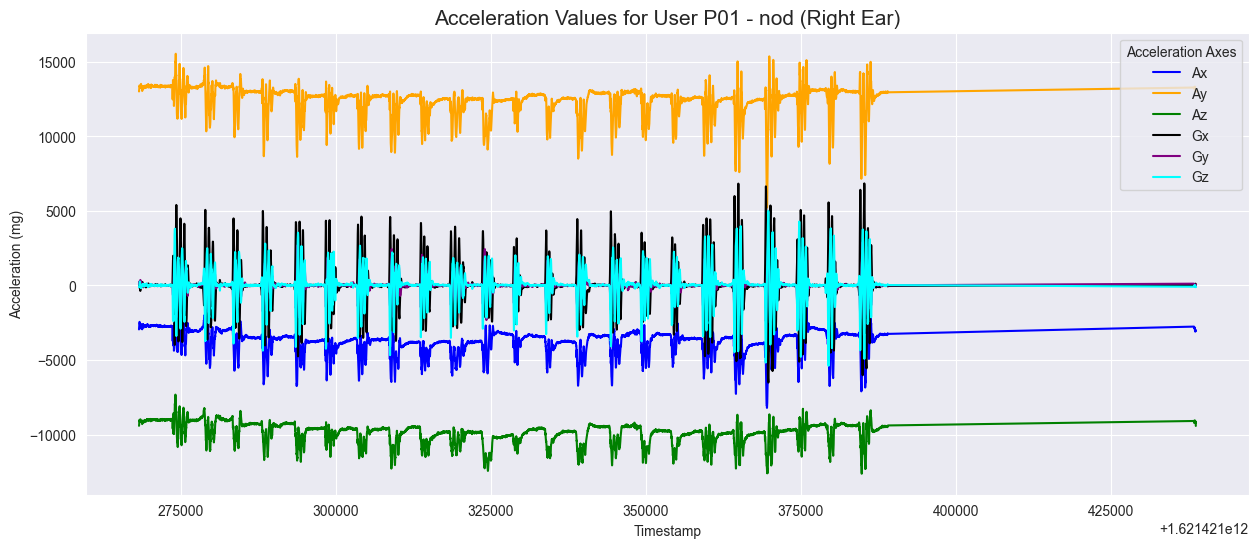

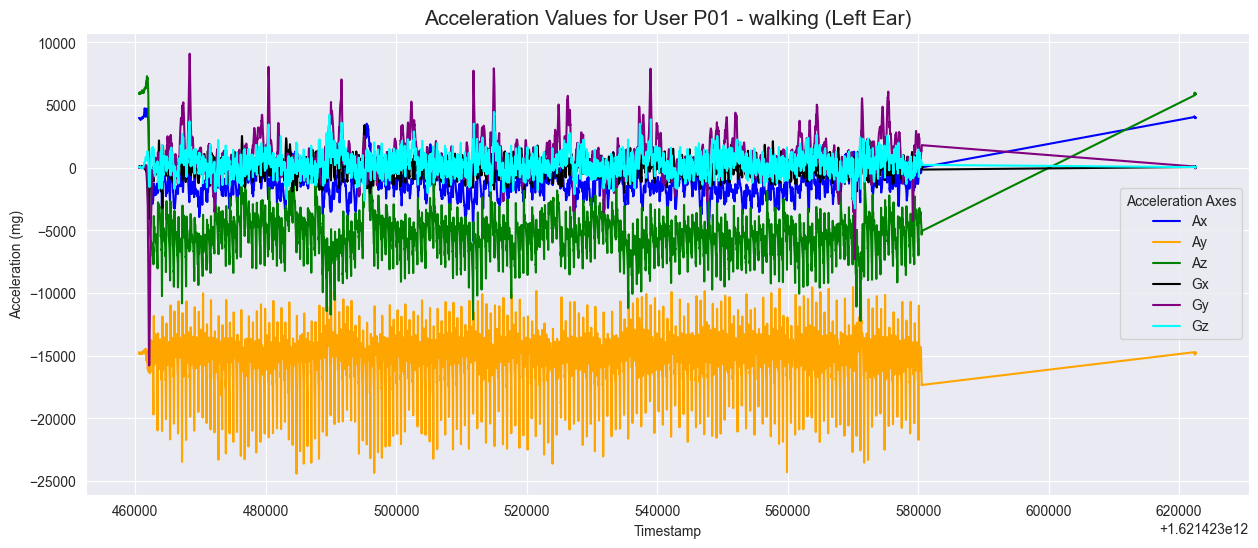

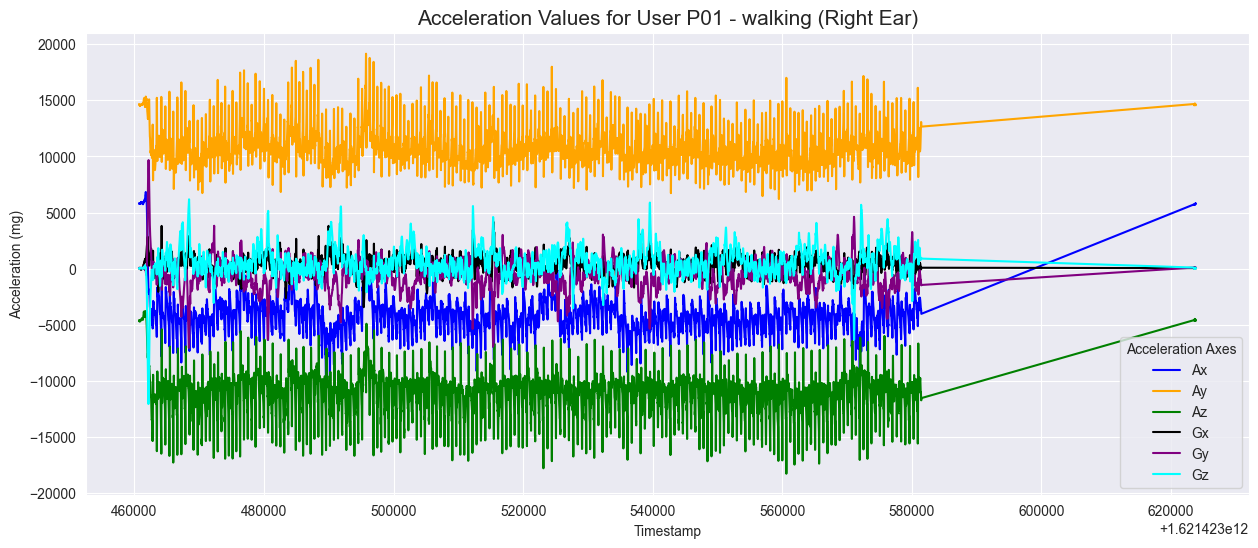

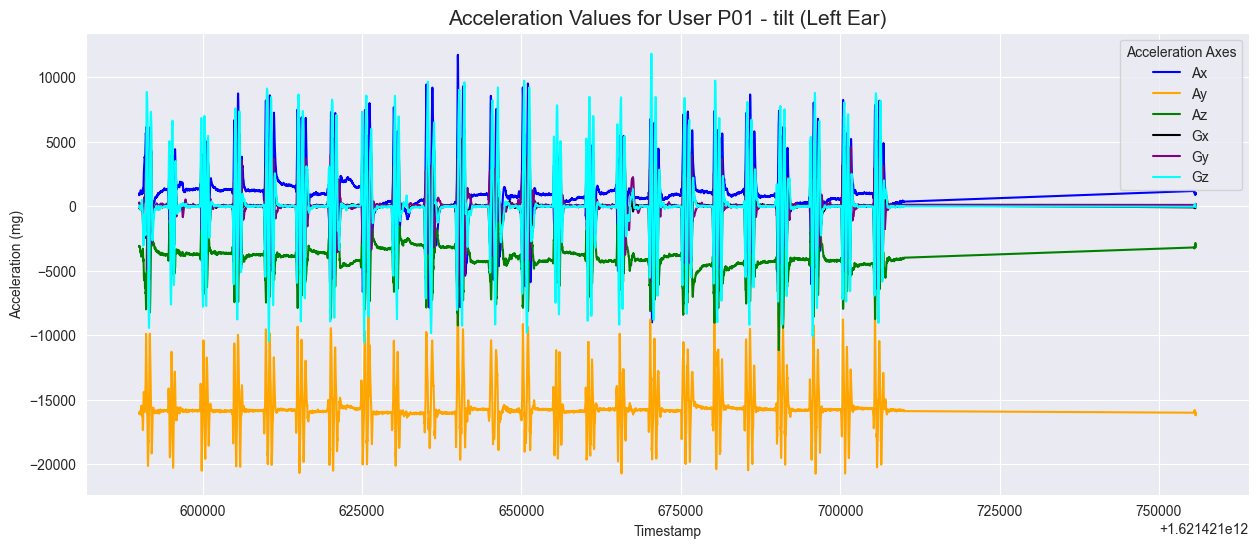

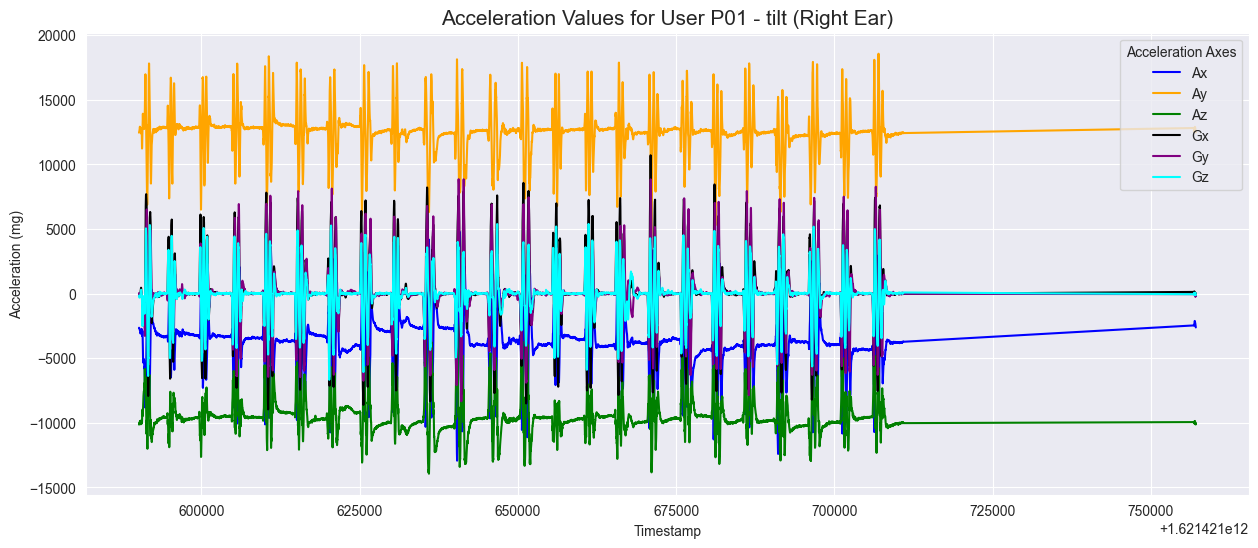

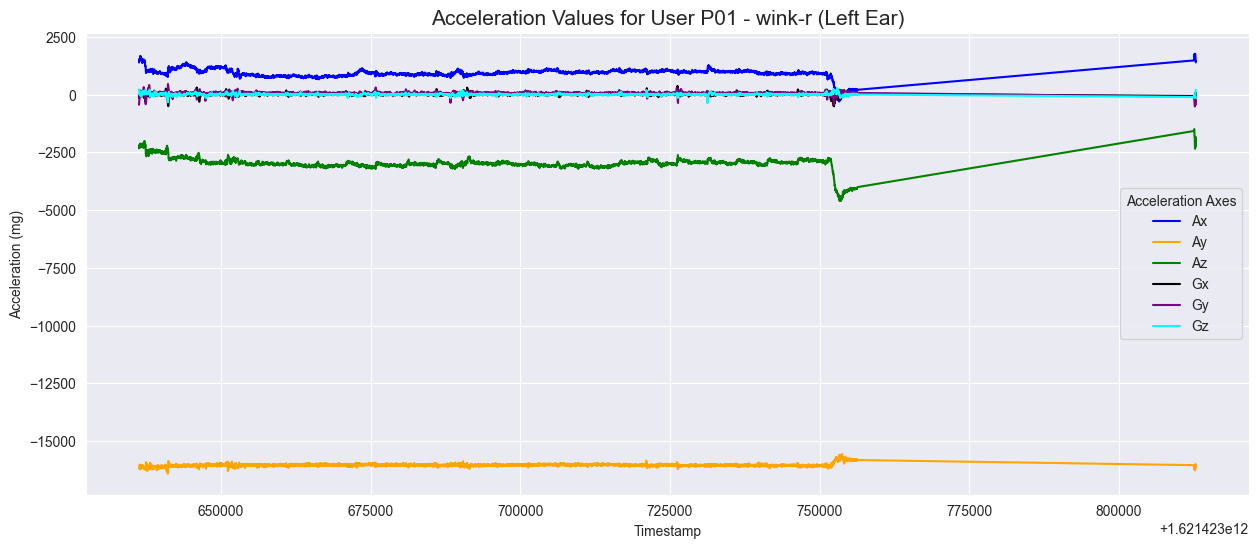

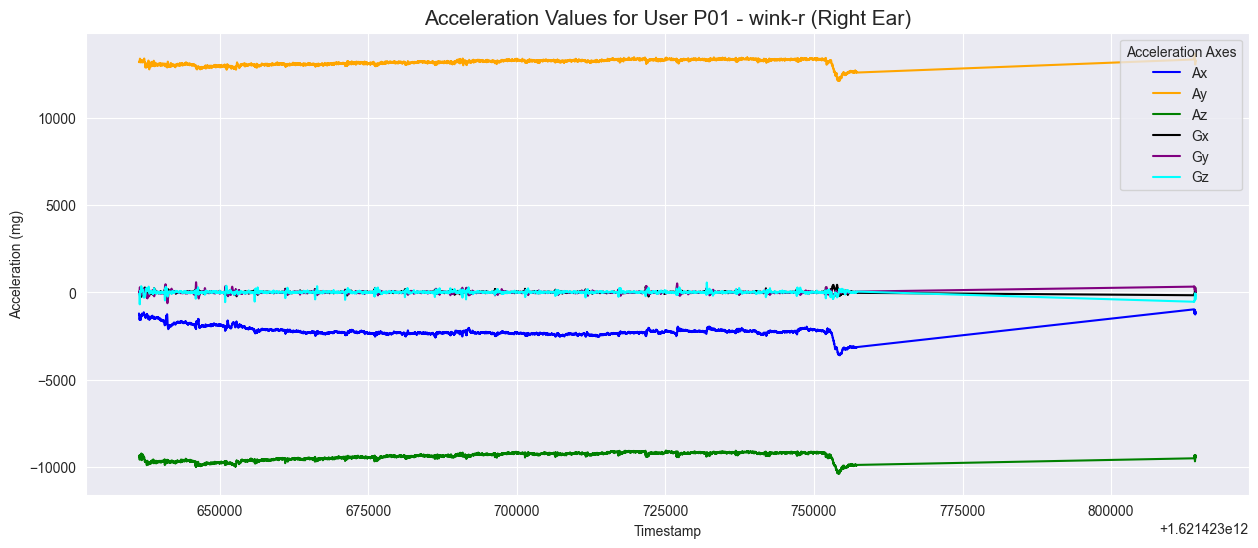

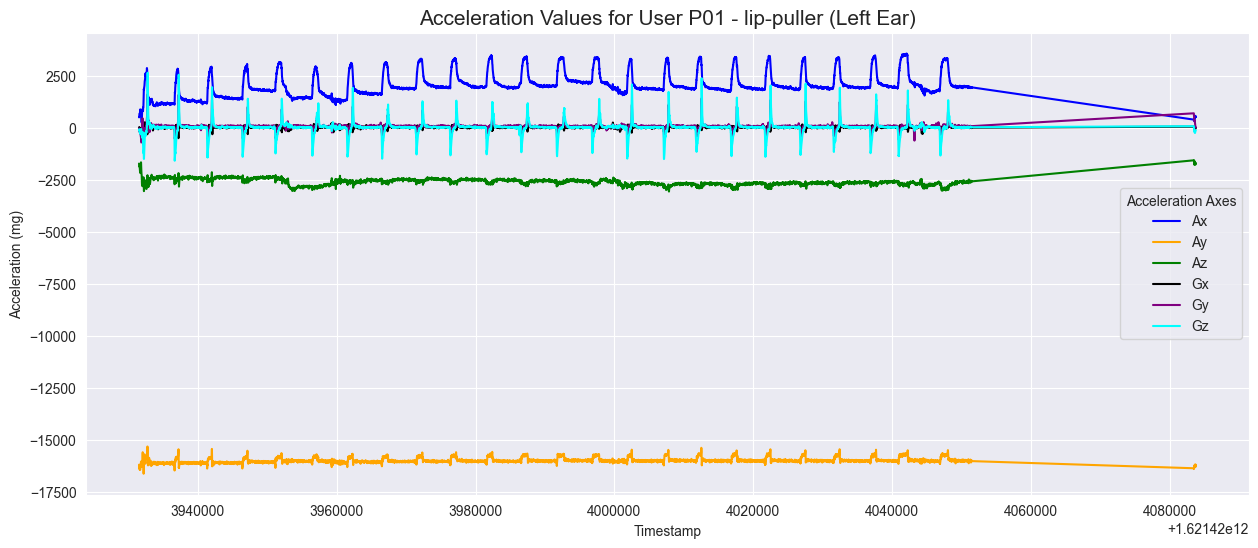

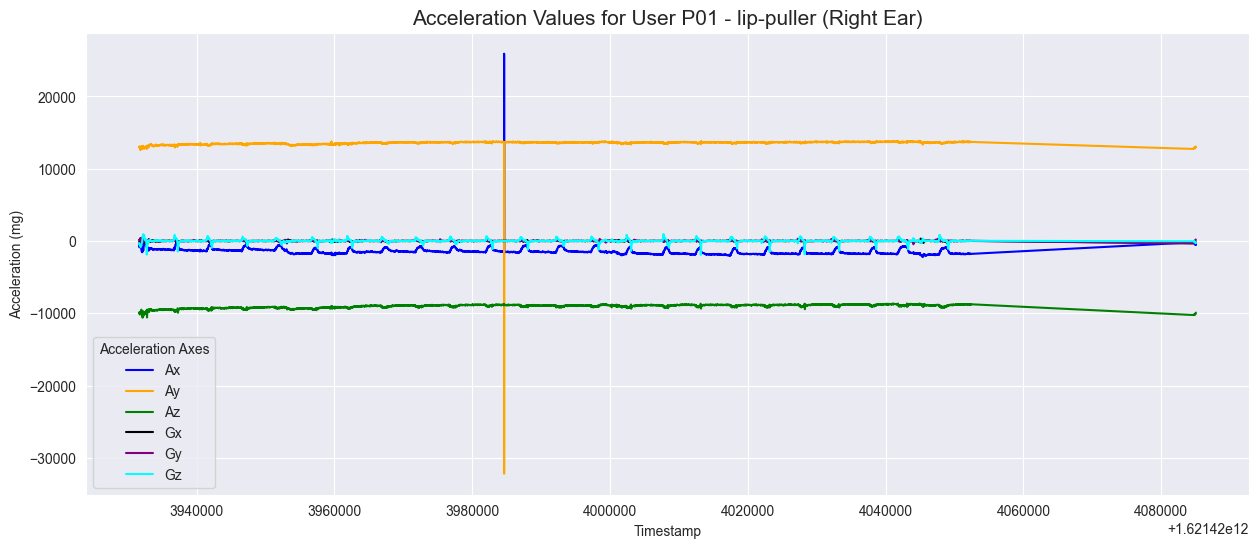

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of activities to plot
activities = ['brow-lowerer', 'brow-raiser', 'chewing', 'chin-raiser', 'running','shake','still','nod','walking','tilt','wink-r','lip-puller']

# Filter and plot data for user 36 across different activities
for activity in activities:
    for side in ['left', 'right']:
        # Filter data for user P36, specific activity, and IMU_Side
        data_01 = final_data[(final_data['Person'] == 'P0') & (final_data['Activity'] == activity) & (final_data['IMU_Side'] == side)]
        data_01 = final_data[(final_data['Person'] == 'P1') & (final_data['Activity'] == activity) & (final_data['IMU_Side'] == side)]
        # Check unique values in the relevant columns
        


        # Create a figure for the line plots
        plt.figure(figsize=(15, 6))
        
        # Plotting ax, ay, and az signals
        sns.lineplot(y='ax', x='timestamp', data=data_01, label='Ax', color='blue')
        sns.lineplot(y='ay', x='timestamp', data=data_01, label='Ay', color='orange')
        sns.lineplot(y='az', x='timestamp', data=data_01, label='Az', color='green')
        sns.lineplot(y='gx', x='timestamp', data=data_01, label='Gx', color='black')
        sns.lineplot(y='gy', x='timestamp', data=data_01, label='Gy', color='purple')
        sns.lineplot(y='gz', x='timestamp', data=data_01, label='Gz', color='cyan')
        
        # Setting up the legend and labels
        plt.legend(title='Acceleration Axes')
        plt.ylabel('Acceleration (mg)')
        plt.title(f'Acceleration Values for User P01 - {activity} ({side.capitalize()} Ear)', fontsize=15)
        plt.xlabel('Timestamp')
        
        # Show the plot
        plt.show()


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define window size and overlap
window_size = 8
step_size = window_size // 2

# Function to apply windowing and extract sequences
# Returns sequences and corresponding labels
def window_and_extract_sequences(data, window_size, step_size):
    sequences = []
    labels = []
    for i in range(0, len(data) - window_size, step_size):
        window = data.iloc[i:i + window_size]
        sequence = window[['ax', 'ay', 'az', 'gx', 'gy', 'gz']].values  # Use only sensor data
        label = window['Activity_Label'].mode()[0]  # Most frequent label in the window
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# # Split data into training and test sets
# df_train = final_data[final_data['Person_Num'].isin([0, 1, 10, 11, 12, 13, 14, 15])]
# df_test = final_data[final_data['Person_Num'].isin([16, 17, 18, 19])]


# Split data into training (80%) and testing (20%) sets
df_train, df_test = train_test_split(final_data, test_size=0.2, random_state=42)

print(f"Training set size: {len(df_train)}")
print(f"Testing set size: {len(df_test)}")


# Apply windowing on training data
X_train, y_train = window_and_extract_sequences(df_train, window_size, step_size)

# Apply windowing on test data
X_test, y_test = window_and_extract_sequences(df_test, window_size, step_size)

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Normalize sensor data
scaler = StandardScaler()
num_features = X_train.shape[2]
X_train = X_train.reshape(-1, num_features)
X_test = X_test.reshape(-1, num_features)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(-1, window_size, num_features)
X_test = X_test.reshape(-1, window_size, num_features)

# Build LSTM model
model = Sequential([
    LSTM(64, input_shape=(window_size, num_features), return_sequences=True, activation='relu'),
    Dropout(0.1),
    LSTM(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train_onehot.shape[1], activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

# Evaluate model
y_pred_onehot = model.predict(X_test)
y_pred = np.argmax(y_pred_onehot, axis=1)

# Decode predicted and true labels
y_pred_labels = label_encoder.inverse_transform(y_pred)
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test_onehot, axis=1))

# Print Accuracy and Classification Report
print(f"Accuracy: {accuracy_score(y_test_labels, y_pred_labels)}")
print("\n-----Classification Report-----")
print(classification_report(y_test_labels, y_pred_labels))

# Confusion Matrix
labels = label_encoder.classes_
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Training set size: 4398518
Testing set size: 1099630


C:\Users\Shruti\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
13746/13746 ━━━━━━━━━━━━━━━━━━━━ 160s 11ms/step - accuracy: 0.1224 - loss: 2.7618 - val_accuracy: 0.1429 - val_loss: 2.6908
Epoch 2/20
13746/13746 ━━━━━━━━━━━━━━━━━━━━ 154s 11ms/step - accuracy: 0.1468 - loss: 2.6860 - val_accuracy: 0.1513 - val_loss: 2.6671
Epoch 3/20
13746/13746 ━━━━━━━━━━━━━━━━━━━━ 157s 11ms/step - accuracy: 0.1538 - loss: 2.6586 - val_accuracy: 0.1600 - val_loss: 2.6363
Epoch 4/20
13746/13746 ━━━━━━━━━━━━━━━━━━━━ 157s 11ms/step - accuracy: 0.1611 - loss: 2.6402 - val_accuracy: 0.1623 - val_loss: 2.6253
Epoch 5/20
13746/13746 ━━━━━━━━━━━━━━━━━━━━ 157s 11ms/step - accuracy: 0.1656 - loss: 2.6236 - val_accuracy: 0.1690 - val_loss: 2.6074
Epoch 6/20
13746/13746 ━━━━━━━━━━━━━━━━━━━━ 156s 11ms/step - accuracy: 0.1701 - loss: 2.6116 - val_accuracy: 0.1714 - val_loss: 2.6006
Epoch 7/20
13746/13746 ━━━━━━━━━━━━━━━━━━━━ 157s 11ms/step - accuracy: 0.1729 - loss: 2.6003 - val_accuracy: 0.1737 - val_loss: 2.5909
Epoch 8/20
13746/13746 ━━━━━━━━━━━━━━━━━━━━ 126s 9ms/st

KeyboardInterrupt: 

In [ ]:
import winsound

# After your long-running code
# Beep after execution
winsound.Beep(1000, 500)  # Frequency (Hz), Duration (ms)


In [41]:
# df_train=final_data[final_data['Person_Num']<22]
# df_test=final_data[final_data['Person_Num']>=22]
# print("Train Data Shape:", df_train.shape)
# print("Test Data Shape:", df_test.shape)
df_train = final_data[final_data['Person_Num'].isin([0, 1, 10, 11, 12, 13, 14, 15])]
df_test = final_data[final_data['Person_Num'].isin([16, 17, 18, 19])]

print("Train Data Shape:", df_train.shape)
print("Test Data Shape:", df_test.shape)


Train Data Shape: (3623020, 14)
Test Data Shape: (1875128, 14)


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train.loc[:, ['ax', 'ay', 'az', 'gx', 'gy', 'gz']] = scaler.fit_transform(df_train[['ax', 'ay', 'az', 'gx', 'gy', 'gz']])


In [44]:
print(df_train)

             timestamp        ax        ay        az        gx        gy  \
0        1621355241901  1.386555 -1.202971  0.492446  0.146263  0.001539   
1        1621355241911  1.385649 -1.204219  0.494120  0.153534 -0.009862   
2        1621355241920  1.388064 -1.204998  0.495013  0.158381 -0.018632   
3        1621355241930  1.385649 -1.205232  0.494678  0.162016 -0.035295   
4        1621355241940  1.384442 -1.204920  0.495459  0.169287 -0.055466   
...                ...       ...       ...       ...       ...       ...   
7244754  1622624146654 -3.942021  1.124639 -2.634433 -0.595372  1.073217   
7244755  1622624146663 -3.502274  1.030904 -2.423809  0.163228  1.005689   
7244756  1622624146673 -3.019669  0.932023 -2.186731  0.856390  0.896942   
7244757  1622624146682 -2.493904  0.827371 -1.941506  1.390803  0.782057   
7244758  1622624146692 -1.939165  0.717884 -1.684560  1.795551  0.718037   

               gz Person Activity IMU_Side     Start_Time       End_Time  \
0       -0.

In [16]:
import numpy as np
import pandas as pd

window_size = 8  # Set your window size (number of rows per window)
step_size = 4     # Set your step size (how many rows to skip between windows)

# Initialize lists to hold the windows
ax_list = []
ay_list = []
az_list = []
gx_list = []  # Additional dimension 1
gy_list = []  # Additional dimension 2
gz_list = []  # Additional dimension 3
labels = []

# Loop through the DataFrame
for i in range(0, df_train.shape[0] - window_size + 1, step_size):
    xs = df_train['ax'].values[i: i + window_size]  # First acceleration dimension
    ys = df_train['ay'].values[i: i + window_size]  # Second acceleration dimension
    zs = df_train['az'].values[i: i + window_size]  # Third acceleration dimension
    us = df_train['gx'].values[i: i + window_size]  # Fourth acceleration dimension
    vs = df_train['gy'].values[i: i + window_size]  # Fifth acceleration dimension
    ws = df_train['gz'].values[i: i + window_size]  # Sixth acceleration dimension

    # Get the labels for the current window and find the mode
    activities = df_train['Activity_Label'].values[i: i + window_size]
    
    # Compute mode of activity labels
    mode_label = pd.Series(activities).mode()[0]

    # Append the extracted data to the lists
    ax_list.append(xs)
    ay_list.append(ys)
    az_list.append(zs)
    gx_list.append(us)
    gy_list.append(vs)
    gz_list.append(ws)
    labels.append(mode_label)

# Convert lists to numpy arrays
AX = np.array(ax_list)
AY = np.array(ay_list)
AZ = np.array(az_list)
GX = np.array(gx_list)  # Additional dimension 1
GY = np.array(gy_list)  # Additional dimension 2
GZ = np.array(gz_list)  # Additional dimension 3
labels = np.array(labels)

# Display the results
print("X (ax values):\n", AX)
print("Y (ay values):\n", AY)
print("Z (az values):\n", AZ)
print("U (gx values):\n", GX)
print("V (gy values):\n", GY)
print("W (gz values):\n", GZ)
print("Labels (Most Common Activity):\n", labels)


X (ax values):
 [[ 5.0000e+01  4.7000e+01  5.5000e+01 ...  2.6000e+01  4.0000e+00
  -1.0000e+00]
 [ 4.3000e+01  2.6000e+01  4.0000e+00 ... -2.6000e+01 -3.0000e+01
  -4.3000e+01]
 [-2.3000e+01 -2.6000e+01 -3.0000e+01 ... -1.8030e+03 -3.0000e+01
  -1.7990e+03]
 ...
 [-1.9086e+04 -2.0612e+04 -2.1363e+04 ... -2.1466e+04 -2.1344e+04
  -2.1008e+04]
 [-2.1250e+04 -2.1466e+04 -2.1344e+04 ... -1.9928e+04 -1.8900e+04
  -1.7605e+04]
 [-2.0642e+04 -1.9928e+04 -1.8900e+04 ... -1.4549e+04 -1.2807e+04
  -1.0969e+04]]
Y (ay values):
 [[-15918. -15934. -15944. ... -15951. -15914. -15933.]
 [-15943. -15951. -15914. ... -15920. -15936. -15927.]
 [-15941. -15920. -15936. ...  14696. -15928.  14708.]
 ...
 [ 13281.  14722.  16207. ...  18812.  18869.  18333.]
 [ 18286.  18812.  18869. ...  16210.  15077.  13930.]
 [ 17378.  16210.  15077. ...  11460.  10118.   8714.]]
Z (az values):
 [[  3820.   3835.   3843. ...   3845.   3814.   3820.]
 [  3847.   3845.   3814. ...   3811.   3792.   3771.]
 [  3830.   38

In [ ]:
# window_size = 4  # Set your window size (number of rows per window)
# step_size = 2    # Set your step size (how many rows to skip between windows)
# batch_size = 1000  # Set batch size

# # Initialize final lists to hold all data from all batches
# final_ax_list = []
# final_ay_list = []
# final_az_list = []
# final_gx_list = []
# final_gy_list = []
# final_gz_list = []
# final_labels = []

# # Function to process batches
# def process_batch(batch_df):
#     ax_list, ay_list, az_list, gx_list, gy_list, gz_list, labels = [], [], [], [], [], [], []
    
#     # Loop through the batch DataFrame
#     for i in range(0, batch_df.shape[0] - window_size + 1, step_size):
#         xs = batch_df['ax'].values[i: i + window_size]
#         ys = batch_df['ay'].values[i: i + window_size]
#         zs = batch_df['az'].values[i: i + window_size]
#         us = batch_df['gx'].values[i: i + window_size]
#         vs = batch_df['gy'].values[i: i + window_size]
#         ws = batch_df['gz'].values[i: i + window_size]
        
        # Get the labels for the current window and find the mode
#         activities = batch_df['Activity_Label'].values[i: i + window_size]
#         mode_label = pd.Series(activities).mode()[0]
        
#         # Append the extracted data to the lists
#         ax_list.append(xs)
#         ay_list.append(ys)
#         az_list.append(zs)
#         gx_list.append(us)
#         gy_list.append(vs)
#         gz_list.append(ws)
#         labels.append(mode_label)
    
#     return ax_list, ay_list, az_list, gx_list, gy_list, gz_list, labels

# # Process the DataFrame in batches
# for start in range(0, df_train.shape[0], batch_size):
#     end = min(start + batch_size, df_train.shape[0])
#     batch_df = df_train.iloc[start:end]
    
#     # Process current batch
#     ax_list, ay_list, az_list, gx_list, gy_list, gz_list, labels = process_batch(batch_df)
    
#     # Accumulate results from this batch
#     final_ax_list.extend(ax_list)
#     final_ay_list.extend(ay_list)
#     final_az_list.extend(az_list)
#     final_gx_list.extend(gx_list)
#     final_gy_list.extend(gy_list)
#     final_gz_list.extend(gz_list)
#     final_labels.extend(labels)

# # Convert the final lists to numpy arrays
# AX = np.array(final_ax_list)
# AY = np.array(final_ay_list)
# AZ = np.array(final_az_list)
# GX = np.array(final_gx_list)
# GY = np.array(final_gy_list)
# GZ = np.array(final_gz_list)
# labels = np.array(final_labels)

In [18]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks

In [19]:
X_train = pd.DataFrame()

# Function to extract statistical features
def extract_features(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'aad': np.mean(np.abs(data - np.mean(data))),
        'min': np.min(data),
        'max': np.max(data),
        'median': np.median(data),
        'mad': np.median(np.abs(data - np.median(data))),
        'IQR': np.percentile(data, 75) - np.percentile(data, 25),
        'neg_count': np.sum(data < 0),
        'pos_count': np.sum(data > 0),
        'energy': np.sum(data ** 2) / len(data),
        'peak_count': len(find_peaks(data)[0]),
        'skewness': stats.skew(data),
        'kurtosis': stats.kurtosis(data),
        'sma': np.sum(np.abs(data)) / len(data)
    }

# Extracting features for each axis
for axis, label in zip([AX, AY, AZ, GX, GY, GZ], ['ax', 'ay', 'az', 'gx', 'gy', 'gz']):
    features = pd.DataFrame([extract_features(a) for a in axis])
    for feature_name in features.columns:
        X_train[f'{label}_{feature_name}'] = features[feature_name]

# Add labels to X_train DataFrame
X_train['Activity_Label'] = labels

# Display the feature DataFrame
print(X_train.head())

   ax_mean      ax_std     ax_aad  ax_min  ax_max  ax_median  ax_mad   ax_IQR  \
0   33.875   20.325092   18.15625    -1.0    55.0       45.0     7.5    27.25   
1   -6.250   27.801754   24.25000   -43.0    43.0      -12.0    17.0    36.50   
2 -471.250  767.765223  664.87500 -1803.0   -16.0      -30.0    10.0   456.75   
3 -915.625  887.142173  887.12500 -1806.0   -16.0     -916.5   886.5  1770.00   
4 -921.750  892.544642  892.50000 -1833.0   -24.0     -918.5   890.5  1776.50   

   ax_neg_count  ax_pos_count  ...  gz_mad  gz_IQR  gz_neg_count  \
0             1             7  ...     4.0    5.25             6   
1             5             3  ...    19.0   34.50             2   
2             8             0  ...    10.5   16.50             1   
3             8             0  ...    12.0   23.25             2   
4             8             0  ...    27.0   54.75             3   

   gz_pos_count  gz_energy  gz_peak_count  gz_skewness  gz_kurtosis  gz_sma  \
0             2     58.50

In [20]:
print(X_train.shape)

(905754, 91)


In [21]:
print(X_train["Activity_Label"].unique())

[13  9 11 15  6  5  2  1 18 17  7  4  8 12 14 16 10  3]


In [22]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks

In [23]:
import numpy as np
import pandas as pd

# Convert signals from time domain to frequency domain using FFT
AX_fft = np.abs(np.fft.fft(AX, axis=1))[:, 1:51]  # Discard the first value (DC component)
AY_fft = np.abs(np.fft.fft(AY, axis=1))[:, 1:51]
AZ_fft = np.abs(np.fft.fft(AZ, axis=1))[:, 1:51]
GX_fft = np.abs(np.fft.fft(GX, axis=1))[:, 1:51]
GY_fft = np.abs(np.fft.fft(GY, axis=1))[:, 1:51]
GZ_fft = np.abs(np.fft.fft(GZ, axis=1))[:, 1:51]

In [24]:
from scipy import stats
from scipy.signal import find_peaks

# Function to extract statistical features from frequency domain
def extract_frequency_features(data):
    return {
        'mean_fft': np.mean(data),
        'std_fft': np.std(data),
        'aad_fft': np.mean(np.abs(data - np.mean(data))),
        'min_fft': np.min(data),
        'max_fft': np.max(data),
        'median_fft': np.median(data),
        'mad_fft': np.median(np.abs(data - np.median(data))),
        'IQR_fft': np.percentile(data, 75) - np.percentile(data, 25),
        'peak_count_fft': len(find_peaks(data)[0]),
        'skewness_fft': stats.skew(data),
        'kurtosis_fft': stats.kurtosis(data),
        'energy_fft': np.sum(data ** 2) / len(data),
        'sma_fft': np.sum(np.abs(data)) / len(data)
    }

# Initialize an empty DataFrame for frequency features
X_train_fft = pd.DataFrame()

# Extracting features for each axis in frequency domain
for axis, label in zip([AX_fft, AY_fft, AZ_fft, GX_fft, GY_fft, GZ_fft], ['ax', 'ay', 'az', 'gx', 'gy', 'gz']):
    features = pd.DataFrame([extract_frequency_features(a) for a in axis])
    for feature_name in features.columns:
        X_train_fft[f'{label}_{feature_name}'] = features[feature_name]

# Add labels to the frequency feature DataFrame
X_train_fft['Activity_Label'] = labels

# Display the feature DataFrame for frequency domain
print(X_train_fft.head())


   ax_mean_fft   ax_std_fft   ax_aad_fft  ax_min_fft   ax_max_fft  \
0    53.320619    30.559966    26.971247   26.185279   100.520302   
1    78.333493    30.507721    26.226839   38.000000   124.230461   
2  1944.920734  1267.542243  1097.270032   24.698178  3572.000000   
3  1028.951233  2477.273113  1733.728219   14.035669  7097.000000   
4  1044.385781  2488.531075  1741.604063   21.023796  7140.000000   

   ax_median_fft  ax_mad_fft   ax_IQR_fft  ax_peak_count_fft  ax_skewness_fft  \
0      43.416587   17.231308    42.375805                  1         0.800917   
1      67.281442    3.626121    32.100630                  2         0.597345   
2    2498.220589    0.083214  1236.844419                  1        -0.643641   
3      15.824256    1.788587     8.039429                  1         2.041233   
4      27.744244    6.720448    12.198174                  1         2.041217   

   ...  gz_max_fft  gz_median_fft  gz_mad_fft  gz_IQR_fft  gz_peak_count_fft  \
0  ...   33.338825

In [25]:
print(X_train_fft.shape)

(905754, 79)


In [26]:
import numpy as np
import pandas as pd

window_size = 8  # Set your window size (number of rows per window)
step_size = 4     # Set your step size (how many rows to skip between windows)

# Initialize lists to hold the windows
ax_list = []
ay_list = []
az_list = []
gx_list = []  # Additional dimension 1
gy_list = []  # Additional dimension 2
gz_list = []  # Additional dimension 3
labels = []

# Loop through the DataFrame
for i in range(0, df_test.shape[0] - window_size + 1, step_size):
    xs = df_test['ax'].values[i: i + window_size]  # First acceleration dimension
    ys = df_test['ay'].values[i: i + window_size]  # Second acceleration dimension
    zs = df_test['az'].values[i: i + window_size]  # Third acceleration dimension
    us = df_test['gx'].values[i: i + window_size]  # Fourth acceleration dimension
    vs = df_test['gy'].values[i: i + window_size]  # Fifth acceleration dimension
    ws = df_test['gz'].values[i: i + window_size]  # Sixth acceleration dimension

    # Get the labels for the current window and find the mode (if labels are available)
    activities = df_test['Activity_Label'].values[i: i + window_size]
    mode_label = pd.Series(activities).mode()[0]

    # Append the extracted data to the lists
    ax_list.append(xs)
    ay_list.append(ys)
    az_list.append(zs)
    gx_list.append(us)
    gy_list.append(vs)
    gz_list.append(ws)
    labels.append(mode_label)

# Convert lists to numpy arrays
AX_test = np.array(ax_list)
AY_test = np.array(ay_list)
AZ_test = np.array(az_list)
GX_test = np.array(gx_list)  # Additional dimension 1
GY_test = np.array(gy_list)  # Additional dimension 2
GZ_test = np.array(gz_list)  # Additional dimension 3
labels_test = np.array(labels)

# Display the results
print("X (ax values):\n", AX_test)
print("Y (ay values):\n", AY_test)
print("Z (az values):\n", AZ_test)
print("U (gx values):\n", GX_test)
print("V (gy values):\n", GY_test)
print("W (gz values):\n", GZ_test)
print("Labels (Most Common Activity):\n", labels_test)


X (ax values):
 [[ -6924.  -6952.  -5620. ...  -6999.  -5629.  -7022.]
 [ -5620.  -6999.  -5629. ...  -7041.  -5618.  -7021.]
 [ -5601.  -7041.  -5618. ...  -7004.  -5615.  -7003.]
 ...
 [-17083. -17269. -16479. ... -19020. -25130. -27957.]
 [-14056. -19020. -25130. ... -25683. -23464. -20955.]
 [-27928. -25683. -23464. ... -17060. -15678. -14034.]]
Y (ay values):
 [[-8332. -8388. 15414. ... -8501. 15418. -8529.]
 [15412. -8501. 15418. ... -8520. 15450. -8522.]
 [15433. -8520. 15450. ... -8531. 15460. -8517.]
 ...
 [ 3900.  4684.  6025. ... 10109. 11160. 12540.]
 [ 8791. 10109. 11160. ... 12400. 11588. 10553.]
 [12617. 12400. 11588. ...  8204.  6586.  5498.]]
Z (az values):
 [[ 12261.  12213.  -1203. ...  12197.  -1214.  12215.]
 [ -1204.  12197.  -1214. ...  12233.  -1159.  12248.]
 [ -1196.  12233.  -1159. ...  12255.  -1159.  12244.]
 ...
 [-17444. -13395. -10926. ... -14553. -22020. -26005.]
 [ -9419. -14553. -22020. ... -22250. -19566. -16821.]
 [-25171. -22250. -19566. ... -15054

In [27]:
X_test = pd.DataFrame()

# Function to extract statistical features (no changes needed here)
def extract_features(data):
    return {
        'mean': np.mean(data),
        'std': np.std(data),
        'aad': np.mean(np.abs(data - np.mean(data))),
        'min': np.min(data),
        'max': np.max(data),
        'median': np.median(data),
        'mad': np.median(np.abs(data - np.median(data))),
        'IQR': np.percentile(data, 75) - np.percentile(data, 25),
        'neg_count': np.sum(data < 0),
        'pos_count': np.sum(data > 0),
        'energy': np.sum(data ** 2) / len(data),
        'peak_count': len(find_peaks(data)[0]),
        'skewness': stats.skew(data),
        'kurtosis': stats.kurtosis(data),
        'sma': np.sum(np.abs(data)) / len(data)
    }

# Extracting features for each axis in df_test
for axis, label in zip([AX_test, AY_test, AZ_test, GX_test, GY_test, GZ_test], ['ax', 'ay', 'az', 'gx', 'gy', 'gz']):
    features = pd.DataFrame([extract_features(a) for a in axis])
    for feature_name in features.columns:
        X_test[f'{label}_{feature_name}'] = features[feature_name]

# Add labels to X_test DataFrame
X_test['Activity_Label'] = labels_test

# Display the feature DataFrame for df_test
print(X_test.head())


    ax_mean      ax_std     ax_aad  ax_min  ax_max  ax_median  ax_mad  \
0 -6469.875  656.581571  635.15625 -7022.0 -5620.0    -6938.0    72.5   
1 -6318.875  701.990284  701.87500 -7041.0 -5601.0    -6314.0   701.5   
2 -6314.000  703.350020  703.25000 -7041.0 -5601.0    -6310.5   698.5   
3 -6305.625  691.399294  691.37500 -7004.0 -5609.0    -6306.0   693.0   
4 -6310.625  681.224621  681.12500 -7006.0 -5611.0    -6312.0   678.5   

    ax_IQR  ax_neg_count  ax_pos_count  ...  gz_mad  gz_IQR  gz_neg_count  \
0  1367.75             8             0  ...    41.0   89.75             1   
1  1401.75             8             0  ...    64.0  125.00             3   
2  1394.75             8             0  ...    73.0  139.25             4   
3  1380.00             8             0  ...    61.0  118.75             4   
4  1354.00             8             0  ...    43.5   90.50             3   

   gz_pos_count  gz_energy  gz_peak_count  gz_skewness  gz_kurtosis  gz_sma  \
0             7   8

In [28]:
AX_fft_test = np.abs(np.fft.fft(AX_test, axis=1))[:, 1:51]  # Discard the first value (DC component)
AY_fft_test = np.abs(np.fft.fft(AY_test, axis=1))[:, 1:51]
AZ_fft_test = np.abs(np.fft.fft(AZ_test, axis=1))[:, 1:51]
GX_fft_test = np.abs(np.fft.fft(GX_test, axis=1))[:, 1:51]
GY_fft_test = np.abs(np.fft.fft(GY_test, axis=1))[:, 1:51]
GZ_fft_test = np.abs(np.fft.fft(GZ_test, axis=1))[:, 1:51]

In [29]:
X_test_fft = pd.DataFrame()

# Extracting features for each axis in frequency domain
for axis, label in zip([AX_fft_test, AY_fft_test, AZ_fft_test, GX_fft_test, GY_fft_test, GZ_fft_test], ['ax', 'ay', 'az', 'gx', 'gy', 'gz']):
    features = pd.DataFrame([extract_frequency_features(a) for a in axis])
    for feature_name in features.columns:
        X_test_fft[f'{label}_{feature_name}'] = features[feature_name]

# Add labels to the frequency feature DataFrame
X_test_fft['Activity_Label'] = labels_test

# Display the feature DataFrame for frequency domain
print(X_test_fft.head())

   ax_mean_fft   ax_std_fft   ax_aad_fft   ax_min_fft  ax_max_fft  \
0  1712.389624  1004.590281   703.031536  1292.795383      4173.0   
1   833.867800  1951.967302  1366.037772    21.302047      5615.0   
2   836.626083  1955.259485  1368.392548    31.144823      5626.0   
3   804.617068  1929.554006  1350.395124     5.385165      5531.0   
4   810.126278  1893.830393  1325.392492    26.248809      5449.0   

   ax_median_fft  ax_mad_fft  ax_IQR_fft  ax_peak_count_fft  ax_skewness_fft  \
0    1296.580503    3.785120   22.799856                  1         2.040813   
1      26.172505    4.870458   39.825471                  1         2.040898   
2      41.804488    0.437491    5.767323                  1         2.041216   
3      19.388703    6.497166   13.498935                  1         2.041169   
4      36.535649   10.286840   16.765286                  1         2.041159   

   ...  gz_max_fft  gz_median_fft  gz_mad_fft  gz_IQR_fft  gz_peak_count_fft  \
0  ...       366.0      

In [30]:
print(X_test_fft.shape)

(468781, 79)


In [31]:
print(X_test_fft.head())

   ax_mean_fft   ax_std_fft   ax_aad_fft   ax_min_fft  ax_max_fft  \
0  1712.389624  1004.590281   703.031536  1292.795383      4173.0   
1   833.867800  1951.967302  1366.037772    21.302047      5615.0   
2   836.626083  1955.259485  1368.392548    31.144823      5626.0   
3   804.617068  1929.554006  1350.395124     5.385165      5531.0   
4   810.126278  1893.830393  1325.392492    26.248809      5449.0   

   ax_median_fft  ax_mad_fft  ax_IQR_fft  ax_peak_count_fft  ax_skewness_fft  \
0    1296.580503    3.785120   22.799856                  1         2.040813   
1      26.172505    4.870458   39.825471                  1         2.040898   
2      41.804488    0.437491    5.767323                  1         2.041216   
3      19.388703    6.497166   13.498935                  1         2.041169   
4      36.535649   10.286840   16.765286                  1         2.041159   

   ...  gz_max_fft  gz_median_fft  gz_mad_fft  gz_IQR_fft  gz_peak_count_fft  \
0  ...       366.0      

In [32]:
print(X_test_fft['Activity_Label'].unique())

[13  9 11 15 12  6  5  2  1 16 18 17  7  4  8 14  3 10]


In [33]:
print(X_train_fft.head())

   ax_mean_fft   ax_std_fft   ax_aad_fft  ax_min_fft   ax_max_fft  \
0    53.320619    30.559966    26.971247   26.185279   100.520302   
1    78.333493    30.507721    26.226839   38.000000   124.230461   
2  1944.920734  1267.542243  1097.270032   24.698178  3572.000000   
3  1028.951233  2477.273113  1733.728219   14.035669  7097.000000   
4  1044.385781  2488.531075  1741.604063   21.023796  7140.000000   

   ax_median_fft  ax_mad_fft   ax_IQR_fft  ax_peak_count_fft  ax_skewness_fft  \
0      43.416587   17.231308    42.375805                  1         0.800917   
1      67.281442    3.626121    32.100630                  2         0.597345   
2    2498.220589    0.083214  1236.844419                  1        -0.643641   
3      15.824256    1.788587     8.039429                  1         2.041233   
4      27.744244    6.720448    12.198174                  1         2.041217   

   ...  gz_max_fft  gz_median_fft  gz_mad_fft  gz_IQR_fft  gz_peak_count_fft  \
0  ...   33.338825

In [34]:

print(X_train_fft.shape)

(905754, 79)


In [35]:
print(X_train_fft['Activity_Label'].unique())

[13  9 11 15  6  5  2  1 18 17  7  4  8 12 14 16 10  3]


In [36]:
print(X_train_fft.columns)


Index(['ax_mean_fft', 'ax_std_fft', 'ax_aad_fft', 'ax_min_fft', 'ax_max_fft',
       'ax_median_fft', 'ax_mad_fft', 'ax_IQR_fft', 'ax_peak_count_fft',
       'ax_skewness_fft', 'ax_kurtosis_fft', 'ax_energy_fft', 'ax_sma_fft',
       'ay_mean_fft', 'ay_std_fft', 'ay_aad_fft', 'ay_min_fft', 'ay_max_fft',
       'ay_median_fft', 'ay_mad_fft', 'ay_IQR_fft', 'ay_peak_count_fft',
       'ay_skewness_fft', 'ay_kurtosis_fft', 'ay_energy_fft', 'ay_sma_fft',
       'az_mean_fft', 'az_std_fft', 'az_aad_fft', 'az_min_fft', 'az_max_fft',
       'az_median_fft', 'az_mad_fft', 'az_IQR_fft', 'az_peak_count_fft',
       'az_skewness_fft', 'az_kurtosis_fft', 'az_energy_fft', 'az_sma_fft',
       'gx_mean_fft', 'gx_std_fft', 'gx_aad_fft', 'gx_min_fft', 'gx_max_fft',
       'gx_median_fft', 'gx_mad_fft', 'gx_IQR_fft', 'gx_peak_count_fft',
       'gx_skewness_fft', 'gx_kurtosis_fft', 'gx_energy_fft', 'gx_sma_fft',
       'gy_mean_fft', 'gy_std_fft', 'gy_aad_fft', 'gy_min_fft', 'gy_max_fft',
       'gy_med

In [37]:
print(X_test_fft.columns)

Index(['ax_mean_fft', 'ax_std_fft', 'ax_aad_fft', 'ax_min_fft', 'ax_max_fft',
       'ax_median_fft', 'ax_mad_fft', 'ax_IQR_fft', 'ax_peak_count_fft',
       'ax_skewness_fft', 'ax_kurtosis_fft', 'ax_energy_fft', 'ax_sma_fft',
       'ay_mean_fft', 'ay_std_fft', 'ay_aad_fft', 'ay_min_fft', 'ay_max_fft',
       'ay_median_fft', 'ay_mad_fft', 'ay_IQR_fft', 'ay_peak_count_fft',
       'ay_skewness_fft', 'ay_kurtosis_fft', 'ay_energy_fft', 'ay_sma_fft',
       'az_mean_fft', 'az_std_fft', 'az_aad_fft', 'az_min_fft', 'az_max_fft',
       'az_median_fft', 'az_mad_fft', 'az_IQR_fft', 'az_peak_count_fft',
       'az_skewness_fft', 'az_kurtosis_fft', 'az_energy_fft', 'az_sma_fft',
       'gx_mean_fft', 'gx_std_fft', 'gx_aad_fft', 'gx_min_fft', 'gx_max_fft',
       'gx_median_fft', 'gx_mad_fft', 'gx_IQR_fft', 'gx_peak_count_fft',
       'gx_skewness_fft', 'gx_kurtosis_fft', 'gx_energy_fft', 'gx_sma_fft',
       'gy_mean_fft', 'gy_std_fft', 'gy_aad_fft', 'gy_min_fft', 'gy_max_fft',
       'gy_med

In [38]:
X_train_fft_copy = X_train_fft.copy()
X_test_fft_copy = X_test_fft.copy()

# Proceed with popping 'Activity_Label' in the copied DataFrames


In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Assuming you have made copies of your original datasets
X_train_fft_copy = X_train_fft.copy()
X_test_fft_copy = X_test_fft.copy()

# Assuming 'Activity_Label' is in your train and test sets
y_train = X_train_fft_copy.pop('Activity_Label')
y_test = X_test_fft_copy.pop('Activity_Label')

# One-hot encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use sparse_output=False instead of sparse=False
onehot_encoder = OneHotEncoder(sparse_output=False)  
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

# Convert X_train and X_test to numpy arrays
X_train_fft_array = X_train_fft_copy.values
X_test_fft_array = X_test_fft_copy.values

# Print shapes before reshaping for verification
print(f"Original shape of X_train_fft_array: {X_train_fft_array.shape}")
print(f"Original shape of X_test_fft_array: {X_test_fft_array.shape}")

# Number of timesteps (for example, 39 time intervals)
n_timesteps = 39

# Calculate the number of features
n_features = X_train_fft_array.shape[1] // n_timesteps  # Make sure features are divisible by timesteps

# Validate if reshaping is possible
if X_train_fft_array.shape[1] % n_timesteps != 0:
    raise ValueError("The number of columns in X_train_fft_array is not divisible by the number of timesteps!")

# Reshape into 3D arrays (samples, timesteps, features)
X_train_reshaped = X_train_fft_array.reshape((X_train_fft_array.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test_fft_array.reshape((X_test_fft_array.shape[0], n_timesteps, n_features))

# Print the reshaped data to confirm
print(f"Reshaped X_train: {X_train_reshaped.shape}")
print(f"Reshaped X_test: {X_test_reshaped.shape}")

# Build the GRU model
model = Sequential()
model.add(GRU(units=64, input_shape=(n_timesteps, n_features), return_sequences=True))
model.add(Dropout(0.5))  # Regularization to avoid overfitting
model.add(GRU(units=32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=y_train_onehot.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with 150 epochs
history = model.fit(X_train_reshaped, y_train_onehot, epochs=150, batch_size=64, validation_data=(X_test_reshaped, y_test_onehot))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_onehot)
print(f'Test Accuracy: {accuracy:.4f}')

# Predicting and checking the model
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Show the first few predictions vs actual
print("Predicted:", y_pred_classes[:10])
print("Actual:", y_true_classes[:10])


Original shape of X_train_fft_array: (905754, 78)
Original shape of X_test_fft_array: (468781, 78)
Reshaped X_train: (905754, 39, 2)
Reshaped X_test: (468781, 39, 2)


C:\Users\Shruti\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/150
14153/14153 ━━━━━━━━━━━━━━━━━━━━ 574s 40ms/step - accuracy: 0.1815 - loss: 2.4296 - val_accuracy: 0.1580 - val_loss: 3.1757
Epoch 2/150
14153/14153 ━━━━━━━━━━━━━━━━━━━━ 803s 57ms/step - accuracy: 0.2357 - loss: 2.2704 - val_accuracy: 0.1654 - val_loss: 3.1761
Epoch 3/150
14153/14153 ━━━━━━━━━━━━━━━━━━━━ 713s 50ms/step - accuracy: 0.2532 - loss: 2.2272 - val_accuracy: 0.1658 - val_loss: 3.0352
Epoch 4/150
14153/14153 ━━━━━━━━━━━━━━━━━━━━ 646s 46ms/step - accuracy: 0.2612 - loss: 2.2019 - val_accuracy: 0.1675 - val_loss: 3.1474
Epoch 5/150
14153/14153 ━━━━━━━━━━━━━━━━━━━━ 682s 48ms/step - accuracy: 0.2658 - loss: 2.1746 - val_accuracy: 0.1666 - val_loss: 3.0855
Epoch 6/150
 1524/14153 ━━━━━━━━━━━━━━━━━━━━ 9:01 43ms/step - accuracy: 0.2682 - loss: 2.1735

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Assuming you have made copies of your original datasets
X_train_fft_copy = X_train_fft.copy()
X_test_fft_copy = X_test_fft.copy()

# Assuming 'Activity_Label' is in your train and test sets
y_train = X_train_fft_copy.pop('Activity_Label')
y_test = X_test_fft_copy.pop('Activity_Label')

# One-hot encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use sparse_output=False instead of sparse=False
onehot_encoder = OneHotEncoder(sparse_output=False)  
y_train_onehot = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

# Convert X_train and X_test to numpy arrays
X_train_fft_array = X_train_fft_copy.values
X_test_fft_array = X_test_fft_copy.values

# Print shapes before reshaping for verification
print(f"Original shape of X_train_fft_array: {X_train_fft_array.shape}")
print(f"Original shape of X_test_fft_array: {X_test_fft_array.shape}")

# Number of timesteps (for example, 39 time intervals)
n_timesteps = 39

# Calculate the number of features
n_features = X_train_fft_array.shape[1] // n_timesteps  # Make sure features are divisible by timesteps

# Validate if reshaping is possible
if X_train_fft_array.shape[1] % n_timesteps != 0:
    raise ValueError("The number of columns in X_train_fft_array is not divisible by the number of timesteps!")

# Reshape into 3D arrays (samples, timesteps, features)
X_train_reshaped = X_train_fft_array.reshape((X_train_fft_array.shape[0], n_timesteps, n_features))
X_test_reshaped = X_test_fft_array.reshape((X_test_fft_array.shape[0], n_timesteps, n_features))

# Print the reshaped data to confirm
print(f"Reshaped X_train: {X_train_reshaped.shape}")
print(f"Reshaped X_test: {X_test_reshaped.shape}")

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(n_timesteps, n_features), return_sequences=True))
model.add(Dropout(0.5))  # Regularization to avoid overfitting
model.add(LSTM(units=32, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=y_train_onehot.shape[1], activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_reshaped, y_train_onehot, epochs=20, batch_size=64, validation_data=(X_test_reshaped, y_test_onehot))

# Predicting and checking the model
y_pred = model.predict(X_test_reshaped)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1)

# Calculate F1 score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Show the first few predictions vs actual
print("Predicted:", y_pred_classes[:10])
print("Actual:", y_true_classes[:10])


Original shape of X_train_fft_array: (200478, 78)
Original shape of X_test_fft_array: (71824, 78)
Reshaped X_train: (200478, 39, 2)
Reshaped X_test: (71824, 39, 2)


C:\Users\Shruti\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 101s 31ms/step - accuracy: 0.1456 - loss: 2.5521 - val_accuracy: 0.2398 - val_loss: 2.2238
Epoch 2/20
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 108s 35ms/step - accuracy: 0.2409 - loss: 2.2509 - val_accuracy: 0.2586 - val_loss: 2.2006
Epoch 3/20
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 109s 35ms/step - accuracy: 0.2581 - loss: 2.2133 - val_accuracy: 0.2594 - val_loss: 2.2114
Epoch 4/20
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 118s 38ms/step - accuracy: 0.2717 - loss: 2.1776 - val_accuracy: 0.2532 - val_loss: 2.2467
Epoch 5/20
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 112s 36ms/step - accuracy: 0.2787 - loss: 2.1542 - val_accuracy: 0.2614 - val_loss: 2.1970
Epoch 6/20
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 102s 33ms/step - accuracy: 0.2809 - loss: 2.1543 - val_accuracy: 0.2538 - val_loss: 2.2647
Epoch 7/20
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 113s 36ms/step - accuracy: 0.2864 - loss: 2.1428 - val_accuracy: 0.2675 - val_loss: 2.2066
Epoch 8/20
3133/3133 ━━━━━━━━━━━━━━━━━━━━ 111s 35ms/step - accuracy: 